¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import TimeSeriesSplit


from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor 
from xgboost import XGBRegressor 
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/taxi.csv',index_col=[0], parse_dates=[0])

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Importaste correctamente las librerías y los datos en una celda independiente.
</div>

In [3]:
def get_percent_of_na(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls
        
# funcion para mostrar informacion general del datase
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe)
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [4]:
print('General information about the dataframe')
get_info(df)

General information about the dataframe
----------------------------------------------------------------------------------------------------
Head:



,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None

----------------------------------------------------------------------------------------------------
Describe:



,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


----------------------------------------------------------------------------------------------------


<bound method NDFrame.describe of                      num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
...                         ...
2018-08-31 23:10:00          32
2018-08-31 23:20:00          24
2018-08-31 23:30:00          27
2018-08-31 23:40:00          39
2018-08-31 23:50:00          53

[26496 rows x 1 columns]>


Columns with nulls:


,Missing Values,Percent of Nulls
num_orders,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(26496, 1)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 26415 duplicated rows.




<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas y de los prints para explorar los datos.
</div>

In [5]:
df['num_orders'] = df['num_orders'].astype('int32')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int32
dtypes: int32(1)
memory usage: 310.5 KB


In [6]:
df.index

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 00:10:00',
               '2018-03-01 00:20:00', '2018-03-01 00:30:00',
               '2018-03-01 00:40:00', '2018-03-01 00:50:00',
               '2018-03-01 01:00:00', '2018-03-01 01:10:00',
               '2018-03-01 01:20:00', '2018-03-01 01:30:00',
               ...
               '2018-08-31 22:20:00', '2018-08-31 22:30:00',
               '2018-08-31 22:40:00', '2018-08-31 22:50:00',
               '2018-08-31 23:00:00', '2018-08-31 23:10:00',
               '2018-08-31 23:20:00', '2018-08-31 23:30:00',
               '2018-08-31 23:40:00', '2018-08-31 23:50:00'],
              dtype='datetime64[ns]', name='datetime', length=26496, freq=None)

In [7]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Usaste correctamente todos estos métodos para verificar si el índice están ordenado y puede servir para tomarlo como las fechas de la serie de tiempo.
</div>

In [8]:
print(df.index.is_monotonic)
print()
print(df.info())

True

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int32
dtypes: int32(1)
memory usage: 310.5 KB
None


In [9]:
print('Minimum timestamp', df.index.min())
print()
# valor máximo del índice
print('Maximum timestamp', df.index.max())

Minimum timestamp 2018-03-01 00:00:00

Maximum timestamp 2018-08-31 23:50:00


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, la serie de tiempo se encuentra en este rango de fechas.
</div>

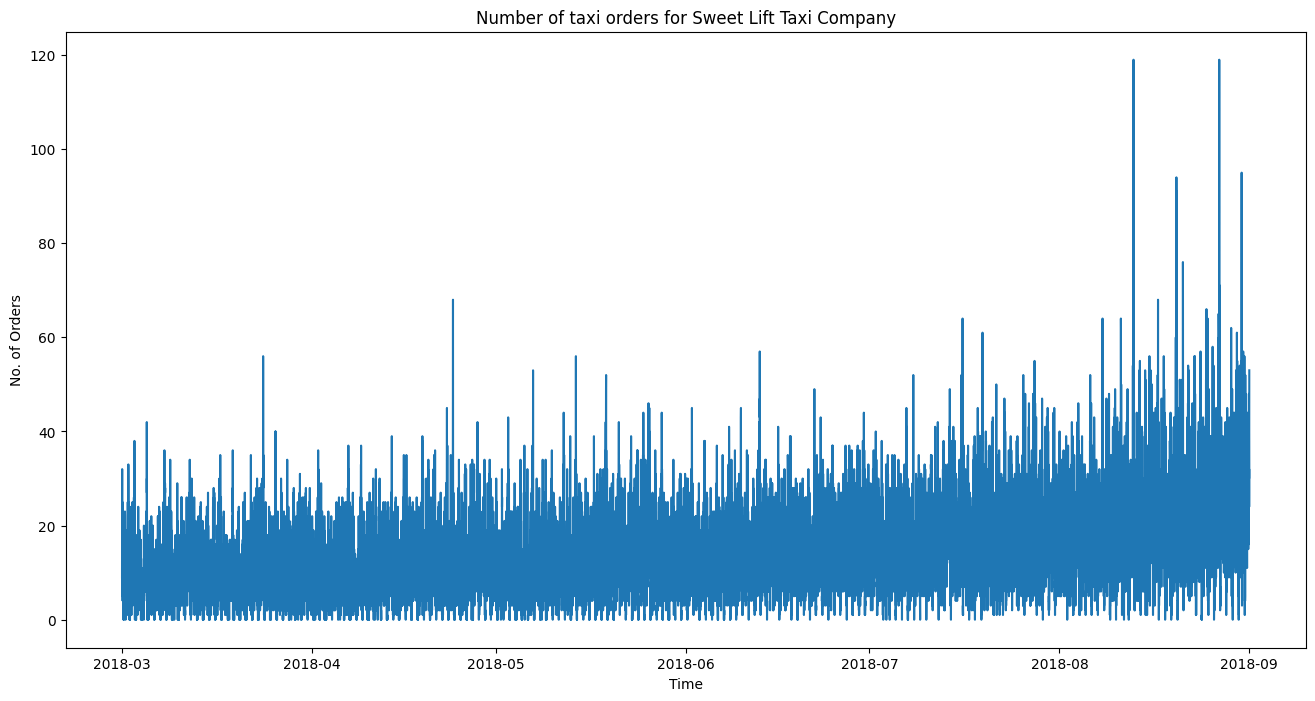

In [10]:
ts = df['num_orders']
plt.figure(figsize=(16,8))
plt.title('Number of taxi orders for Sweet Lift Taxi Company')
plt.xlabel('Time')
plt.ylabel('No. of Orders')
plt.plot(ts);

Este grafico muestra una serie temporal del numero de taxis solicitados por la compañia de taxis Swift lift taxi. El regitro inicia desde el dia 01 de Marzo del 2018 hasta el 31 de Agosto del 2018.
El grafico muestra una tendencia es los datos asi que podemos realizar un pronostico 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Buena gráfica! Muestra a un nivel muy granular como se encuentran los datos a lo largo del tiempo.
</div>

## Análisis

In [11]:
# Muestra los datos de una hora
ts = ts.resample('1H').sum()
ts

datetime
2018-03-01 00:00:00    124
2018-03-01 01:00:00     85
2018-03-01 02:00:00     71
2018-03-01 03:00:00     66
2018-03-01 04:00:00     43
                      ... 
2018-08-31 19:00:00    136
2018-08-31 20:00:00    154
2018-08-31 21:00:00    159
2018-08-31 22:00:00    223
2018-08-31 23:00:00    205
Freq: H, Name: num_orders, Length: 4416, dtype: int32

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Bien! Los datos se agruparon correctamente a nivel hora.
</div>

<AxesSubplot:title={'center':'Grafico de 2 semanas del 1 al 14 de marzo '}, xlabel='datetime'>

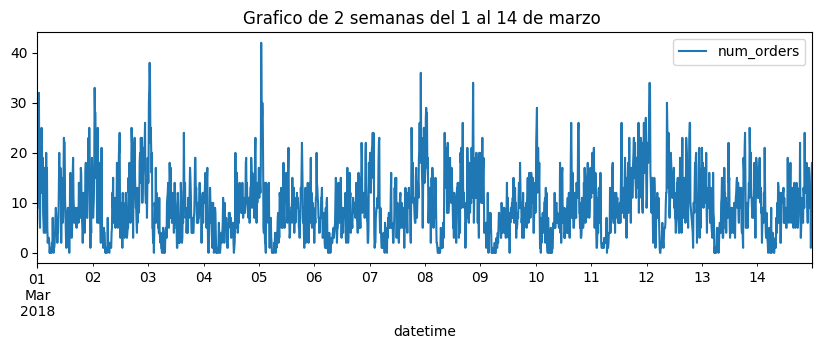

In [12]:

dataWeek = df['2018-03-01':'2018-03-14']
dataWeek.plot(figsize=(10,3),title='Grafico de 2 semanas del 1 al 14 de marzo ')

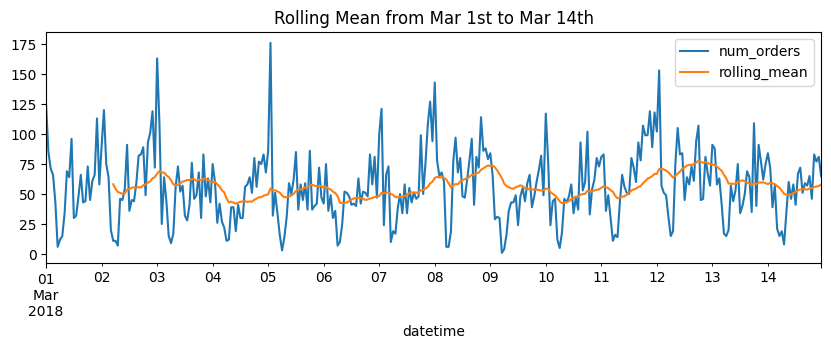

In [13]:
dataWeek = dataWeek.resample('1H').sum()
dataWeek['rolling_mean'] = dataWeek.rolling(30).mean() 
dataWeek.plot(figsize=(10,3),title='Rolling Mean from Mar 1st to Mar 14th');

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy buen gráfica! Se puede observar correctamente la media móvil que suaviza la serie de tiempo.
</div>

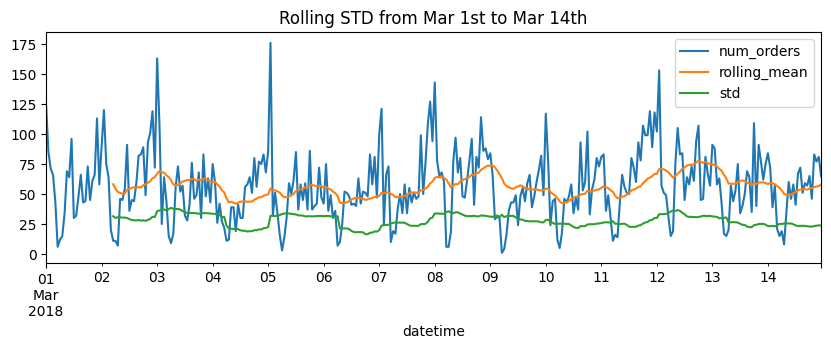

In [14]:
dataWeek['std'] = dataWeek['num_orders'].rolling(30).std() 
dataWeek.plot(figsize=(10,3),title='Rolling STD from Mar 1st to Mar 14th');

Text(0.5, 1.0, 'Trend')

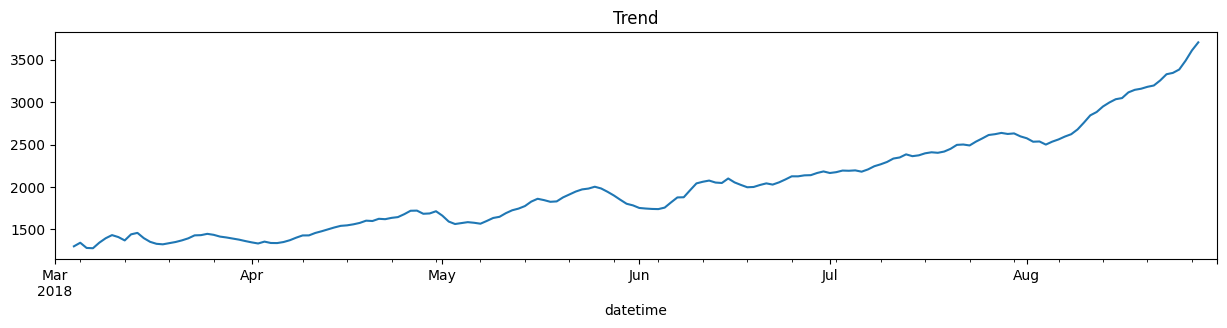

In [15]:
ts_ = ts.resample('1D').sum()

decomposed = seasonal_decompose(ts_)

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca(), figsize=(15, 10))
plt.title('Trend')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, se puede apreciar la tendencia.
</div>

En los datos de nuestra se puede ver una tenencia alcista 

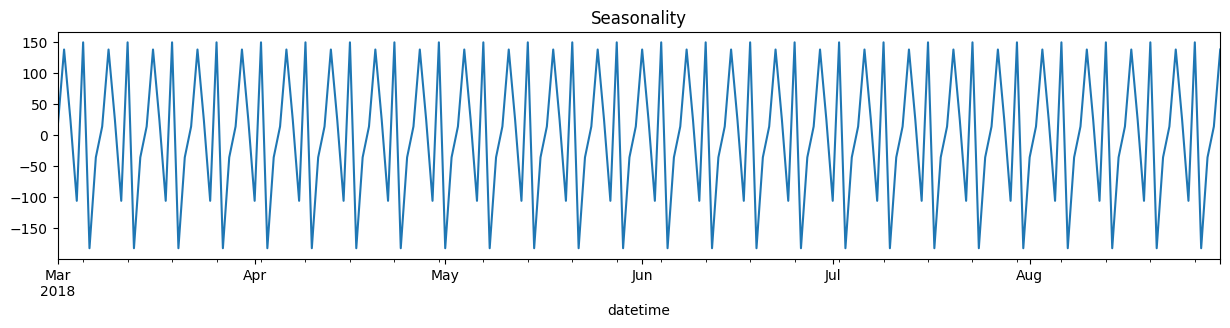

In [17]:
# Seasonality
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca(), figsize=(15, 10))
plt.title('Seasonality');

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. Se muestra correctamente la estacionalidad.
</div>

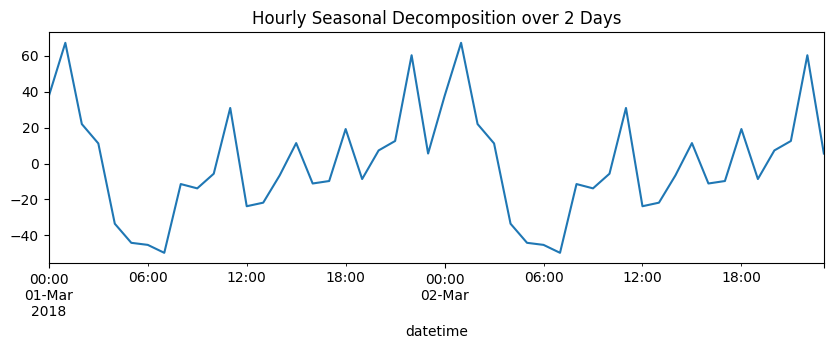

In [18]:

#dataWeek = df['2018-03-01':'2018-03-14']
tmp = dataWeek['2018-03-01':'2018-03-02']

decomposed_hour = seasonal_decompose(tmp['num_orders'].dropna())
decomposed_hour.seasonal.plot(figsize=(10,3), title='Hourly Seasonal Decomposition over 2 Days');

Los gráficos muestran variaciones regulares en una serie temporal dentro de un período específico. Estas variaciones siguen un patrón cíclico que tiende a repetirse en cada temporada. Después de la medianoche, los viajes en taxi disminuyen. A partir de las 6:00 a. m., comienza un incremento, alcanzando su máximo alrededor del mediodía, para luego descender nuevamente antes de la medianoche.

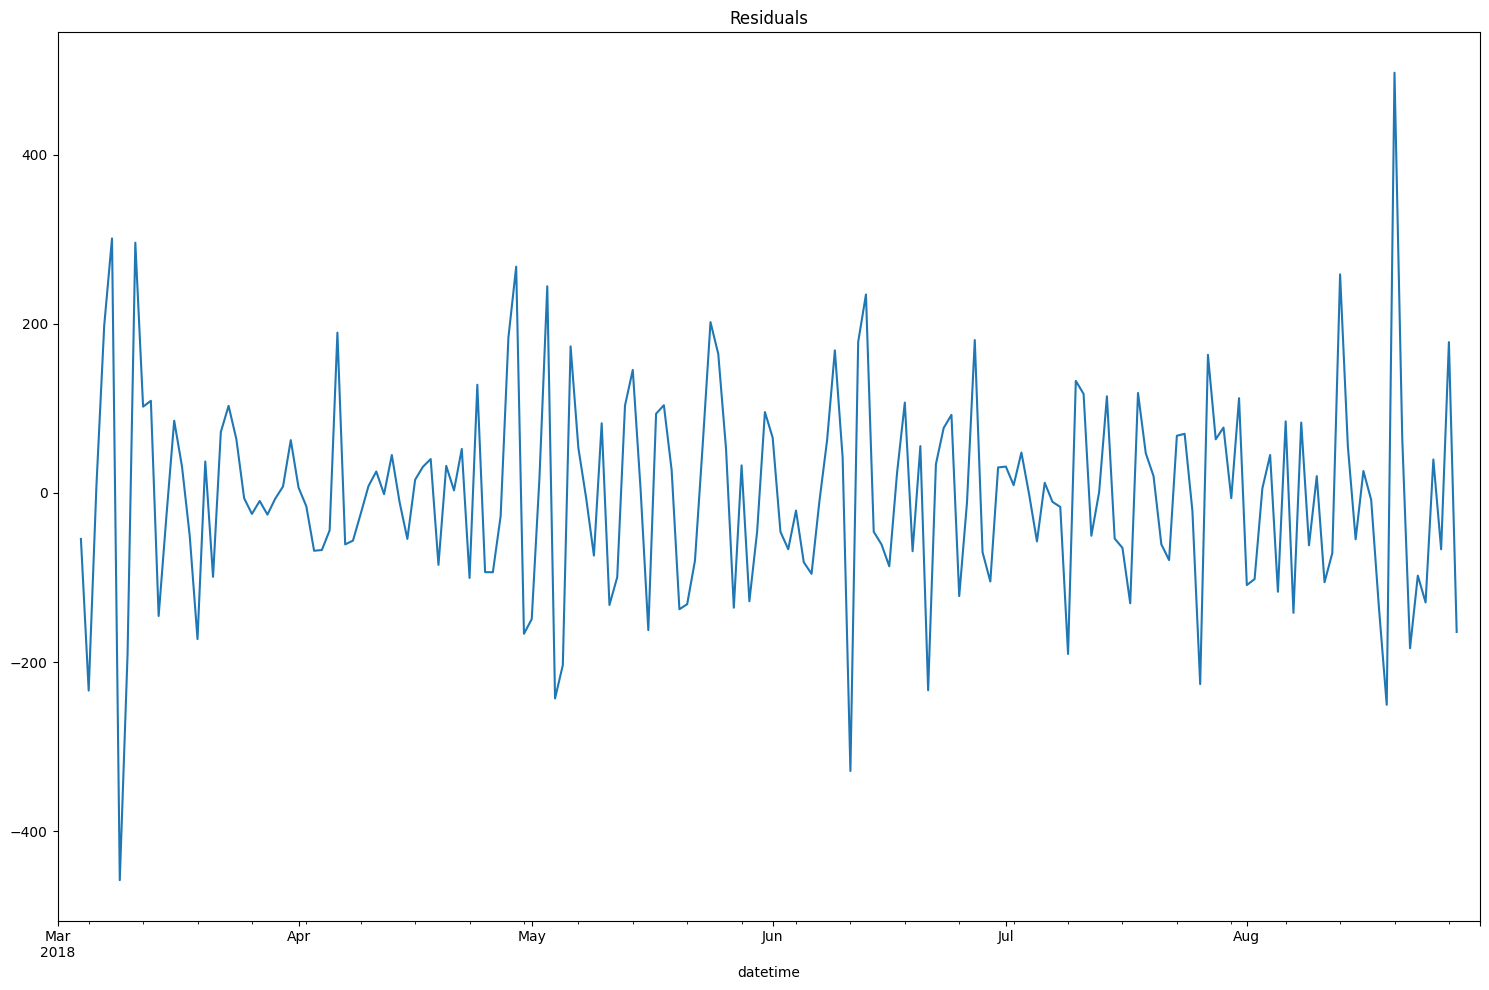

In [19]:
decomposed.resid.plot(ax=plt.gca(), figsize=(15, 10))
plt.title('Residuals')
plt.tight_layout()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

La serie de tiempo se descompuso correctamente, esta información será de utilidad.
</div>

## Formación

In [20]:
# function to make new features 
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
# make new features 
ts = pd.DataFrame(ts)
make_features(ts, 6, 7)
ts.head()

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena función para poder construir las características con las que trabajaras para poder realizar las predicciones.
</div>

In [21]:
# eliminar NaNs de los datos de series de tiempo
ts = ts.dropna()
print('The time series has', ts.shape[0], 'rows and', ts.shape[1], 'features')
print()
ts.head()

The time series has 4409 rows and 12 features



,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 07:00:00,15,3,1,3,7,12.0,6.0,43.0,66.0,71.0,85.0,58.142857
2018-03-01 08:00:00,34,3,1,3,8,15.0,12.0,6.0,43.0,66.0,71.0,42.571429
2018-03-01 09:00:00,69,3,1,3,9,34.0,15.0,12.0,6.0,43.0,66.0,35.285714
2018-03-01 10:00:00,64,3,1,3,10,69.0,34.0,15.0,12.0,6.0,43.0,35.000000
2018-03-01 11:00:00,96,3,1,3,11,64.0,69.0,34.0,15.0,12.0,6.0,34.714286


In [22]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train, test = train_test_split(ts, shuffle=False, test_size=0.1)
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())
print()

print('The train set has', train.shape[0], 'rows and', train.shape[1], 'features')
print('The test set has', test.shape[0], 'rows and', test.shape[1], 'features')

2018-03-01 07:00:00 2018-08-13 14:00:00
2018-08-13 15:00:00 2018-08-31 23:00:00

The train set has 3968 rows and 12 features
The test set has 441 rows and 12 features


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Se implementó correctamente la variable shuffle para que los datos se dividan correctamente en entrenamiento y prueba considerando que es una serie temporal.
</div>

In [23]:

# Declarar variables para el objetivo y las características
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [24]:
# division de series temporales
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Bien hecho!
</div>

In [25]:
%%time
model = LinearRegression()
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
predictions_train = model.predict(features_train)
print("MAE for the training set:", mean_absolute_error(predictions_train, target_train))
print("MAE for the test set: ", mean_absolute_error(predictions_test, target_test))
print('Model RMSE for the training set:', mean_squared_error(predictions_train, target_train,squared=False))
print('Model RMSE for the test set:', mean_squared_error(predictions_test, target_test,squared=False))

MAE for the training set: 23.41738357932807
MAE for the test set:  40.109134647348796
Model RMSE for the training set: 30.418258852998378
Model RMSE for the test set: 52.73988481092026
CPU times: user 8.2 ms, sys: 8.76 ms, total: 17 ms
Wall time: 7.03 ms


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Se entrenó correctamente el modelo de regresión lineal.
</div>

In [26]:
pipe_rfr = Pipeline([('scaler1', StandardScaler()),
                    ('RandomForestRegressor', RandomForestRegressor(n_estimators=100))])

pipe_linear = Pipeline([('scaler2', StandardScaler()),
                       ('LinearRegression(Dummy)', LinearRegression())])

pipe_cat_boost_r = Pipeline([('scaler3', StandardScaler()),
                       ('CatBoostRegressor', CatBoostRegressor(verbose=500))])

pipe_lgbm_r =  Pipeline([('scaler4', StandardScaler()),
                       ('LGBMRegressor', LGBMRegressor())])

pipe_xgb_r = Pipeline([('scaler5', StandardScaler()),
                       ('XGBRegressor', XGBRegressor())])
pipe_neighbors = Pipeline([('scaler6',StandardScaler()),('KNeighborsRegressor',KNeighborsRegressor())])

In [27]:

#Creando lista de pipelines.
pipelines = [pipe_rfr, pipe_linear, pipe_cat_boost_r, pipe_lgbm_r, pipe_xgb_r,pipe_neighbors]
#Creating a dictionary of pipelines.
pipe_dict = {pipe_rfr:'RandomForestRegressor', pipe_linear:'LinearRegression',\
             pipe_cat_boost_r: 'CatBoostRegressor', pipe_lgbm_r: 'LGBMRegressor', pipe_xgb_r:'XGBRegressor',pipe_neighbors:'KNeighborsRegressor'}

In [28]:
%%time
for pipe in pipelines:
    print(pipe_dict[pipe])
    print(cross_val_score(pipe, features_train, target_train, scoring='neg_root_mean_squared_error', cv=tscv))
    print()

RandomForestRegressor
[-23.52238461 -23.44911116 -23.49877981 -25.08266826 -31.11866159]

LinearRegression
[-27.40704795 -28.98671583 -30.35214718 -31.91257396 -39.27776214]

CatBoostRegressor
Learning rate set to 0.038369
0:	learn: 29.0042523	total: 47.6ms	remaining: 47.6s
500:	learn: 8.5941305	total: 457ms	remaining: 455ms
999:	learn: 4.6796891	total: 879ms	remaining: 0us
Learning rate set to 0.042799
0:	learn: 29.8091410	total: 1.79ms	remaining: 1.78s
500:	learn: 10.9417646	total: 493ms	remaining: 491ms
999:	learn: 6.9671363	total: 982ms	remaining: 0us
Learning rate set to 0.045627
0:	learn: 31.3020540	total: 2.11ms	remaining: 2.11s
500:	learn: 12.6772237	total: 587ms	remaining: 584ms
999:	learn: 8.8787957	total: 1.15s	remaining: 0us
Learning rate set to 0.047747
0:	learn: 32.6166261	total: 2.01ms	remaining: 2.01s
500:	learn: 13.9063436	total: 619ms	remaining: 617ms
999:	learn: 10.3580295	total: 1.25s	remaining: 0us
Learning rate set to 0.04946
0:	learn: 33.9384215	total: 1.87ms	rem

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Los modelos se entrenaron correctamente usando el diccionario y la función Pipeline.
</div>

<h3>Random Forest</h3>

In [29]:
%%time
# Creación de un modelo basado en árbol con los mejores hiperparámetros.
rfr_param = {'n_estimators': (10, 25, 50, 100),
              'max_depth': (None, 2, 4, 8, 10, 12),
              } 


RF_grid = GridSearchCV(RandomForestRegressor(random_state=0, criterion='mse'), param_grid=rfr_param, 
                       cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1)
RF_grid_model = RF_grid.fit(features_train, target_train)
print(RF_grid_model.best_estimator_)
print()
print(RF_grid_model.best_score_)

RandomForestRegressor(random_state=0)

-25.363679873929755
CPU times: user 30.6 s, sys: 31.3 ms, total: 30.6 s
Wall time: 30.6 s


In [30]:
print('The best hyperparameters are: {}'.format(RF_grid_model.best_params_))

The best hyperparameters are: {'max_depth': None, 'n_estimators': 100}


<h3>XGBRegressor</h3>

In [31]:
%%time

warnings.simplefilter(action='ignore', category=FutureWarning)

xgb_param = {'learning_rate': (0.001, 0.01, 0.1, 0.3),
              'n_estimators': (10, 25, 50, 100),
              'base_score': (0.25, 0.5, 0.75)
              } 

XGB_grid = GridSearchCV(XGBRegressor(), param_grid=xgb_param, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=-1) 
XGB_grid_model = XGB_grid.fit(features_train, target_train)
print(XGB_grid_model.best_estimator_)
print()
print(XGB_grid_model.best_score_)

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

-26.153996256285915
CPU times: user 1min 55s, sys: 327 ms, total: 1min 55s
Wall time: 1min 55s


In [32]:
print('The best hyperparameters are: {}'.format(XGB_grid_model.best_params_))

The best hyperparameters are: {'base_score': 0.75, 'learning_rate': 0.1, 'n_estimators': 100}


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Obtuviste correctamente el mejor modelo de Random Forest.
</div>

<h3>LGBMRegressor</h3>

In [33]:
%%time


lgbm_param = {'learning_rate': (0.001, 0.01, 0.05, 0.1),
              'n_estimators': (50, 100,200,500),
             'num_leaves': [5, 10, 20, 31]
             } 

# Creating a grid model.
LGBM_grid = GridSearchCV(LGBMRegressor(), param_grid=lgbm_param, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=1) 
LGBM_grid_model = LGBM_grid.fit(features_train, target_train)
print(LGBM_grid_model.best_estimator_)
print()
print(LGBM_grid_model.best_score_)

LGBMRegressor(learning_rate=0.01, n_estimators=500)

-25.177512749687505
CPU times: user 1min 36s, sys: 2.34 s, total: 1min 38s
Wall time: 1min 38s


In [34]:
print('The best hyperparameters are: {}'.format(LGBM_grid_model.best_params_))

The best hyperparameters are: {'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 31}


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena exploración de hiperparámetros para LGBM. Este modelo es usualmente el más rápido.
</div>

<h3>CatBoostRegressor</h3>

In [35]:
%%time

cat_param = {'learning_rate': [0.001, 0.01, 0.5],
        'depth': [4, 6, 10]
             
       }

cat_grid = GridSearchCV(CatBoostRegressor(), param_grid=cat_param, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=1) 
cat_grid_model = cat_grid.fit(features_train, target_train)
print(cat_grid_model.best_estimator_)
print()
print(cat_grid_model.best_score_)

0:	learn: 29.5136997	total: 661us	remaining: 661ms
1:	learn: 29.5014637	total: 1.43ms	remaining: 716ms
2:	learn: 29.4874462	total: 1.97ms	remaining: 656ms
3:	learn: 29.4753584	total: 2.5ms	remaining: 623ms
4:	learn: 29.4636813	total: 3.06ms	remaining: 608ms
5:	learn: 29.4495744	total: 3.58ms	remaining: 593ms
6:	learn: 29.4344856	total: 4.1ms	remaining: 582ms
7:	learn: 29.4205371	total: 4.63ms	remaining: 574ms
8:	learn: 29.4074542	total: 5.17ms	remaining: 569ms
9:	learn: 29.3933881	total: 5.68ms	remaining: 562ms
10:	learn: 29.3860660	total: 6.22ms	remaining: 560ms
11:	learn: 29.3728937	total: 6.76ms	remaining: 557ms
12:	learn: 29.3635818	total: 7.27ms	remaining: 552ms
13:	learn: 29.3498536	total: 7.79ms	remaining: 549ms
14:	learn: 29.3428416	total: 8.3ms	remaining: 545ms
15:	learn: 29.3295428	total: 8.82ms	remaining: 542ms
16:	learn: 29.3169095	total: 9.34ms	remaining: 540ms
17:	learn: 29.3045945	total: 9.86ms	remaining: 538ms
18:	learn: 29.2905229	total: 10.4ms	remaining: 536ms
19:	lea

482:	learn: 24.7638054	total: 188ms	remaining: 202ms
483:	learn: 24.7571066	total: 189ms	remaining: 201ms
484:	learn: 24.7488652	total: 189ms	remaining: 201ms
485:	learn: 24.7396816	total: 190ms	remaining: 201ms
486:	learn: 24.7306214	total: 190ms	remaining: 200ms
487:	learn: 24.7258916	total: 190ms	remaining: 200ms
488:	learn: 24.7199162	total: 191ms	remaining: 199ms
489:	learn: 24.7108914	total: 191ms	remaining: 199ms
490:	learn: 24.7053739	total: 192ms	remaining: 199ms
491:	learn: 24.6958335	total: 192ms	remaining: 198ms
492:	learn: 24.6908784	total: 192ms	remaining: 198ms
493:	learn: 24.6839048	total: 193ms	remaining: 197ms
494:	learn: 24.6780181	total: 193ms	remaining: 197ms
495:	learn: 24.6696281	total: 193ms	remaining: 196ms
496:	learn: 24.6614800	total: 194ms	remaining: 196ms
497:	learn: 24.6537866	total: 194ms	remaining: 196ms
498:	learn: 24.6441647	total: 194ms	remaining: 195ms
499:	learn: 24.6373747	total: 195ms	remaining: 195ms
500:	learn: 24.6280199	total: 195ms	remaining:

968:	learn: 21.9912175	total: 377ms	remaining: 12.1ms
969:	learn: 21.9866777	total: 377ms	remaining: 11.7ms
970:	learn: 21.9821165	total: 378ms	remaining: 11.3ms
971:	learn: 21.9772615	total: 378ms	remaining: 10.9ms
972:	learn: 21.9715536	total: 378ms	remaining: 10.5ms
973:	learn: 21.9688438	total: 379ms	remaining: 10.1ms
974:	learn: 21.9637956	total: 379ms	remaining: 9.72ms
975:	learn: 21.9603524	total: 379ms	remaining: 9.33ms
976:	learn: 21.9565766	total: 380ms	remaining: 8.94ms
977:	learn: 21.9542779	total: 380ms	remaining: 8.55ms
978:	learn: 21.9488079	total: 381ms	remaining: 8.16ms
979:	learn: 21.9441713	total: 381ms	remaining: 7.77ms
980:	learn: 21.9390230	total: 381ms	remaining: 7.38ms
981:	learn: 21.9355640	total: 382ms	remaining: 7ms
982:	learn: 21.9312402	total: 382ms	remaining: 6.61ms
983:	learn: 21.9278842	total: 382ms	remaining: 6.22ms
984:	learn: 21.9226927	total: 383ms	remaining: 5.83ms
985:	learn: 21.9193523	total: 383ms	remaining: 5.44ms
986:	learn: 21.9144551	total: 3

176:	learn: 28.5129093	total: 86ms	remaining: 400ms
177:	learn: 28.5028796	total: 86.6ms	remaining: 400ms
178:	learn: 28.4936687	total: 87.1ms	remaining: 399ms
179:	learn: 28.4828072	total: 87.6ms	remaining: 399ms
180:	learn: 28.4742784	total: 88.1ms	remaining: 398ms
181:	learn: 28.4663526	total: 88.5ms	remaining: 398ms
182:	learn: 28.4563565	total: 89ms	remaining: 397ms
183:	learn: 28.4469855	total: 89.5ms	remaining: 397ms
184:	learn: 28.4375404	total: 89.9ms	remaining: 396ms
185:	learn: 28.4286665	total: 90.4ms	remaining: 395ms
186:	learn: 28.4190503	total: 90.8ms	remaining: 395ms
187:	learn: 28.4114182	total: 91.2ms	remaining: 394ms
188:	learn: 28.4012052	total: 91.7ms	remaining: 393ms
189:	learn: 28.3927690	total: 92.2ms	remaining: 393ms
190:	learn: 28.3853125	total: 92.6ms	remaining: 392ms
191:	learn: 28.3764708	total: 93.1ms	remaining: 392ms
192:	learn: 28.3671110	total: 93.5ms	remaining: 391ms
193:	learn: 28.3583521	total: 94ms	remaining: 390ms
194:	learn: 28.3513472	total: 94.4

530:	learn: 25.8513603	total: 275ms	remaining: 243ms
531:	learn: 25.8442352	total: 275ms	remaining: 242ms
532:	learn: 25.8382486	total: 276ms	remaining: 242ms
533:	learn: 25.8326673	total: 277ms	remaining: 241ms
534:	learn: 25.8254873	total: 277ms	remaining: 241ms
535:	learn: 25.8188573	total: 277ms	remaining: 240ms
536:	learn: 25.8117055	total: 278ms	remaining: 240ms
537:	learn: 25.8057265	total: 278ms	remaining: 239ms
538:	learn: 25.7986663	total: 279ms	remaining: 238ms
539:	learn: 25.7937711	total: 279ms	remaining: 238ms
540:	learn: 25.7871705	total: 280ms	remaining: 237ms
541:	learn: 25.7816649	total: 280ms	remaining: 237ms
542:	learn: 25.7772015	total: 281ms	remaining: 236ms
543:	learn: 25.7712153	total: 281ms	remaining: 236ms
544:	learn: 25.7653280	total: 282ms	remaining: 235ms
545:	learn: 25.7598499	total: 282ms	remaining: 235ms
546:	learn: 25.7532423	total: 283ms	remaining: 234ms
547:	learn: 25.7481402	total: 283ms	remaining: 233ms
548:	learn: 25.7403499	total: 284ms	remaining:

945:	learn: 23.8390682	total: 465ms	remaining: 26.5ms
946:	learn: 23.8343703	total: 465ms	remaining: 26ms
947:	learn: 23.8307464	total: 466ms	remaining: 25.6ms
948:	learn: 23.8261854	total: 466ms	remaining: 25.1ms
949:	learn: 23.8225244	total: 467ms	remaining: 24.6ms
950:	learn: 23.8172377	total: 467ms	remaining: 24.1ms
951:	learn: 23.8132914	total: 468ms	remaining: 23.6ms
952:	learn: 23.8100152	total: 468ms	remaining: 23.1ms
953:	learn: 23.8054190	total: 469ms	remaining: 22.6ms
954:	learn: 23.8009645	total: 469ms	remaining: 22.1ms
955:	learn: 23.7981267	total: 470ms	remaining: 21.6ms
956:	learn: 23.7931472	total: 470ms	remaining: 21.1ms
957:	learn: 23.7886324	total: 470ms	remaining: 20.6ms
958:	learn: 23.7841893	total: 471ms	remaining: 20.1ms
959:	learn: 23.7805232	total: 471ms	remaining: 19.6ms
960:	learn: 23.7766663	total: 472ms	remaining: 19.1ms
961:	learn: 23.7725144	total: 472ms	remaining: 18.7ms
962:	learn: 23.7681377	total: 473ms	remaining: 18.2ms
963:	learn: 23.7635657	total: 

126:	learn: 30.4968641	total: 70.6ms	remaining: 486ms
127:	learn: 30.4870581	total: 71.4ms	remaining: 486ms
128:	learn: 30.4762857	total: 71.9ms	remaining: 486ms
129:	learn: 30.4645514	total: 72.5ms	remaining: 485ms
130:	learn: 30.4534983	total: 73.1ms	remaining: 485ms
131:	learn: 30.4439451	total: 73.6ms	remaining: 484ms
132:	learn: 30.4359304	total: 74.1ms	remaining: 483ms
133:	learn: 30.4278421	total: 74.8ms	remaining: 483ms
134:	learn: 30.4165349	total: 75.3ms	remaining: 483ms
135:	learn: 30.4046688	total: 75.9ms	remaining: 482ms
136:	learn: 30.3951999	total: 76.4ms	remaining: 481ms
137:	learn: 30.3853375	total: 77ms	remaining: 481ms
138:	learn: 30.3748344	total: 77.6ms	remaining: 481ms
139:	learn: 30.3664311	total: 78.2ms	remaining: 480ms
140:	learn: 30.3563501	total: 78.7ms	remaining: 479ms
141:	learn: 30.3454515	total: 79.3ms	remaining: 479ms
142:	learn: 30.3376679	total: 79.8ms	remaining: 478ms
143:	learn: 30.3269545	total: 80.3ms	remaining: 478ms
144:	learn: 30.3150426	total: 

478:	learn: 27.6167966	total: 263ms	remaining: 286ms
479:	learn: 27.6086303	total: 263ms	remaining: 285ms
480:	learn: 27.6009872	total: 264ms	remaining: 285ms
481:	learn: 27.5932567	total: 265ms	remaining: 284ms
482:	learn: 27.5867611	total: 265ms	remaining: 284ms
483:	learn: 27.5814842	total: 266ms	remaining: 283ms
484:	learn: 27.5744599	total: 266ms	remaining: 283ms
485:	learn: 27.5701863	total: 267ms	remaining: 282ms
486:	learn: 27.5624620	total: 267ms	remaining: 282ms
487:	learn: 27.5569117	total: 268ms	remaining: 281ms
488:	learn: 27.5521188	total: 268ms	remaining: 280ms
489:	learn: 27.5446448	total: 269ms	remaining: 280ms
490:	learn: 27.5384144	total: 269ms	remaining: 279ms
491:	learn: 27.5312421	total: 270ms	remaining: 279ms
492:	learn: 27.5258860	total: 270ms	remaining: 278ms
493:	learn: 27.5206780	total: 271ms	remaining: 278ms
494:	learn: 27.5130171	total: 272ms	remaining: 277ms
495:	learn: 27.5057418	total: 272ms	remaining: 276ms
496:	learn: 27.4996391	total: 273ms	remaining:

829:	learn: 25.7101364	total: 455ms	remaining: 93.1ms
830:	learn: 25.7060338	total: 456ms	remaining: 92.7ms
831:	learn: 25.7019224	total: 456ms	remaining: 92.2ms
832:	learn: 25.6988949	total: 457ms	remaining: 91.6ms
833:	learn: 25.6949370	total: 457ms	remaining: 91.1ms
834:	learn: 25.6908119	total: 458ms	remaining: 90.5ms
835:	learn: 25.6852277	total: 459ms	remaining: 90ms
836:	learn: 25.6805927	total: 459ms	remaining: 89.5ms
837:	learn: 25.6776539	total: 460ms	remaining: 88.9ms
838:	learn: 25.6725155	total: 460ms	remaining: 88.3ms
839:	learn: 25.6684376	total: 461ms	remaining: 87.8ms
840:	learn: 25.6638538	total: 462ms	remaining: 87.3ms
841:	learn: 25.6597978	total: 462ms	remaining: 86.7ms
842:	learn: 25.6537739	total: 463ms	remaining: 86.2ms
843:	learn: 25.6494699	total: 463ms	remaining: 85.6ms
844:	learn: 25.6439602	total: 464ms	remaining: 85.1ms
845:	learn: 25.6389908	total: 464ms	remaining: 84.5ms
846:	learn: 25.6337137	total: 465ms	remaining: 84ms
847:	learn: 25.6290801	total: 46

8:	learn: 33.2409032	total: 6.46ms	remaining: 712ms
9:	learn: 33.2274935	total: 7.46ms	remaining: 739ms
10:	learn: 33.2175189	total: 8.36ms	remaining: 751ms
11:	learn: 33.2074954	total: 9.06ms	remaining: 746ms
12:	learn: 33.1943329	total: 9.93ms	remaining: 754ms
13:	learn: 33.1836992	total: 10.8ms	remaining: 757ms
14:	learn: 33.1708024	total: 11.5ms	remaining: 754ms
15:	learn: 33.1575311	total: 12.4ms	remaining: 763ms
16:	learn: 33.1479129	total: 13.3ms	remaining: 771ms
17:	learn: 33.1336667	total: 14ms	remaining: 764ms
18:	learn: 33.1202697	total: 14.7ms	remaining: 756ms
19:	learn: 33.1061382	total: 15.3ms	remaining: 749ms
20:	learn: 33.0958835	total: 15.9ms	remaining: 741ms
21:	learn: 33.0821877	total: 16.5ms	remaining: 734ms
22:	learn: 33.0687766	total: 17.2ms	remaining: 729ms
23:	learn: 33.0548467	total: 17.8ms	remaining: 723ms
24:	learn: 33.0430391	total: 18.4ms	remaining: 717ms
25:	learn: 33.0320222	total: 19ms	remaining: 712ms
26:	learn: 33.0191015	total: 19.6ms	remaining: 707ms

305:	learn: 30.1110966	total: 199ms	remaining: 452ms
306:	learn: 30.1040418	total: 200ms	remaining: 452ms
307:	learn: 30.0948838	total: 201ms	remaining: 452ms
308:	learn: 30.0875680	total: 202ms	remaining: 451ms
309:	learn: 30.0779766	total: 202ms	remaining: 451ms
310:	learn: 30.0693801	total: 203ms	remaining: 450ms
311:	learn: 30.0622813	total: 204ms	remaining: 449ms
312:	learn: 30.0533112	total: 204ms	remaining: 449ms
313:	learn: 30.0458370	total: 205ms	remaining: 448ms
314:	learn: 30.0374701	total: 206ms	remaining: 447ms
315:	learn: 30.0285528	total: 206ms	remaining: 446ms
316:	learn: 30.0189085	total: 207ms	remaining: 446ms
317:	learn: 30.0130073	total: 207ms	remaining: 445ms
318:	learn: 30.0035263	total: 208ms	remaining: 444ms
319:	learn: 29.9940138	total: 213ms	remaining: 452ms
320:	learn: 29.9860473	total: 214ms	remaining: 452ms
321:	learn: 29.9773248	total: 214ms	remaining: 451ms
322:	learn: 29.9680906	total: 215ms	remaining: 450ms
323:	learn: 29.9611282	total: 215ms	remaining:

598:	learn: 27.9759211	total: 393ms	remaining: 263ms
599:	learn: 27.9702473	total: 394ms	remaining: 262ms
600:	learn: 27.9636666	total: 394ms	remaining: 262ms
601:	learn: 27.9574139	total: 395ms	remaining: 261ms
602:	learn: 27.9529878	total: 396ms	remaining: 260ms
603:	learn: 27.9474952	total: 396ms	remaining: 260ms
604:	learn: 27.9422942	total: 397ms	remaining: 259ms
605:	learn: 27.9376362	total: 397ms	remaining: 258ms
606:	learn: 27.9311608	total: 398ms	remaining: 258ms
607:	learn: 27.9254434	total: 399ms	remaining: 257ms
608:	learn: 27.9207013	total: 399ms	remaining: 256ms
609:	learn: 27.9137880	total: 404ms	remaining: 258ms
610:	learn: 27.9090457	total: 405ms	remaining: 258ms
611:	learn: 27.9022534	total: 405ms	remaining: 257ms
612:	learn: 27.8978090	total: 406ms	remaining: 256ms
613:	learn: 27.8911260	total: 407ms	remaining: 256ms
614:	learn: 27.8853556	total: 407ms	remaining: 255ms
615:	learn: 27.8802228	total: 408ms	remaining: 254ms
616:	learn: 27.8760868	total: 409ms	remaining:

897:	learn: 26.4766031	total: 585ms	remaining: 66.5ms
898:	learn: 26.4733607	total: 586ms	remaining: 65.8ms
899:	learn: 26.4696622	total: 587ms	remaining: 65.2ms
900:	learn: 26.4662571	total: 587ms	remaining: 64.5ms
901:	learn: 26.4624556	total: 588ms	remaining: 63.9ms
902:	learn: 26.4574658	total: 589ms	remaining: 63.2ms
903:	learn: 26.4516195	total: 589ms	remaining: 62.6ms
904:	learn: 26.4477095	total: 590ms	remaining: 61.9ms
905:	learn: 26.4432115	total: 591ms	remaining: 61.3ms
906:	learn: 26.4394408	total: 591ms	remaining: 60.6ms
907:	learn: 26.4345008	total: 592ms	remaining: 60ms
908:	learn: 26.4288984	total: 592ms	remaining: 59.3ms
909:	learn: 26.4252678	total: 593ms	remaining: 58.7ms
910:	learn: 26.4223119	total: 594ms	remaining: 58ms
911:	learn: 26.4192428	total: 594ms	remaining: 57.3ms
912:	learn: 26.4145736	total: 595ms	remaining: 56.7ms
913:	learn: 26.4110050	total: 595ms	remaining: 56ms
914:	learn: 26.4068090	total: 596ms	remaining: 55.4ms
915:	learn: 26.4014067	total: 597m

300:	learn: 31.2847207	total: 221ms	remaining: 512ms
301:	learn: 31.2750408	total: 221ms	remaining: 512ms
302:	learn: 31.2641647	total: 222ms	remaining: 511ms
303:	learn: 31.2541211	total: 223ms	remaining: 511ms
304:	learn: 31.2447564	total: 224ms	remaining: 510ms
305:	learn: 31.2346154	total: 224ms	remaining: 509ms
306:	learn: 31.2263337	total: 229ms	remaining: 517ms
307:	learn: 31.2168024	total: 230ms	remaining: 517ms
308:	learn: 31.2086229	total: 231ms	remaining: 516ms
309:	learn: 31.2003987	total: 231ms	remaining: 515ms
310:	learn: 31.1904313	total: 232ms	remaining: 514ms
311:	learn: 31.1833674	total: 233ms	remaining: 513ms
312:	learn: 31.1727617	total: 233ms	remaining: 512ms
313:	learn: 31.1644465	total: 234ms	remaining: 511ms
314:	learn: 31.1549443	total: 235ms	remaining: 511ms
315:	learn: 31.1453007	total: 235ms	remaining: 510ms
316:	learn: 31.1354944	total: 236ms	remaining: 509ms
317:	learn: 31.1289804	total: 237ms	remaining: 508ms
318:	learn: 31.1187083	total: 238ms	remaining:

561:	learn: 29.1852612	total: 415ms	remaining: 323ms
562:	learn: 29.1786629	total: 416ms	remaining: 323ms
563:	learn: 29.1704658	total: 416ms	remaining: 322ms
564:	learn: 29.1623290	total: 417ms	remaining: 321ms
565:	learn: 29.1542391	total: 422ms	remaining: 323ms
566:	learn: 29.1464092	total: 422ms	remaining: 323ms
567:	learn: 29.1388504	total: 423ms	remaining: 322ms
568:	learn: 29.1316799	total: 424ms	remaining: 321ms
569:	learn: 29.1257693	total: 425ms	remaining: 320ms
570:	learn: 29.1186679	total: 425ms	remaining: 320ms
571:	learn: 29.1109229	total: 426ms	remaining: 319ms
572:	learn: 29.1048068	total: 427ms	remaining: 318ms
573:	learn: 29.0977757	total: 427ms	remaining: 317ms
574:	learn: 29.0899701	total: 428ms	remaining: 316ms
575:	learn: 29.0838245	total: 429ms	remaining: 316ms
576:	learn: 29.0773824	total: 430ms	remaining: 315ms
577:	learn: 29.0709806	total: 430ms	remaining: 314ms
578:	learn: 29.0632822	total: 431ms	remaining: 313ms
579:	learn: 29.0566528	total: 432ms	remaining:

820:	learn: 27.6456296	total: 608ms	remaining: 133ms
821:	learn: 27.6403804	total: 609ms	remaining: 132ms
822:	learn: 27.6341725	total: 615ms	remaining: 132ms
823:	learn: 27.6289069	total: 616ms	remaining: 132ms
824:	learn: 27.6236831	total: 617ms	remaining: 131ms
825:	learn: 27.6186705	total: 617ms	remaining: 130ms
826:	learn: 27.6147008	total: 618ms	remaining: 129ms
827:	learn: 27.6107508	total: 619ms	remaining: 129ms
828:	learn: 27.6064599	total: 619ms	remaining: 128ms
829:	learn: 27.6016091	total: 620ms	remaining: 127ms
830:	learn: 27.5961878	total: 621ms	remaining: 126ms
831:	learn: 27.5913585	total: 622ms	remaining: 126ms
832:	learn: 27.5846600	total: 622ms	remaining: 125ms
833:	learn: 27.5806467	total: 623ms	remaining: 124ms
834:	learn: 27.5773030	total: 624ms	remaining: 123ms
835:	learn: 27.5711040	total: 624ms	remaining: 123ms
836:	learn: 27.5650981	total: 625ms	remaining: 122ms
837:	learn: 27.5616558	total: 626ms	remaining: 121ms
838:	learn: 27.5556163	total: 627ms	remaining:

0:	learn: 29.3921851	total: 719us	remaining: 719ms
1:	learn: 29.2713086	total: 1.31ms	remaining: 654ms
2:	learn: 29.1342178	total: 1.73ms	remaining: 575ms
3:	learn: 29.0175585	total: 2.1ms	remaining: 522ms
4:	learn: 28.9062603	total: 2.46ms	remaining: 490ms
5:	learn: 28.7719801	total: 2.83ms	remaining: 469ms
6:	learn: 28.6296912	total: 3.23ms	remaining: 458ms
7:	learn: 28.5001123	total: 3.6ms	remaining: 446ms
8:	learn: 28.3801093	total: 3.96ms	remaining: 436ms
9:	learn: 28.2486879	total: 4.32ms	remaining: 427ms
10:	learn: 28.1128468	total: 4.67ms	remaining: 420ms
11:	learn: 27.9989182	total: 5.04ms	remaining: 415ms
12:	learn: 27.9170190	total: 5.39ms	remaining: 410ms
13:	learn: 27.7959786	total: 5.75ms	remaining: 405ms
14:	learn: 27.7133718	total: 6.1ms	remaining: 401ms
15:	learn: 27.6252337	total: 6.47ms	remaining: 398ms
16:	learn: 27.5043799	total: 6.83ms	remaining: 395ms
17:	learn: 27.4007934	total: 7.22ms	remaining: 394ms
18:	learn: 27.2834457	total: 7.59ms	remaining: 392ms
19:	lea

523:	learn: 16.6037325	total: 189ms	remaining: 172ms
524:	learn: 16.5989936	total: 190ms	remaining: 172ms
525:	learn: 16.5964676	total: 190ms	remaining: 171ms
526:	learn: 16.5908325	total: 191ms	remaining: 171ms
527:	learn: 16.5847684	total: 191ms	remaining: 171ms
528:	learn: 16.5817836	total: 191ms	remaining: 170ms
529:	learn: 16.5758940	total: 192ms	remaining: 170ms
530:	learn: 16.5699996	total: 192ms	remaining: 170ms
531:	learn: 16.5672871	total: 192ms	remaining: 169ms
532:	learn: 16.5611560	total: 193ms	remaining: 169ms
533:	learn: 16.5593052	total: 193ms	remaining: 169ms
534:	learn: 16.5565090	total: 193ms	remaining: 168ms
535:	learn: 16.5526550	total: 194ms	remaining: 168ms
536:	learn: 16.5497983	total: 194ms	remaining: 167ms
537:	learn: 16.5450205	total: 195ms	remaining: 167ms
538:	learn: 16.5410106	total: 195ms	remaining: 167ms
539:	learn: 16.5368077	total: 195ms	remaining: 166ms
540:	learn: 16.5337119	total: 196ms	remaining: 166ms
541:	learn: 16.5284598	total: 196ms	remaining:

0:	learn: 30.1972555	total: 759us	remaining: 759ms
1:	learn: 30.0737777	total: 1.57ms	remaining: 783ms
2:	learn: 29.9590349	total: 2.16ms	remaining: 717ms
3:	learn: 29.8441713	total: 2.85ms	remaining: 710ms
4:	learn: 29.7285483	total: 3.43ms	remaining: 682ms
5:	learn: 29.6216303	total: 4.03ms	remaining: 667ms
6:	learn: 29.5173041	total: 4.72ms	remaining: 669ms
7:	learn: 29.4367954	total: 5.29ms	remaining: 656ms
8:	learn: 29.3391895	total: 5.84ms	remaining: 644ms
9:	learn: 29.2218816	total: 6.53ms	remaining: 647ms
10:	learn: 29.1165022	total: 7.12ms	remaining: 641ms
11:	learn: 29.0127004	total: 7.68ms	remaining: 633ms
12:	learn: 28.9201261	total: 8.38ms	remaining: 636ms
13:	learn: 28.8289911	total: 8.98ms	remaining: 632ms
14:	learn: 28.7440155	total: 9.51ms	remaining: 625ms
15:	learn: 28.6549678	total: 10.2ms	remaining: 626ms
16:	learn: 28.5491509	total: 10.8ms	remaining: 626ms
17:	learn: 28.4549293	total: 11.4ms	remaining: 622ms
18:	learn: 28.3831550	total: 12.1ms	remaining: 622ms
19:	

402:	learn: 19.3153318	total: 191ms	remaining: 282ms
403:	learn: 19.3101348	total: 191ms	remaining: 282ms
404:	learn: 19.3074994	total: 192ms	remaining: 282ms
405:	learn: 19.3034308	total: 192ms	remaining: 281ms
406:	learn: 19.2920788	total: 193ms	remaining: 281ms
407:	learn: 19.2851149	total: 193ms	remaining: 280ms
408:	learn: 19.2821053	total: 194ms	remaining: 280ms
409:	learn: 19.2737316	total: 194ms	remaining: 279ms
410:	learn: 19.2702946	total: 194ms	remaining: 279ms
411:	learn: 19.2623055	total: 195ms	remaining: 278ms
412:	learn: 19.2530349	total: 195ms	remaining: 278ms
413:	learn: 19.2474835	total: 196ms	remaining: 277ms
414:	learn: 19.2425572	total: 196ms	remaining: 277ms
415:	learn: 19.2381790	total: 197ms	remaining: 276ms
416:	learn: 19.2302652	total: 197ms	remaining: 276ms
417:	learn: 19.2252043	total: 198ms	remaining: 275ms
418:	learn: 19.2175516	total: 198ms	remaining: 275ms
419:	learn: 19.2147057	total: 199ms	remaining: 274ms
420:	learn: 19.2082249	total: 199ms	remaining:

819:	learn: 17.5275651	total: 381ms	remaining: 83.7ms
820:	learn: 17.5250657	total: 382ms	remaining: 83.3ms
821:	learn: 17.5239512	total: 383ms	remaining: 82.9ms
822:	learn: 17.5215236	total: 383ms	remaining: 82.4ms
823:	learn: 17.5184443	total: 384ms	remaining: 81.9ms
824:	learn: 17.5147205	total: 384ms	remaining: 81.5ms
825:	learn: 17.5119748	total: 385ms	remaining: 81ms
826:	learn: 17.5107305	total: 385ms	remaining: 80.5ms
827:	learn: 17.5090461	total: 385ms	remaining: 80.1ms
828:	learn: 17.5053476	total: 386ms	remaining: 79.6ms
829:	learn: 17.5038229	total: 386ms	remaining: 79.1ms
830:	learn: 17.5002542	total: 387ms	remaining: 78.7ms
831:	learn: 17.4977845	total: 387ms	remaining: 78.2ms
832:	learn: 17.4942792	total: 388ms	remaining: 77.7ms
833:	learn: 17.4884125	total: 388ms	remaining: 77.3ms
834:	learn: 17.4848388	total: 389ms	remaining: 76.8ms
835:	learn: 17.4828122	total: 389ms	remaining: 76.3ms
836:	learn: 17.4808748	total: 390ms	remaining: 75.9ms
837:	learn: 17.4789874	total: 

17:	learn: 29.9884337	total: 11.1ms	remaining: 604ms
18:	learn: 29.8960206	total: 11.7ms	remaining: 603ms
19:	learn: 29.8114135	total: 12.2ms	remaining: 599ms
20:	learn: 29.7279594	total: 12.8ms	remaining: 597ms
21:	learn: 29.6258855	total: 13.3ms	remaining: 593ms
22:	learn: 29.5312288	total: 13.9ms	remaining: 591ms
23:	learn: 29.4531941	total: 14.5ms	remaining: 589ms
24:	learn: 29.3617242	total: 15ms	remaining: 587ms
25:	learn: 29.2658175	total: 15.6ms	remaining: 584ms
26:	learn: 29.1909933	total: 16.1ms	remaining: 581ms
27:	learn: 29.0990667	total: 16.7ms	remaining: 579ms
28:	learn: 29.0053253	total: 17.3ms	remaining: 578ms
29:	learn: 28.9127644	total: 17.8ms	remaining: 576ms
30:	learn: 28.8368301	total: 18.4ms	remaining: 575ms
31:	learn: 28.7382510	total: 18.9ms	remaining: 573ms
32:	learn: 28.6416524	total: 19.5ms	remaining: 571ms
33:	learn: 28.5642433	total: 20ms	remaining: 569ms
34:	learn: 28.4754205	total: 20.6ms	remaining: 567ms
35:	learn: 28.4132856	total: 21.1ms	remaining: 566

360:	learn: 20.9402840	total: 203ms	remaining: 359ms
361:	learn: 20.9297440	total: 203ms	remaining: 359ms
362:	learn: 20.9241479	total: 204ms	remaining: 358ms
363:	learn: 20.9191432	total: 205ms	remaining: 358ms
364:	learn: 20.9115711	total: 205ms	remaining: 357ms
365:	learn: 20.9033423	total: 206ms	remaining: 356ms
366:	learn: 20.8986006	total: 206ms	remaining: 356ms
367:	learn: 20.8936542	total: 207ms	remaining: 355ms
368:	learn: 20.8851152	total: 207ms	remaining: 354ms
369:	learn: 20.8725481	total: 208ms	remaining: 354ms
370:	learn: 20.8688706	total: 208ms	remaining: 353ms
371:	learn: 20.8656285	total: 209ms	remaining: 353ms
372:	learn: 20.8617161	total: 209ms	remaining: 352ms
373:	learn: 20.8539648	total: 210ms	remaining: 351ms
374:	learn: 20.8463552	total: 210ms	remaining: 351ms
375:	learn: 20.8424018	total: 211ms	remaining: 350ms
376:	learn: 20.8398399	total: 211ms	remaining: 349ms
377:	learn: 20.8313753	total: 212ms	remaining: 349ms
378:	learn: 20.8227114	total: 213ms	remaining:

721:	learn: 19.2755472	total: 395ms	remaining: 152ms
722:	learn: 19.2727539	total: 396ms	remaining: 152ms
723:	learn: 19.2655990	total: 397ms	remaining: 151ms
724:	learn: 19.2544183	total: 397ms	remaining: 151ms
725:	learn: 19.2531746	total: 398ms	remaining: 150ms
726:	learn: 19.2516104	total: 399ms	remaining: 150ms
727:	learn: 19.2486137	total: 400ms	remaining: 149ms
728:	learn: 19.2431086	total: 401ms	remaining: 149ms
729:	learn: 19.2401351	total: 401ms	remaining: 148ms
730:	learn: 19.2356560	total: 402ms	remaining: 148ms
731:	learn: 19.2338464	total: 403ms	remaining: 147ms
732:	learn: 19.2312478	total: 403ms	remaining: 147ms
733:	learn: 19.2262057	total: 404ms	remaining: 146ms
734:	learn: 19.2237493	total: 405ms	remaining: 146ms
735:	learn: 19.2212808	total: 405ms	remaining: 145ms
736:	learn: 19.2160823	total: 406ms	remaining: 145ms
737:	learn: 19.2100692	total: 407ms	remaining: 144ms
738:	learn: 19.2086801	total: 408ms	remaining: 144ms
739:	learn: 19.2057383	total: 408ms	remaining:

0:	learn: 33.2156843	total: 829us	remaining: 829ms
1:	learn: 33.0881842	total: 1.67ms	remaining: 835ms
2:	learn: 32.9895256	total: 2.31ms	remaining: 767ms
3:	learn: 32.8914186	total: 2.94ms	remaining: 732ms
4:	learn: 32.7850442	total: 3.6ms	remaining: 716ms
5:	learn: 32.6770115	total: 4.27ms	remaining: 708ms
6:	learn: 32.5738839	total: 4.91ms	remaining: 697ms
7:	learn: 32.4602991	total: 5.53ms	remaining: 685ms
8:	learn: 32.3659473	total: 6.14ms	remaining: 676ms
9:	learn: 32.2523012	total: 6.77ms	remaining: 670ms
10:	learn: 32.1632207	total: 7.43ms	remaining: 668ms
11:	learn: 32.0455262	total: 8.06ms	remaining: 664ms
12:	learn: 31.9280277	total: 8.69ms	remaining: 660ms
13:	learn: 31.8112692	total: 9.3ms	remaining: 655ms
14:	learn: 31.6993034	total: 9.92ms	remaining: 652ms
15:	learn: 31.5848940	total: 10.6ms	remaining: 650ms
16:	learn: 31.5040315	total: 11.2ms	remaining: 648ms
17:	learn: 31.3914009	total: 11.8ms	remaining: 645ms
18:	learn: 31.2797258	total: 12.4ms	remaining: 643ms
19:	le

304:	learn: 22.2784300	total: 193ms	remaining: 440ms
305:	learn: 22.2696063	total: 194ms	remaining: 440ms
306:	learn: 22.2632607	total: 195ms	remaining: 439ms
307:	learn: 22.2564777	total: 195ms	remaining: 439ms
308:	learn: 22.2501730	total: 196ms	remaining: 438ms
309:	learn: 22.2447579	total: 197ms	remaining: 438ms
310:	learn: 22.2394779	total: 197ms	remaining: 437ms
311:	learn: 22.2353675	total: 198ms	remaining: 436ms
312:	learn: 22.2307046	total: 198ms	remaining: 436ms
313:	learn: 22.2238747	total: 199ms	remaining: 435ms
314:	learn: 22.2153915	total: 200ms	remaining: 434ms
315:	learn: 22.2087414	total: 200ms	remaining: 434ms
316:	learn: 22.2017613	total: 201ms	remaining: 433ms
317:	learn: 22.1935680	total: 202ms	remaining: 432ms
318:	learn: 22.1803913	total: 202ms	remaining: 432ms
319:	learn: 22.1778936	total: 203ms	remaining: 431ms
320:	learn: 22.1682466	total: 203ms	remaining: 430ms
321:	learn: 22.1632993	total: 204ms	remaining: 430ms
322:	learn: 22.1596222	total: 205ms	remaining:

615:	learn: 20.6077133	total: 387ms	remaining: 241ms
616:	learn: 20.6060792	total: 388ms	remaining: 241ms
617:	learn: 20.6031438	total: 388ms	remaining: 240ms
618:	learn: 20.5973873	total: 389ms	remaining: 239ms
619:	learn: 20.5949860	total: 390ms	remaining: 239ms
620:	learn: 20.5923100	total: 390ms	remaining: 238ms
621:	learn: 20.5886670	total: 391ms	remaining: 238ms
622:	learn: 20.5843020	total: 392ms	remaining: 237ms
623:	learn: 20.5821503	total: 392ms	remaining: 236ms
624:	learn: 20.5788737	total: 393ms	remaining: 236ms
625:	learn: 20.5698792	total: 393ms	remaining: 235ms
626:	learn: 20.5677525	total: 394ms	remaining: 234ms
627:	learn: 20.5655805	total: 395ms	remaining: 234ms
628:	learn: 20.5611901	total: 395ms	remaining: 233ms
629:	learn: 20.5592530	total: 396ms	remaining: 233ms
630:	learn: 20.5577930	total: 397ms	remaining: 232ms
631:	learn: 20.5537822	total: 397ms	remaining: 231ms
632:	learn: 20.5523753	total: 398ms	remaining: 231ms
633:	learn: 20.5452443	total: 398ms	remaining:

920:	learn: 19.5200346	total: 580ms	remaining: 49.7ms
921:	learn: 19.5177844	total: 580ms	remaining: 49.1ms
922:	learn: 19.5146481	total: 581ms	remaining: 48.5ms
923:	learn: 19.5134121	total: 582ms	remaining: 47.8ms
924:	learn: 19.5090202	total: 582ms	remaining: 47.2ms
925:	learn: 19.5062556	total: 583ms	remaining: 46.6ms
926:	learn: 19.5054019	total: 583ms	remaining: 45.9ms
927:	learn: 19.5035906	total: 584ms	remaining: 45.3ms
928:	learn: 19.5010415	total: 585ms	remaining: 44.7ms
929:	learn: 19.4987759	total: 585ms	remaining: 44ms
930:	learn: 19.4923608	total: 586ms	remaining: 43.4ms
931:	learn: 19.4903889	total: 586ms	remaining: 42.8ms
932:	learn: 19.4874954	total: 587ms	remaining: 42.2ms
933:	learn: 19.4855889	total: 588ms	remaining: 41.5ms
934:	learn: 19.4847295	total: 588ms	remaining: 40.9ms
935:	learn: 19.4823330	total: 589ms	remaining: 40.3ms
936:	learn: 19.4787582	total: 589ms	remaining: 39.6ms
937:	learn: 19.4776172	total: 590ms	remaining: 39ms
938:	learn: 19.4757256	total: 59

314:	learn: 22.8051445	total: 232ms	remaining: 505ms
315:	learn: 22.7992696	total: 233ms	remaining: 505ms
316:	learn: 22.7871555	total: 234ms	remaining: 504ms
317:	learn: 22.7815772	total: 235ms	remaining: 503ms
318:	learn: 22.7691471	total: 235ms	remaining: 503ms
319:	learn: 22.7631089	total: 236ms	remaining: 502ms
320:	learn: 22.7537103	total: 237ms	remaining: 501ms
321:	learn: 22.7490936	total: 237ms	remaining: 500ms
322:	learn: 22.7441451	total: 238ms	remaining: 499ms
323:	learn: 22.7394483	total: 239ms	remaining: 498ms
324:	learn: 22.7276670	total: 240ms	remaining: 498ms
325:	learn: 22.7241891	total: 240ms	remaining: 497ms
326:	learn: 22.7126834	total: 241ms	remaining: 496ms
327:	learn: 22.7068965	total: 242ms	remaining: 495ms
328:	learn: 22.7026187	total: 242ms	remaining: 494ms
329:	learn: 22.6974302	total: 243ms	remaining: 493ms
330:	learn: 22.6891785	total: 244ms	remaining: 493ms
331:	learn: 22.6849006	total: 244ms	remaining: 492ms
332:	learn: 22.6805623	total: 245ms	remaining:

582:	learn: 21.4357214	total: 422ms	remaining: 302ms
583:	learn: 21.4337775	total: 423ms	remaining: 301ms
584:	learn: 21.4302583	total: 424ms	remaining: 301ms
585:	learn: 21.4227150	total: 424ms	remaining: 300ms
586:	learn: 21.4177412	total: 425ms	remaining: 299ms
587:	learn: 21.4072501	total: 426ms	remaining: 298ms
588:	learn: 21.4021609	total: 426ms	remaining: 298ms
589:	learn: 21.3991194	total: 427ms	remaining: 297ms
590:	learn: 21.3977569	total: 428ms	remaining: 296ms
591:	learn: 21.3962794	total: 429ms	remaining: 295ms
592:	learn: 21.3940835	total: 429ms	remaining: 295ms
593:	learn: 21.3918466	total: 430ms	remaining: 294ms
594:	learn: 21.3902119	total: 431ms	remaining: 293ms
595:	learn: 21.3884903	total: 431ms	remaining: 292ms
596:	learn: 21.3783677	total: 432ms	remaining: 292ms
597:	learn: 21.3771005	total: 433ms	remaining: 291ms
598:	learn: 21.3733973	total: 433ms	remaining: 290ms
599:	learn: 21.3714668	total: 434ms	remaining: 289ms
600:	learn: 21.3689111	total: 435ms	remaining:

852:	learn: 20.5065775	total: 615ms	remaining: 106ms
853:	learn: 20.5048858	total: 616ms	remaining: 105ms
854:	learn: 20.5018931	total: 617ms	remaining: 105ms
855:	learn: 20.4988656	total: 618ms	remaining: 104ms
856:	learn: 20.4954759	total: 618ms	remaining: 103ms
857:	learn: 20.4923709	total: 619ms	remaining: 102ms
858:	learn: 20.4892987	total: 620ms	remaining: 102ms
859:	learn: 20.4871691	total: 620ms	remaining: 101ms
860:	learn: 20.4779459	total: 621ms	remaining: 100ms
861:	learn: 20.4769828	total: 622ms	remaining: 99.5ms
862:	learn: 20.4740780	total: 623ms	remaining: 98.8ms
863:	learn: 20.4711146	total: 623ms	remaining: 98.1ms
864:	learn: 20.4687695	total: 624ms	remaining: 97.4ms
865:	learn: 20.4663269	total: 625ms	remaining: 96.6ms
866:	learn: 20.4596162	total: 625ms	remaining: 95.9ms
867:	learn: 20.4558285	total: 626ms	remaining: 95.2ms
868:	learn: 20.4540985	total: 627ms	remaining: 94.5ms
869:	learn: 20.4515827	total: 627ms	remaining: 93.7ms
870:	learn: 20.4488861	total: 628ms	r

504:	learn: 0.5649376	total: 188ms	remaining: 185ms
505:	learn: 0.5601638	total: 189ms	remaining: 185ms
506:	learn: 0.5573585	total: 189ms	remaining: 184ms
507:	learn: 0.5534577	total: 190ms	remaining: 184ms
508:	learn: 0.5475688	total: 190ms	remaining: 184ms
509:	learn: 0.5409968	total: 191ms	remaining: 183ms
510:	learn: 0.5387348	total: 191ms	remaining: 183ms
511:	learn: 0.5326426	total: 191ms	remaining: 182ms
512:	learn: 0.5289366	total: 192ms	remaining: 182ms
513:	learn: 0.5259433	total: 192ms	remaining: 182ms
514:	learn: 0.5206054	total: 193ms	remaining: 181ms
515:	learn: 0.5184693	total: 193ms	remaining: 181ms
516:	learn: 0.5165427	total: 193ms	remaining: 181ms
517:	learn: 0.5152997	total: 194ms	remaining: 180ms
518:	learn: 0.5134435	total: 194ms	remaining: 180ms
519:	learn: 0.5121130	total: 194ms	remaining: 179ms
520:	learn: 0.5097117	total: 195ms	remaining: 179ms
521:	learn: 0.5073796	total: 195ms	remaining: 179ms
522:	learn: 0.5033211	total: 195ms	remaining: 178ms
523:	learn: 

986:	learn: 0.0431658	total: 377ms	remaining: 4.96ms
987:	learn: 0.0429456	total: 377ms	remaining: 4.58ms
988:	learn: 0.0425708	total: 378ms	remaining: 4.2ms
989:	learn: 0.0424187	total: 378ms	remaining: 3.82ms
990:	learn: 0.0423996	total: 379ms	remaining: 3.44ms
991:	learn: 0.0422038	total: 379ms	remaining: 3.06ms
992:	learn: 0.0420710	total: 380ms	remaining: 2.68ms
993:	learn: 0.0420013	total: 380ms	remaining: 2.29ms
994:	learn: 0.0419259	total: 380ms	remaining: 1.91ms
995:	learn: 0.0416783	total: 381ms	remaining: 1.53ms
996:	learn: 0.0415525	total: 381ms	remaining: 1.15ms
997:	learn: 0.0413479	total: 382ms	remaining: 764us
998:	learn: 0.0412771	total: 382ms	remaining: 382us
999:	learn: 0.0409027	total: 382ms	remaining: 0us
0:	learn: 25.3382412	total: 797us	remaining: 797ms
1:	learn: 23.4324171	total: 1.4ms	remaining: 697ms
2:	learn: 21.8554574	total: 1.89ms	remaining: 629ms
3:	learn: 21.3454419	total: 2.37ms	remaining: 589ms
4:	learn: 20.6169600	total: 2.85ms	remaining: 567ms
5:	lea

163:	learn: 8.0189318	total: 81.6ms	remaining: 416ms
164:	learn: 8.0168576	total: 82.1ms	remaining: 415ms
165:	learn: 7.9642489	total: 82.6ms	remaining: 415ms
166:	learn: 7.9259137	total: 83.1ms	remaining: 414ms
167:	learn: 7.9237531	total: 83.6ms	remaining: 414ms
168:	learn: 7.8805070	total: 84ms	remaining: 413ms
169:	learn: 7.8057667	total: 84.6ms	remaining: 413ms
170:	learn: 7.7416377	total: 85ms	remaining: 412ms
171:	learn: 7.6957799	total: 85.5ms	remaining: 412ms
172:	learn: 7.6733796	total: 86ms	remaining: 411ms
173:	learn: 7.6699900	total: 86.4ms	remaining: 410ms
174:	learn: 7.6288959	total: 86.8ms	remaining: 409ms
175:	learn: 7.5910238	total: 87.3ms	remaining: 409ms
176:	learn: 7.5803710	total: 87.7ms	remaining: 408ms
177:	learn: 7.5467233	total: 88.2ms	remaining: 407ms
178:	learn: 7.5071598	total: 88.7ms	remaining: 407ms
179:	learn: 7.4600980	total: 89.1ms	remaining: 406ms
180:	learn: 7.4264450	total: 89.6ms	remaining: 405ms
181:	learn: 7.4015837	total: 90.1ms	remaining: 405ms

551:	learn: 2.2845073	total: 272ms	remaining: 220ms
552:	learn: 2.2737947	total: 272ms	remaining: 220ms
553:	learn: 2.2678268	total: 273ms	remaining: 220ms
554:	learn: 2.2584738	total: 273ms	remaining: 219ms
555:	learn: 2.2483933	total: 274ms	remaining: 219ms
556:	learn: 2.2435546	total: 274ms	remaining: 218ms
557:	learn: 2.2370959	total: 275ms	remaining: 218ms
558:	learn: 2.2289431	total: 275ms	remaining: 217ms
559:	learn: 2.2237667	total: 276ms	remaining: 217ms
560:	learn: 2.2183995	total: 276ms	remaining: 216ms
561:	learn: 2.2127989	total: 276ms	remaining: 215ms
562:	learn: 2.2081371	total: 277ms	remaining: 215ms
563:	learn: 2.1979532	total: 277ms	remaining: 214ms
564:	learn: 2.1907650	total: 278ms	remaining: 214ms
565:	learn: 2.1887642	total: 278ms	remaining: 213ms
566:	learn: 2.1827292	total: 279ms	remaining: 213ms
567:	learn: 2.1690684	total: 279ms	remaining: 212ms
568:	learn: 2.1623196	total: 280ms	remaining: 212ms
569:	learn: 2.1529454	total: 280ms	remaining: 211ms
570:	learn: 

956:	learn: 0.7249241	total: 461ms	remaining: 20.7ms
957:	learn: 0.7228253	total: 462ms	remaining: 20.3ms
958:	learn: 0.7227289	total: 463ms	remaining: 19.8ms
959:	learn: 0.7226182	total: 463ms	remaining: 19.3ms
960:	learn: 0.7205407	total: 464ms	remaining: 18.8ms
961:	learn: 0.7200793	total: 464ms	remaining: 18.3ms
962:	learn: 0.7176265	total: 465ms	remaining: 17.9ms
963:	learn: 0.7149173	total: 465ms	remaining: 17.4ms
964:	learn: 0.7142117	total: 466ms	remaining: 16.9ms
965:	learn: 0.7136719	total: 466ms	remaining: 16.4ms
966:	learn: 0.7109430	total: 467ms	remaining: 15.9ms
967:	learn: 0.7102769	total: 467ms	remaining: 15.4ms
968:	learn: 0.7071695	total: 468ms	remaining: 15ms
969:	learn: 0.7045459	total: 468ms	remaining: 14.5ms
970:	learn: 0.7023504	total: 468ms	remaining: 14ms
971:	learn: 0.6995183	total: 469ms	remaining: 13.5ms
972:	learn: 0.6986107	total: 469ms	remaining: 13ms
973:	learn: 0.6961776	total: 470ms	remaining: 12.5ms
974:	learn: 0.6949240	total: 470ms	remaining: 12.1ms

129:	learn: 11.3909351	total: 73.2ms	remaining: 490ms
130:	learn: 11.3397657	total: 73.9ms	remaining: 490ms
131:	learn: 11.3379417	total: 74.4ms	remaining: 489ms
132:	learn: 11.3002368	total: 75ms	remaining: 489ms
133:	learn: 11.2578325	total: 75.6ms	remaining: 489ms
134:	learn: 11.1817501	total: 76.3ms	remaining: 489ms
135:	learn: 11.1512104	total: 76.8ms	remaining: 488ms
136:	learn: 11.0965287	total: 77.3ms	remaining: 487ms
137:	learn: 11.0716974	total: 77.8ms	remaining: 486ms
138:	learn: 11.0463681	total: 78.4ms	remaining: 485ms
139:	learn: 11.0179509	total: 78.9ms	remaining: 485ms
140:	learn: 10.9880305	total: 79.4ms	remaining: 484ms
141:	learn: 10.9591283	total: 80ms	remaining: 483ms
142:	learn: 10.9105366	total: 80.6ms	remaining: 483ms
143:	learn: 10.8760208	total: 81.1ms	remaining: 482ms
144:	learn: 10.8431780	total: 81.6ms	remaining: 481ms
145:	learn: 10.8035006	total: 82.2ms	remaining: 481ms
146:	learn: 10.7828212	total: 82.7ms	remaining: 480ms
147:	learn: 10.7046872	total: 83

469:	learn: 4.9233500	total: 265ms	remaining: 299ms
470:	learn: 4.9121899	total: 266ms	remaining: 298ms
471:	learn: 4.9116776	total: 266ms	remaining: 298ms
472:	learn: 4.9006885	total: 267ms	remaining: 297ms
473:	learn: 4.8905059	total: 267ms	remaining: 297ms
474:	learn: 4.8791252	total: 268ms	remaining: 296ms
475:	learn: 4.8697436	total: 268ms	remaining: 295ms
476:	learn: 4.8643731	total: 269ms	remaining: 295ms
477:	learn: 4.8443666	total: 269ms	remaining: 294ms
478:	learn: 4.8392515	total: 270ms	remaining: 294ms
479:	learn: 4.8286759	total: 271ms	remaining: 293ms
480:	learn: 4.8129547	total: 271ms	remaining: 292ms
481:	learn: 4.7944304	total: 272ms	remaining: 292ms
482:	learn: 4.7887464	total: 272ms	remaining: 291ms
483:	learn: 4.7792419	total: 273ms	remaining: 291ms
484:	learn: 4.7740804	total: 273ms	remaining: 290ms
485:	learn: 4.7734584	total: 274ms	remaining: 289ms
486:	learn: 4.7596375	total: 274ms	remaining: 289ms
487:	learn: 4.7489942	total: 275ms	remaining: 288ms
488:	learn: 

815:	learn: 2.5627682	total: 456ms	remaining: 103ms
816:	learn: 2.5592509	total: 457ms	remaining: 102ms
817:	learn: 2.5476632	total: 458ms	remaining: 102ms
818:	learn: 2.5453718	total: 458ms	remaining: 101ms
819:	learn: 2.5415103	total: 459ms	remaining: 101ms
820:	learn: 2.5377359	total: 459ms	remaining: 100ms
821:	learn: 2.5328996	total: 460ms	remaining: 99.6ms
822:	learn: 2.5310343	total: 461ms	remaining: 99.1ms
823:	learn: 2.5273229	total: 461ms	remaining: 98.5ms
824:	learn: 2.5227915	total: 462ms	remaining: 97.9ms
825:	learn: 2.5186315	total: 462ms	remaining: 97.4ms
826:	learn: 2.5127712	total: 463ms	remaining: 96.8ms
827:	learn: 2.5071706	total: 463ms	remaining: 96.3ms
828:	learn: 2.5056042	total: 464ms	remaining: 95.7ms
829:	learn: 2.5014947	total: 465ms	remaining: 95.1ms
830:	learn: 2.4943711	total: 465ms	remaining: 94.6ms
831:	learn: 2.4902941	total: 466ms	remaining: 94ms
832:	learn: 2.4872362	total: 466ms	remaining: 93.5ms
833:	learn: 2.4778021	total: 467ms	remaining: 92.9ms
8

0:	learn: 27.9575330	total: 955us	remaining: 955ms
1:	learn: 25.5196611	total: 1.93ms	remaining: 963ms
2:	learn: 23.9422069	total: 2.64ms	remaining: 878ms
3:	learn: 23.3255006	total: 3.27ms	remaining: 814ms
4:	learn: 22.7943405	total: 3.92ms	remaining: 781ms
5:	learn: 22.3185535	total: 4.58ms	remaining: 759ms
6:	learn: 21.7525793	total: 5.46ms	remaining: 774ms
7:	learn: 21.5234559	total: 6.12ms	remaining: 759ms
8:	learn: 21.3747964	total: 6.79ms	remaining: 748ms
9:	learn: 21.1868304	total: 7.42ms	remaining: 735ms
10:	learn: 21.0221769	total: 8.04ms	remaining: 723ms
11:	learn: 20.8023184	total: 8.69ms	remaining: 715ms
12:	learn: 20.7097819	total: 9.29ms	remaining: 705ms
13:	learn: 20.4561575	total: 9.93ms	remaining: 699ms
14:	learn: 20.2855717	total: 10.6ms	remaining: 697ms
15:	learn: 20.1644536	total: 11.2ms	remaining: 691ms
16:	learn: 20.0488449	total: 11.9ms	remaining: 686ms
17:	learn: 19.9150216	total: 12.5ms	remaining: 682ms
18:	learn: 19.7473212	total: 13.1ms	remaining: 678ms
19:	

303:	learn: 9.1603876	total: 194ms	remaining: 444ms
304:	learn: 9.1317105	total: 195ms	remaining: 443ms
305:	learn: 9.1094984	total: 195ms	remaining: 443ms
306:	learn: 9.0831539	total: 196ms	remaining: 442ms
307:	learn: 9.0648989	total: 197ms	remaining: 442ms
308:	learn: 9.0507666	total: 197ms	remaining: 441ms
309:	learn: 9.0321310	total: 198ms	remaining: 440ms
310:	learn: 9.0132599	total: 199ms	remaining: 440ms
311:	learn: 9.0004697	total: 199ms	remaining: 439ms
312:	learn: 8.9666738	total: 200ms	remaining: 438ms
313:	learn: 8.9478618	total: 200ms	remaining: 438ms
314:	learn: 8.9258881	total: 201ms	remaining: 437ms
315:	learn: 8.9137788	total: 202ms	remaining: 437ms
316:	learn: 8.9042575	total: 202ms	remaining: 436ms
317:	learn: 8.8942185	total: 203ms	remaining: 435ms
318:	learn: 8.8789828	total: 204ms	remaining: 435ms
319:	learn: 8.8652133	total: 204ms	remaining: 434ms
320:	learn: 8.8645046	total: 205ms	remaining: 434ms
321:	learn: 8.8494523	total: 206ms	remaining: 433ms
322:	learn: 

592:	learn: 5.7212671	total: 386ms	remaining: 265ms
593:	learn: 5.7059142	total: 387ms	remaining: 264ms
594:	learn: 5.7019924	total: 388ms	remaining: 264ms
595:	learn: 5.6946336	total: 388ms	remaining: 263ms
596:	learn: 5.6831184	total: 389ms	remaining: 263ms
597:	learn: 5.6722718	total: 390ms	remaining: 262ms
598:	learn: 5.6677004	total: 390ms	remaining: 261ms
599:	learn: 5.6546716	total: 391ms	remaining: 261ms
600:	learn: 5.6438724	total: 392ms	remaining: 260ms
601:	learn: 5.6371952	total: 392ms	remaining: 259ms
602:	learn: 5.6329383	total: 393ms	remaining: 259ms
603:	learn: 5.6183611	total: 394ms	remaining: 258ms
604:	learn: 5.6075185	total: 394ms	remaining: 257ms
605:	learn: 5.6043307	total: 395ms	remaining: 257ms
606:	learn: 5.6009117	total: 395ms	remaining: 256ms
607:	learn: 5.5942145	total: 396ms	remaining: 255ms
608:	learn: 5.5873419	total: 397ms	remaining: 255ms
609:	learn: 5.5801103	total: 397ms	remaining: 254ms
610:	learn: 5.5792066	total: 398ms	remaining: 253ms
611:	learn: 

897:	learn: 3.7169345	total: 578ms	remaining: 65.7ms
898:	learn: 3.7098909	total: 579ms	remaining: 65.1ms
899:	learn: 3.7008903	total: 580ms	remaining: 64.5ms
900:	learn: 3.6922279	total: 581ms	remaining: 63.8ms
901:	learn: 3.6832877	total: 582ms	remaining: 63.2ms
902:	learn: 3.6816300	total: 582ms	remaining: 62.6ms
903:	learn: 3.6747456	total: 583ms	remaining: 61.9ms
904:	learn: 3.6702283	total: 584ms	remaining: 61.3ms
905:	learn: 3.6674313	total: 584ms	remaining: 60.6ms
906:	learn: 3.6606963	total: 585ms	remaining: 60ms
907:	learn: 3.6580670	total: 586ms	remaining: 59.3ms
908:	learn: 3.6523107	total: 586ms	remaining: 58.7ms
909:	learn: 3.6479568	total: 587ms	remaining: 58ms
910:	learn: 3.6414820	total: 588ms	remaining: 57.4ms
911:	learn: 3.6368339	total: 588ms	remaining: 56.8ms
912:	learn: 3.6243603	total: 589ms	remaining: 56.1ms
913:	learn: 3.6167098	total: 590ms	remaining: 55.5ms
914:	learn: 3.6128307	total: 590ms	remaining: 54.8ms
915:	learn: 3.6098882	total: 591ms	remaining: 54.2

299:	learn: 10.9152225	total: 221ms	remaining: 515ms
300:	learn: 10.8987552	total: 221ms	remaining: 514ms
301:	learn: 10.8886287	total: 222ms	remaining: 514ms
302:	learn: 10.8702399	total: 223ms	remaining: 513ms
303:	learn: 10.8546584	total: 224ms	remaining: 512ms
304:	learn: 10.8511957	total: 224ms	remaining: 511ms
305:	learn: 10.8383807	total: 225ms	remaining: 510ms
306:	learn: 10.8307030	total: 226ms	remaining: 510ms
307:	learn: 10.8264997	total: 226ms	remaining: 509ms
308:	learn: 10.7990004	total: 227ms	remaining: 508ms
309:	learn: 10.7791648	total: 228ms	remaining: 507ms
310:	learn: 10.7617667	total: 229ms	remaining: 506ms
311:	learn: 10.7583071	total: 229ms	remaining: 505ms
312:	learn: 10.7504337	total: 230ms	remaining: 505ms
313:	learn: 10.7281742	total: 231ms	remaining: 504ms
314:	learn: 10.7212507	total: 231ms	remaining: 503ms
315:	learn: 10.7144257	total: 232ms	remaining: 502ms
316:	learn: 10.7036210	total: 233ms	remaining: 501ms
317:	learn: 10.6926743	total: 233ms	remaining:

573:	learn: 7.7517785	total: 414ms	remaining: 307ms
574:	learn: 7.7457487	total: 415ms	remaining: 306ms
575:	learn: 7.7399417	total: 415ms	remaining: 306ms
576:	learn: 7.7395153	total: 416ms	remaining: 305ms
577:	learn: 7.7246722	total: 417ms	remaining: 304ms
578:	learn: 7.7196765	total: 417ms	remaining: 304ms
579:	learn: 7.7194584	total: 418ms	remaining: 303ms
580:	learn: 7.7112744	total: 419ms	remaining: 302ms
581:	learn: 7.7024508	total: 420ms	remaining: 301ms
582:	learn: 7.6935275	total: 420ms	remaining: 301ms
583:	learn: 7.6896328	total: 421ms	remaining: 300ms
584:	learn: 7.6889444	total: 422ms	remaining: 299ms
585:	learn: 7.6866101	total: 422ms	remaining: 298ms
586:	learn: 7.6753223	total: 423ms	remaining: 298ms
587:	learn: 7.6737592	total: 424ms	remaining: 297ms
588:	learn: 7.6669236	total: 424ms	remaining: 296ms
589:	learn: 7.6651875	total: 425ms	remaining: 295ms
590:	learn: 7.6631168	total: 426ms	remaining: 295ms
591:	learn: 7.6581274	total: 426ms	remaining: 294ms
592:	learn: 

836:	learn: 5.7872727	total: 606ms	remaining: 118ms
837:	learn: 5.7693532	total: 607ms	remaining: 117ms
838:	learn: 5.7601014	total: 608ms	remaining: 117ms
839:	learn: 5.7477643	total: 609ms	remaining: 116ms
840:	learn: 5.7418615	total: 610ms	remaining: 115ms
841:	learn: 5.7363023	total: 610ms	remaining: 115ms
842:	learn: 5.7287942	total: 611ms	remaining: 114ms
843:	learn: 5.7198800	total: 612ms	remaining: 113ms
844:	learn: 5.7146839	total: 613ms	remaining: 112ms
845:	learn: 5.7108174	total: 613ms	remaining: 112ms
846:	learn: 5.7051238	total: 614ms	remaining: 111ms
847:	learn: 5.6903717	total: 615ms	remaining: 110ms
848:	learn: 5.6808857	total: 615ms	remaining: 109ms
849:	learn: 5.6726124	total: 616ms	remaining: 109ms
850:	learn: 5.6654241	total: 617ms	remaining: 108ms
851:	learn: 5.6559378	total: 617ms	remaining: 107ms
852:	learn: 5.6459005	total: 618ms	remaining: 107ms
853:	learn: 5.6376179	total: 619ms	remaining: 106ms
854:	learn: 5.6272245	total: 619ms	remaining: 105ms
855:	learn: 

0:	learn: 29.5134848	total: 1.04ms	remaining: 1.04s
1:	learn: 29.4985902	total: 2.24ms	remaining: 1.12s
2:	learn: 29.4835691	total: 3.1ms	remaining: 1.03s
3:	learn: 29.4741843	total: 3.92ms	remaining: 977ms
4:	learn: 29.4595103	total: 4.76ms	remaining: 948ms
5:	learn: 29.4457566	total: 5.61ms	remaining: 929ms
6:	learn: 29.4321700	total: 6.65ms	remaining: 943ms
7:	learn: 29.4178540	total: 7.82ms	remaining: 969ms
8:	learn: 29.4049088	total: 8.99ms	remaining: 990ms
9:	learn: 29.3912183	total: 10ms	remaining: 990ms
10:	learn: 29.3774295	total: 10.8ms	remaining: 973ms
11:	learn: 29.3635358	total: 11.6ms	remaining: 956ms
12:	learn: 29.3495874	total: 12.4ms	remaining: 942ms
13:	learn: 29.3357863	total: 13.2ms	remaining: 933ms
14:	learn: 29.3221840	total: 14.1ms	remaining: 926ms
15:	learn: 29.3079415	total: 14.9ms	remaining: 915ms
16:	learn: 29.2951932	total: 15.7ms	remaining: 905ms
17:	learn: 29.2803406	total: 16.5ms	remaining: 898ms
18:	learn: 29.2691559	total: 17.3ms	remaining: 891ms
19:	le

236:	learn: 26.6454408	total: 196ms	remaining: 631ms
237:	learn: 26.6339871	total: 197ms	remaining: 631ms
238:	learn: 26.6230733	total: 198ms	remaining: 630ms
239:	learn: 26.6121814	total: 199ms	remaining: 629ms
240:	learn: 26.6014814	total: 200ms	remaining: 629ms
241:	learn: 26.5914174	total: 201ms	remaining: 628ms
242:	learn: 26.5800444	total: 201ms	remaining: 628ms
243:	learn: 26.5695949	total: 202ms	remaining: 627ms
244:	learn: 26.5593700	total: 203ms	remaining: 626ms
245:	learn: 26.5514880	total: 204ms	remaining: 625ms
246:	learn: 26.5423581	total: 205ms	remaining: 625ms
247:	learn: 26.5309669	total: 206ms	remaining: 624ms
248:	learn: 26.5203674	total: 207ms	remaining: 623ms
249:	learn: 26.5112418	total: 207ms	remaining: 622ms
250:	learn: 26.5006634	total: 208ms	remaining: 621ms
251:	learn: 26.4895436	total: 209ms	remaining: 620ms
252:	learn: 26.4808068	total: 210ms	remaining: 620ms
253:	learn: 26.4719848	total: 211ms	remaining: 620ms
254:	learn: 26.4605121	total: 212ms	remaining:

462:	learn: 24.5153032	total: 389ms	remaining: 452ms
463:	learn: 24.5076926	total: 390ms	remaining: 451ms
464:	learn: 24.4987492	total: 391ms	remaining: 450ms
465:	learn: 24.4898367	total: 392ms	remaining: 450ms
466:	learn: 24.4819068	total: 393ms	remaining: 449ms
467:	learn: 24.4732104	total: 395ms	remaining: 448ms
468:	learn: 24.4646570	total: 396ms	remaining: 448ms
469:	learn: 24.4566945	total: 397ms	remaining: 447ms
470:	learn: 24.4480270	total: 397ms	remaining: 446ms
471:	learn: 24.4420985	total: 398ms	remaining: 445ms
472:	learn: 24.4339383	total: 403ms	remaining: 449ms
473:	learn: 24.4251704	total: 404ms	remaining: 448ms
474:	learn: 24.4174509	total: 405ms	remaining: 447ms
475:	learn: 24.4111304	total: 405ms	remaining: 446ms
476:	learn: 24.4028056	total: 406ms	remaining: 445ms
477:	learn: 24.3945532	total: 407ms	remaining: 445ms
478:	learn: 24.3861774	total: 408ms	remaining: 444ms
479:	learn: 24.3778780	total: 409ms	remaining: 443ms
480:	learn: 24.3686293	total: 410ms	remaining:

693:	learn: 22.8178581	total: 584ms	remaining: 257ms
694:	learn: 22.8134900	total: 585ms	remaining: 257ms
695:	learn: 22.8068235	total: 586ms	remaining: 256ms
696:	learn: 22.7999963	total: 587ms	remaining: 255ms
697:	learn: 22.7932910	total: 588ms	remaining: 254ms
698:	learn: 22.7889525	total: 589ms	remaining: 254ms
699:	learn: 22.7813426	total: 590ms	remaining: 253ms
700:	learn: 22.7734013	total: 590ms	remaining: 252ms
701:	learn: 22.7668510	total: 591ms	remaining: 251ms
702:	learn: 22.7597863	total: 592ms	remaining: 250ms
703:	learn: 22.7534202	total: 593ms	remaining: 249ms
704:	learn: 22.7472090	total: 594ms	remaining: 248ms
705:	learn: 22.7407034	total: 595ms	remaining: 248ms
706:	learn: 22.7356578	total: 595ms	remaining: 247ms
707:	learn: 22.7285197	total: 596ms	remaining: 246ms
708:	learn: 22.7216756	total: 597ms	remaining: 245ms
709:	learn: 22.7152100	total: 598ms	remaining: 244ms
710:	learn: 22.7091659	total: 599ms	remaining: 243ms
711:	learn: 22.7026841	total: 599ms	remaining:

928:	learn: 21.4878184	total: 778ms	remaining: 59.4ms
929:	learn: 21.4825233	total: 779ms	remaining: 58.6ms
930:	learn: 21.4796779	total: 780ms	remaining: 57.8ms
931:	learn: 21.4748818	total: 781ms	remaining: 57ms
932:	learn: 21.4706103	total: 782ms	remaining: 56.2ms
933:	learn: 21.4652256	total: 783ms	remaining: 55.3ms
934:	learn: 21.4597709	total: 784ms	remaining: 54.5ms
935:	learn: 21.4537892	total: 784ms	remaining: 53.6ms
936:	learn: 21.4497212	total: 789ms	remaining: 53.1ms
937:	learn: 21.4444365	total: 790ms	remaining: 52.2ms
938:	learn: 21.4409277	total: 791ms	remaining: 51.4ms
939:	learn: 21.4377916	total: 792ms	remaining: 50.5ms
940:	learn: 21.4331508	total: 793ms	remaining: 49.7ms
941:	learn: 21.4280242	total: 793ms	remaining: 48.9ms
942:	learn: 21.4242005	total: 794ms	remaining: 48ms
943:	learn: 21.4216205	total: 795ms	remaining: 47.2ms
944:	learn: 21.4167089	total: 796ms	remaining: 46.3ms
945:	learn: 21.4110569	total: 797ms	remaining: 45.5ms
946:	learn: 21.4059712	total: 79

224:	learn: 27.8642555	total: 230ms	remaining: 793ms
225:	learn: 27.8536594	total: 231ms	remaining: 793ms
226:	learn: 27.8439617	total: 232ms	remaining: 792ms
227:	learn: 27.8342144	total: 233ms	remaining: 790ms
228:	learn: 27.8241772	total: 234ms	remaining: 789ms
229:	learn: 27.8143295	total: 235ms	remaining: 788ms
230:	learn: 27.8037981	total: 236ms	remaining: 787ms
231:	learn: 27.7944220	total: 237ms	remaining: 786ms
232:	learn: 27.7847739	total: 238ms	remaining: 784ms
233:	learn: 27.7754436	total: 239ms	remaining: 783ms
234:	learn: 27.7664200	total: 240ms	remaining: 782ms
235:	learn: 27.7574890	total: 241ms	remaining: 781ms
236:	learn: 27.7476094	total: 242ms	remaining: 780ms
237:	learn: 27.7371736	total: 243ms	remaining: 778ms
238:	learn: 27.7299549	total: 244ms	remaining: 777ms
239:	learn: 27.7200060	total: 245ms	remaining: 776ms
240:	learn: 27.7105247	total: 246ms	remaining: 775ms
241:	learn: 27.6997924	total: 247ms	remaining: 774ms
242:	learn: 27.6899455	total: 248ms	remaining:

422:	learn: 26.1501587	total: 426ms	remaining: 581ms
423:	learn: 26.1424465	total: 427ms	remaining: 580ms
424:	learn: 26.1378273	total: 428ms	remaining: 579ms
425:	learn: 26.1303302	total: 429ms	remaining: 578ms
426:	learn: 26.1216223	total: 430ms	remaining: 577ms
427:	learn: 26.1139017	total: 431ms	remaining: 576ms
428:	learn: 26.1048437	total: 432ms	remaining: 575ms
429:	learn: 26.0970082	total: 433ms	remaining: 574ms
430:	learn: 26.0877371	total: 434ms	remaining: 573ms
431:	learn: 26.0797585	total: 435ms	remaining: 572ms
432:	learn: 26.0719059	total: 436ms	remaining: 571ms
433:	learn: 26.0634464	total: 437ms	remaining: 570ms
434:	learn: 26.0551340	total: 438ms	remaining: 569ms
435:	learn: 26.0481938	total: 439ms	remaining: 568ms
436:	learn: 26.0393540	total: 440ms	remaining: 567ms
437:	learn: 26.0308797	total: 441ms	remaining: 566ms
438:	learn: 26.0231323	total: 442ms	remaining: 565ms
439:	learn: 26.0143981	total: 443ms	remaining: 564ms
440:	learn: 26.0057711	total: 444ms	remaining:

620:	learn: 24.7553856	total: 621ms	remaining: 379ms
621:	learn: 24.7489610	total: 625ms	remaining: 380ms
622:	learn: 24.7431463	total: 626ms	remaining: 379ms
623:	learn: 24.7367809	total: 627ms	remaining: 378ms
624:	learn: 24.7300117	total: 628ms	remaining: 377ms
625:	learn: 24.7231770	total: 629ms	remaining: 376ms
626:	learn: 24.7160019	total: 630ms	remaining: 375ms
627:	learn: 24.7097659	total: 631ms	remaining: 374ms
628:	learn: 24.7040191	total: 632ms	remaining: 373ms
629:	learn: 24.6989576	total: 633ms	remaining: 372ms
630:	learn: 24.6931138	total: 634ms	remaining: 371ms
631:	learn: 24.6870739	total: 635ms	remaining: 370ms
632:	learn: 24.6806140	total: 636ms	remaining: 369ms
633:	learn: 24.6737474	total: 637ms	remaining: 368ms
634:	learn: 24.6670617	total: 638ms	remaining: 367ms
635:	learn: 24.6614530	total: 639ms	remaining: 366ms
636:	learn: 24.6558400	total: 640ms	remaining: 365ms
637:	learn: 24.6492542	total: 641ms	remaining: 364ms
638:	learn: 24.6434048	total: 642ms	remaining:

815:	learn: 23.6426337	total: 818ms	remaining: 184ms
816:	learn: 23.6370594	total: 819ms	remaining: 184ms
817:	learn: 23.6319048	total: 820ms	remaining: 183ms
818:	learn: 23.6262811	total: 821ms	remaining: 181ms
819:	learn: 23.6205259	total: 822ms	remaining: 181ms
820:	learn: 23.6149741	total: 823ms	remaining: 180ms
821:	learn: 23.6109801	total: 824ms	remaining: 178ms
822:	learn: 23.6069834	total: 825ms	remaining: 177ms
823:	learn: 23.6019657	total: 826ms	remaining: 176ms
824:	learn: 23.5968702	total: 827ms	remaining: 175ms
825:	learn: 23.5909787	total: 828ms	remaining: 174ms
826:	learn: 23.5873380	total: 829ms	remaining: 173ms
827:	learn: 23.5822381	total: 830ms	remaining: 172ms
828:	learn: 23.5769715	total: 831ms	remaining: 171ms
829:	learn: 23.5725670	total: 832ms	remaining: 170ms
830:	learn: 23.5681084	total: 833ms	remaining: 169ms
831:	learn: 23.5626592	total: 834ms	remaining: 168ms
832:	learn: 23.5573636	total: 835ms	remaining: 167ms
833:	learn: 23.5518110	total: 836ms	remaining:

0:	learn: 31.8652535	total: 1.88ms	remaining: 1.88s
1:	learn: 31.8532312	total: 3.42ms	remaining: 1.71s
2:	learn: 31.8393048	total: 4.6ms	remaining: 1.53s
3:	learn: 31.8260704	total: 5.72ms	remaining: 1.42s
4:	learn: 31.8111478	total: 6.86ms	remaining: 1.36s
5:	learn: 31.7976844	total: 8ms	remaining: 1.32s
6:	learn: 31.7833817	total: 9.11ms	remaining: 1.29s
7:	learn: 31.7690005	total: 10.2ms	remaining: 1.26s
8:	learn: 31.7554336	total: 11.4ms	remaining: 1.25s
9:	learn: 31.7426943	total: 12.5ms	remaining: 1.24s
10:	learn: 31.7313597	total: 13.6ms	remaining: 1.22s
11:	learn: 31.7164963	total: 14.8ms	remaining: 1.22s
12:	learn: 31.7043190	total: 15.9ms	remaining: 1.21s
13:	learn: 31.6906683	total: 17ms	remaining: 1.2s
14:	learn: 31.6813011	total: 18.2ms	remaining: 1.19s
15:	learn: 31.6680431	total: 19.3ms	remaining: 1.19s
16:	learn: 31.6543432	total: 20.4ms	remaining: 1.18s
17:	learn: 31.6390536	total: 21.5ms	remaining: 1.17s
18:	learn: 31.6237883	total: 22.7ms	remaining: 1.17s
19:	learn:

171:	learn: 29.8257644	total: 197ms	remaining: 950ms
172:	learn: 29.8164620	total: 199ms	remaining: 950ms
173:	learn: 29.8055070	total: 200ms	remaining: 949ms
174:	learn: 29.7961578	total: 201ms	remaining: 948ms
175:	learn: 29.7847335	total: 202ms	remaining: 947ms
176:	learn: 29.7749233	total: 203ms	remaining: 946ms
177:	learn: 29.7639460	total: 205ms	remaining: 945ms
178:	learn: 29.7535095	total: 206ms	remaining: 944ms
179:	learn: 29.7431057	total: 207ms	remaining: 942ms
180:	learn: 29.7308598	total: 208ms	remaining: 941ms
181:	learn: 29.7211814	total: 209ms	remaining: 940ms
182:	learn: 29.7097195	total: 210ms	remaining: 939ms
183:	learn: 29.6988580	total: 211ms	remaining: 937ms
184:	learn: 29.6877073	total: 213ms	remaining: 936ms
185:	learn: 29.6771508	total: 214ms	remaining: 935ms
186:	learn: 29.6667337	total: 215ms	remaining: 934ms
187:	learn: 29.6550478	total: 216ms	remaining: 933ms
188:	learn: 29.6444448	total: 217ms	remaining: 931ms
189:	learn: 29.6356947	total: 218ms	remaining:

330:	learn: 28.2740505	total: 392ms	remaining: 793ms
331:	learn: 28.2655138	total: 394ms	remaining: 792ms
332:	learn: 28.2550577	total: 395ms	remaining: 791ms
333:	learn: 28.2486940	total: 396ms	remaining: 790ms
334:	learn: 28.2404688	total: 397ms	remaining: 788ms
335:	learn: 28.2314071	total: 398ms	remaining: 787ms
336:	learn: 28.2238320	total: 399ms	remaining: 786ms
337:	learn: 28.2147477	total: 401ms	remaining: 785ms
338:	learn: 28.2069745	total: 402ms	remaining: 783ms
339:	learn: 28.1990544	total: 403ms	remaining: 782ms
340:	learn: 28.1896418	total: 404ms	remaining: 781ms
341:	learn: 28.1796150	total: 405ms	remaining: 779ms
342:	learn: 28.1724475	total: 406ms	remaining: 778ms
343:	learn: 28.1632354	total: 407ms	remaining: 777ms
344:	learn: 28.1531861	total: 408ms	remaining: 775ms
345:	learn: 28.1441072	total: 410ms	remaining: 774ms
346:	learn: 28.1366218	total: 411ms	remaining: 773ms
347:	learn: 28.1265201	total: 412ms	remaining: 772ms
348:	learn: 28.1170909	total: 413ms	remaining:

498:	learn: 26.9485558	total: 588ms	remaining: 590ms
499:	learn: 26.9404402	total: 589ms	remaining: 589ms
500:	learn: 26.9335809	total: 591ms	remaining: 588ms
501:	learn: 26.9273268	total: 592ms	remaining: 587ms
502:	learn: 26.9208206	total: 593ms	remaining: 586ms
503:	learn: 26.9138452	total: 594ms	remaining: 584ms
504:	learn: 26.9060092	total: 595ms	remaining: 583ms
505:	learn: 26.8980164	total: 596ms	remaining: 582ms
506:	learn: 26.8897267	total: 597ms	remaining: 581ms
507:	learn: 26.8813643	total: 598ms	remaining: 580ms
508:	learn: 26.8754967	total: 599ms	remaining: 578ms
509:	learn: 26.8692801	total: 601ms	remaining: 577ms
510:	learn: 26.8610740	total: 602ms	remaining: 576ms
511:	learn: 26.8529020	total: 603ms	remaining: 575ms
512:	learn: 26.8462786	total: 604ms	remaining: 573ms
513:	learn: 26.8388514	total: 605ms	remaining: 572ms
514:	learn: 26.8320312	total: 606ms	remaining: 571ms
515:	learn: 26.8239175	total: 607ms	remaining: 570ms
516:	learn: 26.8171969	total: 608ms	remaining:

667:	learn: 25.8125835	total: 781ms	remaining: 388ms
668:	learn: 25.8069325	total: 782ms	remaining: 387ms
669:	learn: 25.8008648	total: 783ms	remaining: 386ms
670:	learn: 25.7946158	total: 785ms	remaining: 385ms
671:	learn: 25.7881966	total: 786ms	remaining: 383ms
672:	learn: 25.7805376	total: 787ms	remaining: 382ms
673:	learn: 25.7748620	total: 788ms	remaining: 381ms
674:	learn: 25.7698312	total: 789ms	remaining: 380ms
675:	learn: 25.7644196	total: 790ms	remaining: 379ms
676:	learn: 25.7577068	total: 791ms	remaining: 377ms
677:	learn: 25.7508295	total: 792ms	remaining: 376ms
678:	learn: 25.7450294	total: 793ms	remaining: 375ms
679:	learn: 25.7399825	total: 795ms	remaining: 374ms
680:	learn: 25.7349623	total: 796ms	remaining: 373ms
681:	learn: 25.7284418	total: 797ms	remaining: 372ms
682:	learn: 25.7218676	total: 798ms	remaining: 370ms
683:	learn: 25.7163914	total: 799ms	remaining: 369ms
684:	learn: 25.7098415	total: 800ms	remaining: 368ms
685:	learn: 25.7029131	total: 801ms	remaining:

838:	learn: 24.8614401	total: 977ms	remaining: 187ms
839:	learn: 24.8560813	total: 978ms	remaining: 186ms
840:	learn: 24.8503589	total: 980ms	remaining: 185ms
841:	learn: 24.8446529	total: 981ms	remaining: 184ms
842:	learn: 24.8400644	total: 982ms	remaining: 183ms
843:	learn: 24.8353085	total: 983ms	remaining: 182ms
844:	learn: 24.8307030	total: 984ms	remaining: 181ms
845:	learn: 24.8263698	total: 986ms	remaining: 179ms
846:	learn: 24.8212161	total: 987ms	remaining: 178ms
847:	learn: 24.8158790	total: 988ms	remaining: 177ms
848:	learn: 24.8121088	total: 989ms	remaining: 176ms
849:	learn: 24.8071829	total: 990ms	remaining: 175ms
850:	learn: 24.8012259	total: 991ms	remaining: 174ms
851:	learn: 24.7967089	total: 992ms	remaining: 172ms
852:	learn: 24.7905746	total: 993ms	remaining: 171ms
853:	learn: 24.7860764	total: 995ms	remaining: 170ms
854:	learn: 24.7809951	total: 996ms	remaining: 169ms
855:	learn: 24.7773909	total: 997ms	remaining: 168ms
856:	learn: 24.7719949	total: 998ms	remaining:

0:	learn: 33.3312600	total: 1.58ms	remaining: 1.58s
1:	learn: 33.3174757	total: 3.23ms	remaining: 1.61s
2:	learn: 33.3026912	total: 4.54ms	remaining: 1.51s
3:	learn: 33.2889672	total: 5.8ms	remaining: 1.44s
4:	learn: 33.2732778	total: 7.07ms	remaining: 1.41s
5:	learn: 33.2592346	total: 8.33ms	remaining: 1.38s
6:	learn: 33.2448803	total: 9.58ms	remaining: 1.36s
7:	learn: 33.2292449	total: 10.9ms	remaining: 1.35s
8:	learn: 33.2134022	total: 12.1ms	remaining: 1.33s
9:	learn: 33.1998543	total: 13.3ms	remaining: 1.32s
10:	learn: 33.1875094	total: 14.6ms	remaining: 1.31s
11:	learn: 33.1714348	total: 15.8ms	remaining: 1.3s
12:	learn: 33.1584382	total: 17.1ms	remaining: 1.29s
13:	learn: 33.1444676	total: 18.3ms	remaining: 1.29s
14:	learn: 33.1302787	total: 19.6ms	remaining: 1.28s
15:	learn: 33.1164199	total: 20.8ms	remaining: 1.28s
16:	learn: 33.1016728	total: 22ms	remaining: 1.27s
17:	learn: 33.0860385	total: 23.3ms	remaining: 1.27s
18:	learn: 33.0705792	total: 24.5ms	remaining: 1.27s
19:	lea

309:	learn: 29.6354368	total: 394ms	remaining: 878ms
310:	learn: 29.6239705	total: 396ms	remaining: 878ms
311:	learn: 29.6135406	total: 398ms	remaining: 877ms
312:	learn: 29.6023458	total: 399ms	remaining: 875ms
313:	learn: 29.5913635	total: 400ms	remaining: 874ms
314:	learn: 29.5800329	total: 401ms	remaining: 873ms
315:	learn: 29.5706632	total: 403ms	remaining: 871ms
316:	learn: 29.5609287	total: 404ms	remaining: 870ms
317:	learn: 29.5513882	total: 405ms	remaining: 868ms
318:	learn: 29.5409786	total: 406ms	remaining: 867ms
319:	learn: 29.5314815	total: 407ms	remaining: 866ms
320:	learn: 29.5223199	total: 409ms	remaining: 864ms
321:	learn: 29.5114422	total: 410ms	remaining: 863ms
322:	learn: 29.5005714	total: 411ms	remaining: 862ms
323:	learn: 29.4905702	total: 412ms	remaining: 860ms
324:	learn: 29.4821482	total: 413ms	remaining: 859ms
325:	learn: 29.4753063	total: 415ms	remaining: 857ms
326:	learn: 29.4663771	total: 416ms	remaining: 856ms
327:	learn: 29.4551379	total: 417ms	remaining:

464:	learn: 28.2645349	total: 592ms	remaining: 681ms
465:	learn: 28.2565519	total: 593ms	remaining: 680ms
466:	learn: 28.2484808	total: 595ms	remaining: 679ms
467:	learn: 28.2390136	total: 596ms	remaining: 677ms
468:	learn: 28.2317869	total: 597ms	remaining: 676ms
469:	learn: 28.2248229	total: 598ms	remaining: 675ms
470:	learn: 28.2178796	total: 600ms	remaining: 673ms
471:	learn: 28.2091804	total: 601ms	remaining: 672ms
472:	learn: 28.2005433	total: 602ms	remaining: 671ms
473:	learn: 28.1925929	total: 603ms	remaining: 669ms
474:	learn: 28.1846844	total: 604ms	remaining: 668ms
475:	learn: 28.1764151	total: 606ms	remaining: 667ms
476:	learn: 28.1690690	total: 607ms	remaining: 665ms
477:	learn: 28.1604846	total: 608ms	remaining: 664ms
478:	learn: 28.1511629	total: 609ms	remaining: 663ms
479:	learn: 28.1427571	total: 611ms	remaining: 661ms
480:	learn: 28.1352547	total: 612ms	remaining: 660ms
481:	learn: 28.1269480	total: 613ms	remaining: 659ms
482:	learn: 28.1175153	total: 614ms	remaining:

622:	learn: 27.1030942	total: 789ms	remaining: 477ms
623:	learn: 27.0960607	total: 790ms	remaining: 476ms
624:	learn: 27.0897771	total: 791ms	remaining: 475ms
625:	learn: 27.0835285	total: 792ms	remaining: 473ms
626:	learn: 27.0772557	total: 794ms	remaining: 472ms
627:	learn: 27.0697437	total: 795ms	remaining: 471ms
628:	learn: 27.0643328	total: 796ms	remaining: 470ms
629:	learn: 27.0572248	total: 797ms	remaining: 468ms
630:	learn: 27.0502031	total: 799ms	remaining: 467ms
631:	learn: 27.0438740	total: 800ms	remaining: 466ms
632:	learn: 27.0368702	total: 801ms	remaining: 464ms
633:	learn: 27.0290821	total: 802ms	remaining: 463ms
634:	learn: 27.0218446	total: 804ms	remaining: 462ms
635:	learn: 27.0145638	total: 805ms	remaining: 461ms
636:	learn: 27.0071893	total: 806ms	remaining: 459ms
637:	learn: 27.0001158	total: 807ms	remaining: 458ms
638:	learn: 26.9937619	total: 809ms	remaining: 457ms
639:	learn: 26.9877911	total: 810ms	remaining: 456ms
640:	learn: 26.9808191	total: 811ms	remaining:

921:	learn: 25.4465346	total: 1.18s	remaining: 100ms
922:	learn: 25.4418789	total: 1.18s	remaining: 98.7ms
923:	learn: 25.4367629	total: 1.18s	remaining: 97.5ms
924:	learn: 25.4314267	total: 1.19s	remaining: 96.2ms
925:	learn: 25.4278127	total: 1.19s	remaining: 94.9ms
926:	learn: 25.4233077	total: 1.19s	remaining: 93.6ms
927:	learn: 25.4181455	total: 1.19s	remaining: 92.4ms
928:	learn: 25.4132454	total: 1.19s	remaining: 91.1ms
929:	learn: 25.4078446	total: 1.19s	remaining: 89.8ms
930:	learn: 25.4028541	total: 1.19s	remaining: 88.6ms
931:	learn: 25.3982362	total: 1.2s	remaining: 87.3ms
932:	learn: 25.3938573	total: 1.2s	remaining: 86.1ms
933:	learn: 25.3902569	total: 1.2s	remaining: 84.8ms
934:	learn: 25.3853788	total: 1.2s	remaining: 83.6ms
935:	learn: 25.3811896	total: 1.2s	remaining: 82.3ms
936:	learn: 25.3763454	total: 1.21s	remaining: 81.1ms
937:	learn: 25.3717069	total: 1.21s	remaining: 79.8ms
938:	learn: 25.3658821	total: 1.21s	remaining: 78.6ms
939:	learn: 25.3616217	total: 1.21

141:	learn: 32.7052255	total: 198ms	remaining: 1.2s
142:	learn: 32.6915219	total: 200ms	remaining: 1.2s
143:	learn: 32.6784099	total: 201ms	remaining: 1.19s
144:	learn: 32.6641145	total: 202ms	remaining: 1.19s
145:	learn: 32.6497919	total: 204ms	remaining: 1.19s
146:	learn: 32.6355312	total: 205ms	remaining: 1.19s
147:	learn: 32.6238677	total: 207ms	remaining: 1.19s
148:	learn: 32.6106835	total: 208ms	remaining: 1.19s
149:	learn: 32.5968573	total: 209ms	remaining: 1.19s
150:	learn: 32.5846301	total: 211ms	remaining: 1.18s
151:	learn: 32.5702794	total: 212ms	remaining: 1.18s
152:	learn: 32.5564176	total: 213ms	remaining: 1.18s
153:	learn: 32.5444248	total: 215ms	remaining: 1.18s
154:	learn: 32.5320529	total: 216ms	remaining: 1.18s
155:	learn: 32.5204212	total: 218ms	remaining: 1.18s
156:	learn: 32.5067035	total: 219ms	remaining: 1.18s
157:	learn: 32.4924428	total: 220ms	remaining: 1.18s
158:	learn: 32.4796321	total: 222ms	remaining: 1.17s
159:	learn: 32.4647613	total: 223ms	remaining: 1

420:	learn: 29.5779575	total: 593ms	remaining: 816ms
421:	learn: 29.5674449	total: 595ms	remaining: 815ms
422:	learn: 29.5578162	total: 596ms	remaining: 813ms
423:	learn: 29.5484525	total: 598ms	remaining: 812ms
424:	learn: 29.5408750	total: 599ms	remaining: 811ms
425:	learn: 29.5316928	total: 600ms	remaining: 809ms
426:	learn: 29.5218155	total: 602ms	remaining: 808ms
427:	learn: 29.5123171	total: 603ms	remaining: 806ms
428:	learn: 29.5017290	total: 605ms	remaining: 805ms
429:	learn: 29.4942683	total: 606ms	remaining: 803ms
430:	learn: 29.4847362	total: 607ms	remaining: 802ms
431:	learn: 29.4757280	total: 609ms	remaining: 800ms
432:	learn: 29.4683759	total: 610ms	remaining: 799ms
433:	learn: 29.4604155	total: 611ms	remaining: 797ms
434:	learn: 29.4508432	total: 613ms	remaining: 796ms
435:	learn: 29.4404601	total: 614ms	remaining: 794ms
436:	learn: 29.4332460	total: 616ms	remaining: 793ms
437:	learn: 29.4244835	total: 617ms	remaining: 792ms
438:	learn: 29.4139792	total: 618ms	remaining:

687:	learn: 27.4933508	total: 987ms	remaining: 448ms
688:	learn: 27.4875472	total: 988ms	remaining: 446ms
689:	learn: 27.4804882	total: 990ms	remaining: 445ms
690:	learn: 27.4754066	total: 991ms	remaining: 443ms
691:	learn: 27.4687967	total: 993ms	remaining: 442ms
692:	learn: 27.4633852	total: 994ms	remaining: 440ms
693:	learn: 27.4557259	total: 995ms	remaining: 439ms
694:	learn: 27.4477787	total: 997ms	remaining: 438ms
695:	learn: 27.4409279	total: 998ms	remaining: 436ms
696:	learn: 27.4344016	total: 1000ms	remaining: 435ms
697:	learn: 27.4271082	total: 1s	remaining: 433ms
698:	learn: 27.4206344	total: 1s	remaining: 432ms
699:	learn: 27.4138815	total: 1s	remaining: 430ms
700:	learn: 27.4065410	total: 1s	remaining: 429ms
701:	learn: 27.3987684	total: 1.01s	remaining: 427ms
702:	learn: 27.3923077	total: 1.01s	remaining: 426ms
703:	learn: 27.3860591	total: 1.01s	remaining: 425ms
704:	learn: 27.3791913	total: 1.01s	remaining: 423ms
705:	learn: 27.3720485	total: 1.01s	remaining: 422ms
706:

965:	learn: 25.9656508	total: 1.38s	remaining: 48.5ms
966:	learn: 25.9611346	total: 1.38s	remaining: 47.1ms
967:	learn: 25.9567364	total: 1.38s	remaining: 45.7ms
968:	learn: 25.9524153	total: 1.38s	remaining: 44.3ms
969:	learn: 25.9467181	total: 1.38s	remaining: 42.8ms
970:	learn: 25.9426172	total: 1.39s	remaining: 41.4ms
971:	learn: 25.9375292	total: 1.39s	remaining: 40ms
972:	learn: 25.9317748	total: 1.39s	remaining: 38.5ms
973:	learn: 25.9263189	total: 1.39s	remaining: 37.1ms
974:	learn: 25.9222197	total: 1.39s	remaining: 35.7ms
975:	learn: 25.9184307	total: 1.39s	remaining: 34.3ms
976:	learn: 25.9143651	total: 1.39s	remaining: 32.8ms
977:	learn: 25.9104156	total: 1.4s	remaining: 31.4ms
978:	learn: 25.9061723	total: 1.4s	remaining: 30ms
979:	learn: 25.9006321	total: 1.4s	remaining: 28.5ms
980:	learn: 25.8953454	total: 1.4s	remaining: 27.1ms
981:	learn: 25.8906126	total: 1.4s	remaining: 25.7ms
982:	learn: 25.8861606	total: 1.4s	remaining: 24.3ms
983:	learn: 25.8811786	total: 1.4s	rem

284:	learn: 16.9096698	total: 235ms	remaining: 589ms
285:	learn: 16.9017177	total: 236ms	remaining: 590ms
286:	learn: 16.8893847	total: 237ms	remaining: 589ms
287:	learn: 16.8781110	total: 238ms	remaining: 588ms
288:	learn: 16.8662161	total: 239ms	remaining: 587ms
289:	learn: 16.8552049	total: 240ms	remaining: 587ms
290:	learn: 16.8422499	total: 241ms	remaining: 586ms
291:	learn: 16.8323410	total: 241ms	remaining: 585ms
292:	learn: 16.8221928	total: 242ms	remaining: 585ms
293:	learn: 16.8104013	total: 243ms	remaining: 584ms
294:	learn: 16.7998299	total: 244ms	remaining: 583ms
295:	learn: 16.7878249	total: 245ms	remaining: 582ms
296:	learn: 16.7756557	total: 246ms	remaining: 581ms
297:	learn: 16.7690505	total: 246ms	remaining: 580ms
298:	learn: 16.7590599	total: 247ms	remaining: 580ms
299:	learn: 16.7505741	total: 248ms	remaining: 579ms
300:	learn: 16.7403197	total: 249ms	remaining: 578ms
301:	learn: 16.7294314	total: 250ms	remaining: 577ms
302:	learn: 16.7194807	total: 251ms	remaining:

512:	learn: 14.9545199	total: 430ms	remaining: 408ms
513:	learn: 14.9466208	total: 431ms	remaining: 408ms
514:	learn: 14.9433623	total: 432ms	remaining: 407ms
515:	learn: 14.9385476	total: 433ms	remaining: 406ms
516:	learn: 14.9300229	total: 434ms	remaining: 405ms
517:	learn: 14.9232538	total: 434ms	remaining: 404ms
518:	learn: 14.9189359	total: 435ms	remaining: 403ms
519:	learn: 14.9079301	total: 436ms	remaining: 402ms
520:	learn: 14.8973181	total: 437ms	remaining: 402ms
521:	learn: 14.8911917	total: 438ms	remaining: 401ms
522:	learn: 14.8867273	total: 438ms	remaining: 400ms
523:	learn: 14.8817462	total: 439ms	remaining: 399ms
524:	learn: 14.8763923	total: 440ms	remaining: 398ms
525:	learn: 14.8665282	total: 441ms	remaining: 397ms
526:	learn: 14.8615296	total: 442ms	remaining: 396ms
527:	learn: 14.8542901	total: 442ms	remaining: 395ms
528:	learn: 14.8469470	total: 443ms	remaining: 395ms
529:	learn: 14.8383794	total: 444ms	remaining: 394ms
530:	learn: 14.8281057	total: 445ms	remaining:

726:	learn: 13.4990646	total: 624ms	remaining: 234ms
727:	learn: 13.4947556	total: 625ms	remaining: 234ms
728:	learn: 13.4861056	total: 626ms	remaining: 233ms
729:	learn: 13.4775547	total: 627ms	remaining: 232ms
730:	learn: 13.4736603	total: 628ms	remaining: 231ms
731:	learn: 13.4672760	total: 629ms	remaining: 230ms
732:	learn: 13.4650858	total: 629ms	remaining: 229ms
733:	learn: 13.4596642	total: 630ms	remaining: 228ms
734:	learn: 13.4517870	total: 631ms	remaining: 228ms
735:	learn: 13.4470970	total: 632ms	remaining: 227ms
736:	learn: 13.4394617	total: 633ms	remaining: 226ms
737:	learn: 13.4339655	total: 633ms	remaining: 225ms
738:	learn: 13.4297330	total: 634ms	remaining: 224ms
739:	learn: 13.4226364	total: 636ms	remaining: 223ms
740:	learn: 13.4176481	total: 636ms	remaining: 222ms
741:	learn: 13.4109406	total: 637ms	remaining: 222ms
742:	learn: 13.3998330	total: 638ms	remaining: 221ms
743:	learn: 13.3984716	total: 639ms	remaining: 220ms
744:	learn: 13.3918625	total: 640ms	remaining:

948:	learn: 12.4204258	total: 818ms	remaining: 44ms
949:	learn: 12.4138183	total: 820ms	remaining: 43.1ms
950:	learn: 12.4127294	total: 821ms	remaining: 42.3ms
951:	learn: 12.4090734	total: 821ms	remaining: 41.4ms
952:	learn: 12.4062379	total: 822ms	remaining: 40.6ms
953:	learn: 12.4054102	total: 823ms	remaining: 39.7ms
954:	learn: 12.3990588	total: 824ms	remaining: 38.8ms
955:	learn: 12.3960231	total: 825ms	remaining: 38ms
956:	learn: 12.3844996	total: 825ms	remaining: 37.1ms
957:	learn: 12.3812040	total: 826ms	remaining: 36.2ms
958:	learn: 12.3744826	total: 827ms	remaining: 35.4ms
959:	learn: 12.3715157	total: 828ms	remaining: 34.5ms
960:	learn: 12.3694312	total: 829ms	remaining: 33.6ms
961:	learn: 12.3590948	total: 829ms	remaining: 32.8ms
962:	learn: 12.3579439	total: 830ms	remaining: 31.9ms
963:	learn: 12.3542272	total: 831ms	remaining: 31ms
964:	learn: 12.3477588	total: 832ms	remaining: 30.2ms
965:	learn: 12.3423355	total: 833ms	remaining: 29.3ms
966:	learn: 12.3369997	total: 833m

244:	learn: 19.3713158	total: 245ms	remaining: 755ms
245:	learn: 19.3531750	total: 246ms	remaining: 755ms
246:	learn: 19.3434782	total: 247ms	remaining: 754ms
247:	learn: 19.3340977	total: 248ms	remaining: 753ms
248:	learn: 19.3192974	total: 249ms	remaining: 752ms
249:	learn: 19.2977530	total: 250ms	remaining: 751ms
250:	learn: 19.2836833	total: 251ms	remaining: 750ms
251:	learn: 19.2747210	total: 252ms	remaining: 749ms
252:	learn: 19.2635019	total: 253ms	remaining: 748ms
253:	learn: 19.2529935	total: 254ms	remaining: 747ms
254:	learn: 19.2445887	total: 255ms	remaining: 746ms
255:	learn: 19.2283183	total: 256ms	remaining: 744ms
256:	learn: 19.2167512	total: 257ms	remaining: 743ms
257:	learn: 19.2058966	total: 258ms	remaining: 742ms
258:	learn: 19.1889306	total: 259ms	remaining: 741ms
259:	learn: 19.1758179	total: 260ms	remaining: 740ms
260:	learn: 19.1649663	total: 261ms	remaining: 739ms
261:	learn: 19.1513984	total: 262ms	remaining: 738ms
262:	learn: 19.1384919	total: 263ms	remaining:

447:	learn: 17.4686692	total: 441ms	remaining: 544ms
448:	learn: 17.4605579	total: 442ms	remaining: 543ms
449:	learn: 17.4553859	total: 443ms	remaining: 542ms
450:	learn: 17.4480422	total: 444ms	remaining: 541ms
451:	learn: 17.4435366	total: 445ms	remaining: 540ms
452:	learn: 17.4368061	total: 446ms	remaining: 539ms
453:	learn: 17.4345107	total: 447ms	remaining: 538ms
454:	learn: 17.4272128	total: 448ms	remaining: 537ms
455:	learn: 17.4208772	total: 449ms	remaining: 536ms
456:	learn: 17.4114367	total: 450ms	remaining: 535ms
457:	learn: 17.4075530	total: 451ms	remaining: 534ms
458:	learn: 17.4000723	total: 452ms	remaining: 533ms
459:	learn: 17.3907746	total: 453ms	remaining: 532ms
460:	learn: 17.3835969	total: 454ms	remaining: 531ms
461:	learn: 17.3759570	total: 455ms	remaining: 530ms
462:	learn: 17.3691067	total: 456ms	remaining: 529ms
463:	learn: 17.3610887	total: 457ms	remaining: 528ms
464:	learn: 17.3514244	total: 458ms	remaining: 527ms
465:	learn: 17.3409773	total: 459ms	remaining:

618:	learn: 16.4165030	total: 637ms	remaining: 392ms
619:	learn: 16.4108873	total: 638ms	remaining: 391ms
620:	learn: 16.4016313	total: 639ms	remaining: 390ms
621:	learn: 16.3976610	total: 640ms	remaining: 389ms
622:	learn: 16.3894154	total: 641ms	remaining: 388ms
623:	learn: 16.3866421	total: 642ms	remaining: 387ms
624:	learn: 16.3818222	total: 643ms	remaining: 386ms
625:	learn: 16.3785280	total: 644ms	remaining: 385ms
626:	learn: 16.3698797	total: 645ms	remaining: 384ms
627:	learn: 16.3665992	total: 646ms	remaining: 382ms
628:	learn: 16.3600827	total: 647ms	remaining: 381ms
629:	learn: 16.3541580	total: 648ms	remaining: 380ms
630:	learn: 16.3506004	total: 648ms	remaining: 379ms
631:	learn: 16.3459293	total: 649ms	remaining: 378ms
632:	learn: 16.3420833	total: 650ms	remaining: 377ms
633:	learn: 16.3375963	total: 651ms	remaining: 376ms
634:	learn: 16.3364384	total: 652ms	remaining: 375ms
635:	learn: 16.3296175	total: 653ms	remaining: 374ms
636:	learn: 16.3281206	total: 654ms	remaining:

818:	learn: 15.4350836	total: 832ms	remaining: 184ms
819:	learn: 15.4286947	total: 833ms	remaining: 183ms
820:	learn: 15.4220367	total: 834ms	remaining: 182ms
821:	learn: 15.4186210	total: 835ms	remaining: 181ms
822:	learn: 15.4142568	total: 836ms	remaining: 180ms
823:	learn: 15.4083676	total: 837ms	remaining: 179ms
824:	learn: 15.4048694	total: 838ms	remaining: 178ms
825:	learn: 15.3991822	total: 839ms	remaining: 177ms
826:	learn: 15.3953628	total: 840ms	remaining: 176ms
827:	learn: 15.3903564	total: 841ms	remaining: 175ms
828:	learn: 15.3841144	total: 842ms	remaining: 174ms
829:	learn: 15.3806009	total: 843ms	remaining: 173ms
830:	learn: 15.3759716	total: 844ms	remaining: 172ms
831:	learn: 15.3730595	total: 845ms	remaining: 171ms
832:	learn: 15.3708202	total: 845ms	remaining: 170ms
833:	learn: 15.3684629	total: 846ms	remaining: 168ms
834:	learn: 15.3644269	total: 847ms	remaining: 167ms
835:	learn: 15.3581418	total: 848ms	remaining: 166ms
836:	learn: 15.3572900	total: 849ms	remaining:

0:	learn: 31.7505056	total: 1.85ms	remaining: 1.85s
1:	learn: 31.6319273	total: 3.2ms	remaining: 1.59s
2:	learn: 31.4954629	total: 4.38ms	remaining: 1.45s
3:	learn: 31.3673837	total: 5.46ms	remaining: 1.36s
4:	learn: 31.2473776	total: 6.56ms	remaining: 1.3s
5:	learn: 31.1196353	total: 7.66ms	remaining: 1.27s
6:	learn: 30.9852836	total: 8.75ms	remaining: 1.24s
7:	learn: 30.8516475	total: 9.95ms	remaining: 1.23s
8:	learn: 30.7274649	total: 11.2ms	remaining: 1.23s
9:	learn: 30.6113031	total: 12.4ms	remaining: 1.23s
10:	learn: 30.5051513	total: 13.6ms	remaining: 1.22s
11:	learn: 30.3725124	total: 14.7ms	remaining: 1.21s
12:	learn: 30.2625916	total: 16ms	remaining: 1.21s
13:	learn: 30.1626690	total: 17.2ms	remaining: 1.21s
14:	learn: 30.0635366	total: 18.5ms	remaining: 1.21s
15:	learn: 29.9763221	total: 19.8ms	remaining: 1.22s
16:	learn: 29.8597794	total: 21.1ms	remaining: 1.22s
17:	learn: 29.7425097	total: 22.2ms	remaining: 1.21s
18:	learn: 29.6248419	total: 23.4ms	remaining: 1.21s
19:	lea

170:	learn: 21.9668903	total: 197ms	remaining: 956ms
171:	learn: 21.9451599	total: 199ms	remaining: 958ms
172:	learn: 21.9221173	total: 200ms	remaining: 957ms
173:	learn: 21.8978119	total: 201ms	remaining: 956ms
174:	learn: 21.8768480	total: 203ms	remaining: 955ms
175:	learn: 21.8545870	total: 204ms	remaining: 953ms
176:	learn: 21.8319621	total: 205ms	remaining: 952ms
177:	learn: 21.8015158	total: 206ms	remaining: 951ms
178:	learn: 21.7770760	total: 207ms	remaining: 950ms
179:	learn: 21.7587796	total: 208ms	remaining: 949ms
180:	learn: 21.7371382	total: 210ms	remaining: 948ms
181:	learn: 21.7241954	total: 211ms	remaining: 947ms
182:	learn: 21.7006486	total: 212ms	remaining: 945ms
183:	learn: 21.6742106	total: 213ms	remaining: 944ms
184:	learn: 21.6526477	total: 214ms	remaining: 942ms
185:	learn: 21.6307825	total: 215ms	remaining: 941ms
186:	learn: 21.6130070	total: 216ms	remaining: 939ms
187:	learn: 21.5922656	total: 217ms	remaining: 938ms
188:	learn: 21.5697293	total: 218ms	remaining:

347:	learn: 19.6986567	total: 393ms	remaining: 736ms
348:	learn: 19.6943332	total: 394ms	remaining: 735ms
349:	learn: 19.6856705	total: 395ms	remaining: 734ms
350:	learn: 19.6782079	total: 396ms	remaining: 733ms
351:	learn: 19.6731957	total: 398ms	remaining: 732ms
352:	learn: 19.6664363	total: 399ms	remaining: 731ms
353:	learn: 19.6543651	total: 400ms	remaining: 729ms
354:	learn: 19.6455853	total: 401ms	remaining: 728ms
355:	learn: 19.6417142	total: 402ms	remaining: 727ms
356:	learn: 19.6269785	total: 403ms	remaining: 726ms
357:	learn: 19.6184404	total: 404ms	remaining: 725ms
358:	learn: 19.6111208	total: 405ms	remaining: 723ms
359:	learn: 19.5991925	total: 406ms	remaining: 722ms
360:	learn: 19.5872956	total: 407ms	remaining: 721ms
361:	learn: 19.5813182	total: 408ms	remaining: 720ms
362:	learn: 19.5758826	total: 410ms	remaining: 719ms
363:	learn: 19.5668167	total: 411ms	remaining: 718ms
364:	learn: 19.5583580	total: 412ms	remaining: 717ms
365:	learn: 19.5511738	total: 413ms	remaining:

502:	learn: 18.6423711	total: 588ms	remaining: 581ms
503:	learn: 18.6365962	total: 589ms	remaining: 580ms
504:	learn: 18.6279098	total: 591ms	remaining: 579ms
505:	learn: 18.6222958	total: 592ms	remaining: 578ms
506:	learn: 18.6124204	total: 593ms	remaining: 576ms
507:	learn: 18.6090791	total: 594ms	remaining: 575ms
508:	learn: 18.6036728	total: 595ms	remaining: 574ms
509:	learn: 18.5987024	total: 596ms	remaining: 573ms
510:	learn: 18.5893366	total: 597ms	remaining: 571ms
511:	learn: 18.5874661	total: 598ms	remaining: 570ms
512:	learn: 18.5844725	total: 599ms	remaining: 569ms
513:	learn: 18.5805911	total: 601ms	remaining: 568ms
514:	learn: 18.5728836	total: 602ms	remaining: 567ms
515:	learn: 18.5686964	total: 603ms	remaining: 565ms
516:	learn: 18.5617114	total: 604ms	remaining: 564ms
517:	learn: 18.5526309	total: 605ms	remaining: 563ms
518:	learn: 18.5486673	total: 606ms	remaining: 562ms
519:	learn: 18.5445409	total: 607ms	remaining: 560ms
520:	learn: 18.5381290	total: 608ms	remaining:

682:	learn: 17.6383768	total: 785ms	remaining: 364ms
683:	learn: 17.6347151	total: 786ms	remaining: 363ms
684:	learn: 17.6275692	total: 787ms	remaining: 362ms
685:	learn: 17.6224373	total: 789ms	remaining: 361ms
686:	learn: 17.6195258	total: 790ms	remaining: 360ms
687:	learn: 17.6093924	total: 791ms	remaining: 359ms
688:	learn: 17.6043744	total: 792ms	remaining: 357ms
689:	learn: 17.5997347	total: 793ms	remaining: 356ms
690:	learn: 17.5964524	total: 794ms	remaining: 355ms
691:	learn: 17.5920008	total: 795ms	remaining: 354ms
692:	learn: 17.5872286	total: 796ms	remaining: 353ms
693:	learn: 17.5844133	total: 797ms	remaining: 352ms
694:	learn: 17.5777415	total: 798ms	remaining: 350ms
695:	learn: 17.5750687	total: 800ms	remaining: 349ms
696:	learn: 17.5694716	total: 801ms	remaining: 348ms
697:	learn: 17.5641066	total: 802ms	remaining: 347ms
698:	learn: 17.5547016	total: 803ms	remaining: 346ms
699:	learn: 17.5475077	total: 804ms	remaining: 345ms
700:	learn: 17.5439020	total: 805ms	remaining:

857:	learn: 16.8293298	total: 981ms	remaining: 162ms
858:	learn: 16.8266946	total: 983ms	remaining: 161ms
859:	learn: 16.8226795	total: 984ms	remaining: 160ms
860:	learn: 16.8171500	total: 985ms	remaining: 159ms
861:	learn: 16.8102804	total: 986ms	remaining: 158ms
862:	learn: 16.8071298	total: 987ms	remaining: 157ms
863:	learn: 16.7988331	total: 988ms	remaining: 156ms
864:	learn: 16.7941210	total: 989ms	remaining: 154ms
865:	learn: 16.7897227	total: 990ms	remaining: 153ms
866:	learn: 16.7821549	total: 991ms	remaining: 152ms
867:	learn: 16.7769177	total: 992ms	remaining: 151ms
868:	learn: 16.7705547	total: 993ms	remaining: 150ms
869:	learn: 16.7668179	total: 994ms	remaining: 149ms
870:	learn: 16.7653822	total: 995ms	remaining: 147ms
871:	learn: 16.7638038	total: 997ms	remaining: 146ms
872:	learn: 16.7620302	total: 998ms	remaining: 145ms
873:	learn: 16.7584684	total: 999ms	remaining: 144ms
874:	learn: 16.7524340	total: 1000ms	remaining: 143ms
875:	learn: 16.7489703	total: 1s	remaining: 1

151:	learn: 23.3882053	total: 199ms	remaining: 1.11s
152:	learn: 23.3586371	total: 200ms	remaining: 1.11s
153:	learn: 23.3283856	total: 201ms	remaining: 1.11s
154:	learn: 23.3116941	total: 203ms	remaining: 1.1s
155:	learn: 23.2792830	total: 204ms	remaining: 1.1s
156:	learn: 23.2557472	total: 205ms	remaining: 1.1s
157:	learn: 23.2333968	total: 206ms	remaining: 1.1s
158:	learn: 23.2013927	total: 207ms	remaining: 1.1s
159:	learn: 23.1783275	total: 209ms	remaining: 1.09s
160:	learn: 23.1484336	total: 210ms	remaining: 1.09s
161:	learn: 23.1334001	total: 211ms	remaining: 1.09s
162:	learn: 23.1113409	total: 212ms	remaining: 1.09s
163:	learn: 23.0846806	total: 213ms	remaining: 1.09s
164:	learn: 23.0525708	total: 215ms	remaining: 1.08s
165:	learn: 23.0320903	total: 216ms	remaining: 1.08s
166:	learn: 23.0162455	total: 217ms	remaining: 1.08s
167:	learn: 23.0007619	total: 218ms	remaining: 1.08s
168:	learn: 22.9853406	total: 219ms	remaining: 1.08s
169:	learn: 22.9583157	total: 221ms	remaining: 1.08

307:	learn: 21.0544068	total: 396ms	remaining: 889ms
308:	learn: 21.0446689	total: 397ms	remaining: 888ms
309:	learn: 21.0316861	total: 398ms	remaining: 887ms
310:	learn: 21.0243430	total: 400ms	remaining: 885ms
311:	learn: 21.0092653	total: 401ms	remaining: 884ms
312:	learn: 20.9998715	total: 402ms	remaining: 882ms
313:	learn: 20.9925316	total: 403ms	remaining: 881ms
314:	learn: 20.9876909	total: 404ms	remaining: 879ms
315:	learn: 20.9820714	total: 406ms	remaining: 878ms
316:	learn: 20.9723082	total: 407ms	remaining: 876ms
317:	learn: 20.9625967	total: 408ms	remaining: 875ms
318:	learn: 20.9541240	total: 409ms	remaining: 873ms
319:	learn: 20.9393568	total: 410ms	remaining: 872ms
320:	learn: 20.9302350	total: 412ms	remaining: 870ms
321:	learn: 20.9193552	total: 413ms	remaining: 869ms
322:	learn: 20.9095084	total: 414ms	remaining: 868ms
323:	learn: 20.9006090	total: 415ms	remaining: 866ms
324:	learn: 20.8916192	total: 416ms	remaining: 865ms
325:	learn: 20.8858160	total: 418ms	remaining:

469:	learn: 19.8757282	total: 592ms	remaining: 668ms
470:	learn: 19.8665977	total: 594ms	remaining: 667ms
471:	learn: 19.8602646	total: 595ms	remaining: 666ms
472:	learn: 19.8548934	total: 596ms	remaining: 664ms
473:	learn: 19.8537200	total: 597ms	remaining: 663ms
474:	learn: 19.8490484	total: 599ms	remaining: 662ms
475:	learn: 19.8425628	total: 600ms	remaining: 660ms
476:	learn: 19.8390458	total: 601ms	remaining: 659ms
477:	learn: 19.8282975	total: 602ms	remaining: 658ms
478:	learn: 19.8262307	total: 603ms	remaining: 656ms
479:	learn: 19.8205715	total: 604ms	remaining: 655ms
480:	learn: 19.8144321	total: 606ms	remaining: 653ms
481:	learn: 19.8111592	total: 607ms	remaining: 652ms
482:	learn: 19.8078362	total: 608ms	remaining: 651ms
483:	learn: 19.8004427	total: 609ms	remaining: 649ms
484:	learn: 19.7964168	total: 610ms	remaining: 648ms
485:	learn: 19.7909193	total: 612ms	remaining: 647ms
486:	learn: 19.7867846	total: 613ms	remaining: 645ms
487:	learn: 19.7789652	total: 614ms	remaining:

627:	learn: 19.0025971	total: 789ms	remaining: 467ms
628:	learn: 18.9977540	total: 790ms	remaining: 466ms
629:	learn: 18.9879809	total: 791ms	remaining: 465ms
630:	learn: 18.9846858	total: 793ms	remaining: 464ms
631:	learn: 18.9805224	total: 794ms	remaining: 462ms
632:	learn: 18.9747888	total: 795ms	remaining: 461ms
633:	learn: 18.9714964	total: 796ms	remaining: 460ms
634:	learn: 18.9690377	total: 798ms	remaining: 458ms
635:	learn: 18.9664386	total: 799ms	remaining: 457ms
636:	learn: 18.9564212	total: 800ms	remaining: 456ms
637:	learn: 18.9474473	total: 801ms	remaining: 455ms
638:	learn: 18.9443120	total: 802ms	remaining: 453ms
639:	learn: 18.9388815	total: 804ms	remaining: 452ms
640:	learn: 18.9347643	total: 805ms	remaining: 451ms
641:	learn: 18.9320970	total: 806ms	remaining: 450ms
642:	learn: 18.9281296	total: 807ms	remaining: 448ms
643:	learn: 18.9259217	total: 809ms	remaining: 447ms
644:	learn: 18.9226915	total: 810ms	remaining: 446ms
645:	learn: 18.9184718	total: 811ms	remaining:

784:	learn: 18.2962361	total: 985ms	remaining: 270ms
785:	learn: 18.2886992	total: 986ms	remaining: 269ms
786:	learn: 18.2857980	total: 988ms	remaining: 267ms
787:	learn: 18.2815535	total: 989ms	remaining: 266ms
788:	learn: 18.2781239	total: 990ms	remaining: 265ms
789:	learn: 18.2708190	total: 991ms	remaining: 263ms
790:	learn: 18.2669469	total: 992ms	remaining: 262ms
791:	learn: 18.2640244	total: 994ms	remaining: 261ms
792:	learn: 18.2598626	total: 995ms	remaining: 260ms
793:	learn: 18.2561824	total: 996ms	remaining: 258ms
794:	learn: 18.2523536	total: 997ms	remaining: 257ms
795:	learn: 18.2474554	total: 998ms	remaining: 256ms
796:	learn: 18.2399749	total: 1000ms	remaining: 255ms
797:	learn: 18.2363690	total: 1s	remaining: 253ms
798:	learn: 18.2309951	total: 1s	remaining: 252ms
799:	learn: 18.2267685	total: 1s	remaining: 251ms
800:	learn: 18.2248950	total: 1s	remaining: 250ms
801:	learn: 18.2229593	total: 1s	remaining: 248ms
802:	learn: 18.2195155	total: 1.01s	remaining: 247ms
803:	le

948:	learn: 17.6455391	total: 1.18s	remaining: 63.5ms
949:	learn: 17.6395225	total: 1.18s	remaining: 62.2ms
950:	learn: 17.6367692	total: 1.18s	remaining: 61ms
951:	learn: 17.6329269	total: 1.19s	remaining: 59.8ms
952:	learn: 17.6295571	total: 1.19s	remaining: 58.5ms
953:	learn: 17.6242200	total: 1.19s	remaining: 57.3ms
954:	learn: 17.6205968	total: 1.19s	remaining: 56ms
955:	learn: 17.6166998	total: 1.19s	remaining: 54.8ms
956:	learn: 17.6134197	total: 1.19s	remaining: 53.5ms
957:	learn: 17.6082087	total: 1.19s	remaining: 52.3ms
958:	learn: 17.6077040	total: 1.19s	remaining: 51ms
959:	learn: 17.6028173	total: 1.19s	remaining: 49.8ms
960:	learn: 17.6013477	total: 1.2s	remaining: 48.5ms
961:	learn: 17.5978965	total: 1.2s	remaining: 47.3ms
962:	learn: 17.5965735	total: 1.2s	remaining: 46ms
963:	learn: 17.5920497	total: 1.2s	remaining: 44.8ms
964:	learn: 17.5901375	total: 1.2s	remaining: 43.5ms
965:	learn: 17.5886770	total: 1.2s	remaining: 42.3ms
966:	learn: 17.5795063	total: 1.2s	remaini

163:	learn: 23.7402585	total: 231ms	remaining: 1.18s
164:	learn: 23.7154115	total: 233ms	remaining: 1.18s
165:	learn: 23.6902970	total: 234ms	remaining: 1.18s
166:	learn: 23.6706020	total: 236ms	remaining: 1.18s
167:	learn: 23.6559251	total: 237ms	remaining: 1.17s
168:	learn: 23.6366259	total: 238ms	remaining: 1.17s
169:	learn: 23.6109122	total: 240ms	remaining: 1.17s
170:	learn: 23.5904365	total: 241ms	remaining: 1.17s
171:	learn: 23.5731685	total: 242ms	remaining: 1.17s
172:	learn: 23.5489672	total: 244ms	remaining: 1.16s
173:	learn: 23.5220503	total: 245ms	remaining: 1.16s
174:	learn: 23.4968233	total: 246ms	remaining: 1.16s
175:	learn: 23.4708944	total: 248ms	remaining: 1.16s
176:	learn: 23.4530771	total: 249ms	remaining: 1.16s
177:	learn: 23.4278628	total: 250ms	remaining: 1.16s
178:	learn: 23.4078794	total: 252ms	remaining: 1.15s
179:	learn: 23.3910269	total: 253ms	remaining: 1.15s
180:	learn: 23.3652411	total: 254ms	remaining: 1.15s
181:	learn: 23.3502082	total: 256ms	remaining:

455:	learn: 20.6977914	total: 626ms	remaining: 747ms
456:	learn: 20.6951958	total: 628ms	remaining: 746ms
457:	learn: 20.6908365	total: 629ms	remaining: 744ms
458:	learn: 20.6870696	total: 630ms	remaining: 743ms
459:	learn: 20.6828059	total: 632ms	remaining: 741ms
460:	learn: 20.6724291	total: 633ms	remaining: 740ms
461:	learn: 20.6672290	total: 634ms	remaining: 738ms
462:	learn: 20.6637832	total: 635ms	remaining: 737ms
463:	learn: 20.6559886	total: 637ms	remaining: 736ms
464:	learn: 20.6501399	total: 638ms	remaining: 734ms
465:	learn: 20.6431335	total: 639ms	remaining: 733ms
466:	learn: 20.6390935	total: 641ms	remaining: 731ms
467:	learn: 20.6345318	total: 642ms	remaining: 730ms
468:	learn: 20.6244064	total: 643ms	remaining: 728ms
469:	learn: 20.6221309	total: 645ms	remaining: 727ms
470:	learn: 20.6184612	total: 646ms	remaining: 726ms
471:	learn: 20.6128560	total: 648ms	remaining: 725ms
472:	learn: 20.6083471	total: 650ms	remaining: 724ms
473:	learn: 20.6039088	total: 651ms	remaining:

742:	learn: 19.3249587	total: 1.02s	remaining: 353ms
743:	learn: 19.3217235	total: 1.02s	remaining: 351ms
744:	learn: 19.3193814	total: 1.02s	remaining: 350ms
745:	learn: 19.3171508	total: 1.02s	remaining: 349ms
746:	learn: 19.3117233	total: 1.02s	remaining: 347ms
747:	learn: 19.3079046	total: 1.03s	remaining: 346ms
748:	learn: 19.3044719	total: 1.03s	remaining: 344ms
749:	learn: 19.2994365	total: 1.03s	remaining: 343ms
750:	learn: 19.2962906	total: 1.03s	remaining: 342ms
751:	learn: 19.2939994	total: 1.03s	remaining: 340ms
752:	learn: 19.2901563	total: 1.03s	remaining: 339ms
753:	learn: 19.2843060	total: 1.03s	remaining: 337ms
754:	learn: 19.2765707	total: 1.03s	remaining: 336ms
755:	learn: 19.2746904	total: 1.04s	remaining: 335ms
756:	learn: 19.2700968	total: 1.04s	remaining: 333ms
757:	learn: 19.2669747	total: 1.04s	remaining: 332ms
758:	learn: 19.2635293	total: 1.04s	remaining: 331ms
759:	learn: 19.2579623	total: 1.04s	remaining: 329ms
760:	learn: 19.2568280	total: 1.04s	remaining:

0:	learn: 23.6387993	total: 1.2ms	remaining: 1.19s
1:	learn: 20.1676775	total: 2.25ms	remaining: 1.13s
2:	learn: 18.4494498	total: 3.08ms	remaining: 1.02s
3:	learn: 17.9743970	total: 3.93ms	remaining: 978ms
4:	learn: 17.0906289	total: 4.75ms	remaining: 945ms
5:	learn: 16.7786649	total: 5.53ms	remaining: 916ms
6:	learn: 16.3694837	total: 6.35ms	remaining: 901ms
7:	learn: 15.9540409	total: 7.19ms	remaining: 891ms
8:	learn: 15.6399362	total: 8.09ms	remaining: 891ms
9:	learn: 15.3153322	total: 8.9ms	remaining: 882ms
10:	learn: 15.0151179	total: 9.7ms	remaining: 872ms
11:	learn: 14.5114930	total: 10.5ms	remaining: 863ms
12:	learn: 14.1790506	total: 11.3ms	remaining: 859ms
13:	learn: 14.0266657	total: 12.2ms	remaining: 856ms
14:	learn: 13.7026305	total: 12.9ms	remaining: 850ms
15:	learn: 13.4029161	total: 13.8ms	remaining: 848ms
16:	learn: 13.1923039	total: 14.6ms	remaining: 844ms
17:	learn: 13.1234761	total: 15.4ms	remaining: 842ms
18:	learn: 12.6916237	total: 16.2ms	remaining: 838ms
19:	le

236:	learn: 0.5388895	total: 195ms	remaining: 629ms
237:	learn: 0.5304560	total: 196ms	remaining: 629ms
238:	learn: 0.5233473	total: 197ms	remaining: 628ms
239:	learn: 0.5178403	total: 198ms	remaining: 627ms
240:	learn: 0.5140502	total: 199ms	remaining: 627ms
241:	learn: 0.5097494	total: 200ms	remaining: 626ms
242:	learn: 0.4998556	total: 201ms	remaining: 625ms
243:	learn: 0.4994612	total: 201ms	remaining: 624ms
244:	learn: 0.4936936	total: 202ms	remaining: 623ms
245:	learn: 0.4821895	total: 203ms	remaining: 622ms
246:	learn: 0.4739587	total: 204ms	remaining: 622ms
247:	learn: 0.4678472	total: 205ms	remaining: 621ms
248:	learn: 0.4639637	total: 206ms	remaining: 621ms
249:	learn: 0.4569337	total: 207ms	remaining: 620ms
250:	learn: 0.4513666	total: 207ms	remaining: 619ms
251:	learn: 0.4508320	total: 208ms	remaining: 618ms
252:	learn: 0.4418269	total: 209ms	remaining: 618ms
253:	learn: 0.4384107	total: 210ms	remaining: 617ms
254:	learn: 0.4315838	total: 211ms	remaining: 616ms
255:	learn: 

473:	learn: 0.0291295	total: 390ms	remaining: 433ms
474:	learn: 0.0281538	total: 391ms	remaining: 432ms
475:	learn: 0.0278175	total: 392ms	remaining: 432ms
476:	learn: 0.0273502	total: 393ms	remaining: 431ms
477:	learn: 0.0269315	total: 394ms	remaining: 430ms
478:	learn: 0.0267922	total: 395ms	remaining: 429ms
479:	learn: 0.0266110	total: 395ms	remaining: 428ms
480:	learn: 0.0265683	total: 396ms	remaining: 427ms
481:	learn: 0.0261761	total: 397ms	remaining: 427ms
482:	learn: 0.0256643	total: 398ms	remaining: 426ms
483:	learn: 0.0255340	total: 399ms	remaining: 425ms
484:	learn: 0.0253897	total: 399ms	remaining: 424ms
485:	learn: 0.0248981	total: 400ms	remaining: 423ms
486:	learn: 0.0242633	total: 401ms	remaining: 423ms
487:	learn: 0.0238675	total: 402ms	remaining: 422ms
488:	learn: 0.0233137	total: 403ms	remaining: 421ms
489:	learn: 0.0229051	total: 404ms	remaining: 420ms
490:	learn: 0.0225521	total: 404ms	remaining: 419ms
491:	learn: 0.0222415	total: 405ms	remaining: 418ms
492:	learn: 

711:	learn: 0.0015402	total: 584ms	remaining: 236ms
712:	learn: 0.0015044	total: 585ms	remaining: 236ms
713:	learn: 0.0014752	total: 586ms	remaining: 235ms
714:	learn: 0.0014570	total: 587ms	remaining: 234ms
715:	learn: 0.0014556	total: 588ms	remaining: 233ms
716:	learn: 0.0014386	total: 588ms	remaining: 232ms
717:	learn: 0.0014223	total: 589ms	remaining: 231ms
718:	learn: 0.0013800	total: 590ms	remaining: 231ms
719:	learn: 0.0013448	total: 591ms	remaining: 230ms
720:	learn: 0.0013216	total: 592ms	remaining: 229ms
721:	learn: 0.0012969	total: 592ms	remaining: 228ms
722:	learn: 0.0012892	total: 593ms	remaining: 227ms
723:	learn: 0.0012845	total: 594ms	remaining: 226ms
724:	learn: 0.0012687	total: 595ms	remaining: 226ms
725:	learn: 0.0012434	total: 596ms	remaining: 225ms
726:	learn: 0.0012215	total: 597ms	remaining: 224ms
727:	learn: 0.0012114	total: 597ms	remaining: 223ms
728:	learn: 0.0012003	total: 598ms	remaining: 222ms
729:	learn: 0.0011894	total: 600ms	remaining: 222ms
730:	learn: 

939:	learn: 0.0001163	total: 778ms	remaining: 49.7ms
940:	learn: 0.0001154	total: 780ms	remaining: 48.9ms
941:	learn: 0.0001144	total: 781ms	remaining: 48.1ms
942:	learn: 0.0001110	total: 781ms	remaining: 47.2ms
943:	learn: 0.0001089	total: 782ms	remaining: 46.4ms
944:	learn: 0.0001077	total: 783ms	remaining: 45.6ms
945:	learn: 0.0001062	total: 784ms	remaining: 44.8ms
946:	learn: 0.0001058	total: 785ms	remaining: 43.9ms
947:	learn: 0.0001056	total: 786ms	remaining: 43.1ms
948:	learn: 0.0001035	total: 787ms	remaining: 42.3ms
949:	learn: 0.0001023	total: 788ms	remaining: 41.5ms
950:	learn: 0.0001002	total: 789ms	remaining: 40.7ms
951:	learn: 0.0000997	total: 790ms	remaining: 39.8ms
952:	learn: 0.0000983	total: 791ms	remaining: 39ms
953:	learn: 0.0000971	total: 792ms	remaining: 38.2ms
954:	learn: 0.0000954	total: 793ms	remaining: 37.3ms
955:	learn: 0.0000943	total: 793ms	remaining: 36.5ms
956:	learn: 0.0000926	total: 794ms	remaining: 35.7ms
957:	learn: 0.0000913	total: 795ms	remaining: 34

246:	learn: 2.0685890	total: 243ms	remaining: 741ms
247:	learn: 2.0487503	total: 245ms	remaining: 742ms
248:	learn: 2.0207121	total: 246ms	remaining: 742ms
249:	learn: 2.0046478	total: 247ms	remaining: 741ms
250:	learn: 1.9921215	total: 248ms	remaining: 740ms
251:	learn: 1.9722319	total: 249ms	remaining: 739ms
252:	learn: 1.9474426	total: 250ms	remaining: 738ms
253:	learn: 1.9413697	total: 251ms	remaining: 737ms
254:	learn: 1.9297006	total: 252ms	remaining: 736ms
255:	learn: 1.9224039	total: 253ms	remaining: 735ms
256:	learn: 1.9131147	total: 254ms	remaining: 734ms
257:	learn: 1.9107520	total: 255ms	remaining: 733ms
258:	learn: 1.8797552	total: 256ms	remaining: 732ms
259:	learn: 1.8747920	total: 257ms	remaining: 731ms
260:	learn: 1.8491044	total: 258ms	remaining: 730ms
261:	learn: 1.8287488	total: 259ms	remaining: 729ms
262:	learn: 1.8081956	total: 260ms	remaining: 728ms
263:	learn: 1.7962070	total: 261ms	remaining: 727ms
264:	learn: 1.7726209	total: 262ms	remaining: 726ms
265:	learn: 

446:	learn: 0.4884893	total: 438ms	remaining: 542ms
447:	learn: 0.4876477	total: 440ms	remaining: 542ms
448:	learn: 0.4844507	total: 441ms	remaining: 541ms
449:	learn: 0.4802005	total: 442ms	remaining: 540ms
450:	learn: 0.4775325	total: 443ms	remaining: 539ms
451:	learn: 0.4739760	total: 444ms	remaining: 538ms
452:	learn: 0.4637340	total: 445ms	remaining: 537ms
453:	learn: 0.4615837	total: 445ms	remaining: 536ms
454:	learn: 0.4591864	total: 446ms	remaining: 535ms
455:	learn: 0.4561484	total: 447ms	remaining: 534ms
456:	learn: 0.4525441	total: 448ms	remaining: 533ms
457:	learn: 0.4514902	total: 449ms	remaining: 532ms
458:	learn: 0.4485867	total: 450ms	remaining: 531ms
459:	learn: 0.4475190	total: 451ms	remaining: 530ms
460:	learn: 0.4434683	total: 452ms	remaining: 529ms
461:	learn: 0.4398838	total: 453ms	remaining: 528ms
462:	learn: 0.4379608	total: 454ms	remaining: 527ms
463:	learn: 0.4370014	total: 455ms	remaining: 526ms
464:	learn: 0.4346566	total: 456ms	remaining: 525ms
465:	learn: 

644:	learn: 0.1304882	total: 634ms	remaining: 349ms
645:	learn: 0.1297842	total: 636ms	remaining: 348ms
646:	learn: 0.1283898	total: 637ms	remaining: 347ms
647:	learn: 0.1275676	total: 638ms	remaining: 346ms
648:	learn: 0.1263648	total: 639ms	remaining: 345ms
649:	learn: 0.1249818	total: 640ms	remaining: 344ms
650:	learn: 0.1240464	total: 641ms	remaining: 343ms
651:	learn: 0.1238732	total: 641ms	remaining: 342ms
652:	learn: 0.1225428	total: 642ms	remaining: 341ms
653:	learn: 0.1215671	total: 643ms	remaining: 340ms
654:	learn: 0.1209334	total: 644ms	remaining: 339ms
655:	learn: 0.1197248	total: 645ms	remaining: 338ms
656:	learn: 0.1180819	total: 646ms	remaining: 337ms
657:	learn: 0.1175502	total: 647ms	remaining: 336ms
658:	learn: 0.1162172	total: 648ms	remaining: 335ms
659:	learn: 0.1154595	total: 649ms	remaining: 334ms
660:	learn: 0.1151348	total: 650ms	remaining: 333ms
661:	learn: 0.1148168	total: 651ms	remaining: 332ms
662:	learn: 0.1139314	total: 652ms	remaining: 331ms
663:	learn: 

832:	learn: 0.0353245	total: 830ms	remaining: 166ms
833:	learn: 0.0351459	total: 831ms	remaining: 165ms
834:	learn: 0.0351381	total: 832ms	remaining: 164ms
835:	learn: 0.0350368	total: 833ms	remaining: 163ms
836:	learn: 0.0345491	total: 834ms	remaining: 162ms
837:	learn: 0.0342980	total: 835ms	remaining: 161ms
838:	learn: 0.0340888	total: 836ms	remaining: 160ms
839:	learn: 0.0338337	total: 837ms	remaining: 159ms
840:	learn: 0.0335489	total: 838ms	remaining: 158ms
841:	learn: 0.0333622	total: 839ms	remaining: 157ms
842:	learn: 0.0330550	total: 840ms	remaining: 156ms
843:	learn: 0.0327438	total: 841ms	remaining: 156ms
844:	learn: 0.0326528	total: 842ms	remaining: 155ms
845:	learn: 0.0324593	total: 843ms	remaining: 154ms
846:	learn: 0.0321848	total: 844ms	remaining: 153ms
847:	learn: 0.0319687	total: 845ms	remaining: 151ms
848:	learn: 0.0317784	total: 846ms	remaining: 150ms
849:	learn: 0.0316075	total: 847ms	remaining: 149ms
850:	learn: 0.0314981	total: 848ms	remaining: 148ms
851:	learn: 

0:	learn: 26.5724162	total: 1.37ms	remaining: 1.37s
1:	learn: 23.7116403	total: 2.84ms	remaining: 1.42s
2:	learn: 22.1394328	total: 4.03ms	remaining: 1.34s
3:	learn: 21.4001395	total: 5.17ms	remaining: 1.29s
4:	learn: 20.9424957	total: 6.32ms	remaining: 1.26s
5:	learn: 20.5792071	total: 7.41ms	remaining: 1.23s
6:	learn: 19.7821861	total: 8.57ms	remaining: 1.22s
7:	learn: 19.3956690	total: 9.63ms	remaining: 1.19s
8:	learn: 19.2974840	total: 10.7ms	remaining: 1.18s
9:	learn: 19.0673375	total: 11.8ms	remaining: 1.17s
10:	learn: 18.6822298	total: 12.9ms	remaining: 1.16s
11:	learn: 18.6069416	total: 13.9ms	remaining: 1.15s
12:	learn: 18.5185664	total: 15ms	remaining: 1.14s
13:	learn: 18.3657222	total: 16.1ms	remaining: 1.13s
14:	learn: 18.2471988	total: 17.2ms	remaining: 1.13s
15:	learn: 18.0597381	total: 18.2ms	remaining: 1.12s
16:	learn: 17.7550022	total: 19.3ms	remaining: 1.11s
17:	learn: 17.4928815	total: 20.4ms	remaining: 1.11s
18:	learn: 17.2307900	total: 21.5ms	remaining: 1.11s
19:	l

178:	learn: 5.2600275	total: 198ms	remaining: 907ms
179:	learn: 5.2062571	total: 199ms	remaining: 908ms
180:	learn: 5.1585563	total: 200ms	remaining: 907ms
181:	learn: 5.1465639	total: 202ms	remaining: 906ms
182:	learn: 5.1225407	total: 203ms	remaining: 905ms
183:	learn: 5.0869969	total: 204ms	remaining: 904ms
184:	learn: 5.0368139	total: 205ms	remaining: 903ms
185:	learn: 5.0121925	total: 206ms	remaining: 902ms
186:	learn: 4.9797817	total: 207ms	remaining: 901ms
187:	learn: 4.9788171	total: 208ms	remaining: 899ms
188:	learn: 4.9359147	total: 209ms	remaining: 898ms
189:	learn: 4.9234698	total: 210ms	remaining: 897ms
190:	learn: 4.8853307	total: 212ms	remaining: 897ms
191:	learn: 4.8679053	total: 213ms	remaining: 896ms
192:	learn: 4.8454859	total: 214ms	remaining: 894ms
193:	learn: 4.8212816	total: 215ms	remaining: 893ms
194:	learn: 4.7771814	total: 216ms	remaining: 892ms
195:	learn: 4.7362805	total: 217ms	remaining: 891ms
196:	learn: 4.7089273	total: 218ms	remaining: 890ms
197:	learn: 

355:	learn: 2.0192816	total: 394ms	remaining: 713ms
356:	learn: 2.0088392	total: 395ms	remaining: 712ms
357:	learn: 1.9993793	total: 396ms	remaining: 711ms
358:	learn: 1.9804171	total: 397ms	remaining: 710ms
359:	learn: 1.9710744	total: 399ms	remaining: 708ms
360:	learn: 1.9681007	total: 400ms	remaining: 707ms
361:	learn: 1.9563088	total: 401ms	remaining: 706ms
362:	learn: 1.9444193	total: 402ms	remaining: 705ms
363:	learn: 1.9379665	total: 403ms	remaining: 704ms
364:	learn: 1.9312651	total: 404ms	remaining: 703ms
365:	learn: 1.9212376	total: 405ms	remaining: 702ms
366:	learn: 1.9166997	total: 406ms	remaining: 701ms
367:	learn: 1.9048294	total: 407ms	remaining: 699ms
368:	learn: 1.8877668	total: 408ms	remaining: 698ms
369:	learn: 1.8722834	total: 409ms	remaining: 697ms
370:	learn: 1.8683217	total: 411ms	remaining: 696ms
371:	learn: 1.8640954	total: 412ms	remaining: 695ms
372:	learn: 1.8562602	total: 413ms	remaining: 694ms
373:	learn: 1.8420693	total: 414ms	remaining: 693ms
374:	learn: 

530:	learn: 0.8549287	total: 591ms	remaining: 522ms
531:	learn: 0.8532600	total: 592ms	remaining: 521ms
532:	learn: 0.8476064	total: 593ms	remaining: 520ms
533:	learn: 0.8432064	total: 594ms	remaining: 518ms
534:	learn: 0.8395441	total: 595ms	remaining: 517ms
535:	learn: 0.8381157	total: 596ms	remaining: 516ms
536:	learn: 0.8301010	total: 597ms	remaining: 515ms
537:	learn: 0.8261784	total: 599ms	remaining: 514ms
538:	learn: 0.8243376	total: 600ms	remaining: 513ms
539:	learn: 0.8217143	total: 601ms	remaining: 512ms
540:	learn: 0.8190069	total: 602ms	remaining: 511ms
541:	learn: 0.8135627	total: 603ms	remaining: 509ms
542:	learn: 0.8099691	total: 604ms	remaining: 508ms
543:	learn: 0.8051431	total: 605ms	remaining: 507ms
544:	learn: 0.8001040	total: 606ms	remaining: 506ms
545:	learn: 0.7965709	total: 607ms	remaining: 505ms
546:	learn: 0.7938346	total: 608ms	remaining: 504ms
547:	learn: 0.7903567	total: 609ms	remaining: 503ms
548:	learn: 0.7852181	total: 610ms	remaining: 502ms
549:	learn: 

702:	learn: 0.3650073	total: 786ms	remaining: 332ms
703:	learn: 0.3636652	total: 788ms	remaining: 331ms
704:	learn: 0.3625652	total: 789ms	remaining: 330ms
705:	learn: 0.3617088	total: 790ms	remaining: 329ms
706:	learn: 0.3600209	total: 791ms	remaining: 328ms
707:	learn: 0.3587227	total: 792ms	remaining: 327ms
708:	learn: 0.3554417	total: 794ms	remaining: 326ms
709:	learn: 0.3533829	total: 795ms	remaining: 325ms
710:	learn: 0.3500491	total: 796ms	remaining: 323ms
711:	learn: 0.3473053	total: 797ms	remaining: 322ms
712:	learn: 0.3469145	total: 798ms	remaining: 321ms
713:	learn: 0.3451452	total: 799ms	remaining: 320ms
714:	learn: 0.3439293	total: 800ms	remaining: 319ms
715:	learn: 0.3416372	total: 801ms	remaining: 318ms
716:	learn: 0.3416055	total: 802ms	remaining: 317ms
717:	learn: 0.3400163	total: 803ms	remaining: 316ms
718:	learn: 0.3385432	total: 805ms	remaining: 314ms
719:	learn: 0.3363668	total: 806ms	remaining: 313ms
720:	learn: 0.3341107	total: 807ms	remaining: 312ms
721:	learn: 

874:	learn: 0.1639669	total: 982ms	remaining: 140ms
875:	learn: 0.1626099	total: 984ms	remaining: 139ms
876:	learn: 0.1622920	total: 985ms	remaining: 138ms
877:	learn: 0.1615296	total: 986ms	remaining: 137ms
878:	learn: 0.1604334	total: 987ms	remaining: 136ms
879:	learn: 0.1595907	total: 988ms	remaining: 135ms
880:	learn: 0.1588960	total: 989ms	remaining: 134ms
881:	learn: 0.1581871	total: 990ms	remaining: 133ms
882:	learn: 0.1579068	total: 991ms	remaining: 131ms
883:	learn: 0.1569382	total: 993ms	remaining: 130ms
884:	learn: 0.1560441	total: 994ms	remaining: 129ms
885:	learn: 0.1551018	total: 995ms	remaining: 128ms
886:	learn: 0.1547149	total: 996ms	remaining: 127ms
887:	learn: 0.1538519	total: 997ms	remaining: 126ms
888:	learn: 0.1534672	total: 998ms	remaining: 125ms
889:	learn: 0.1528514	total: 999ms	remaining: 123ms
890:	learn: 0.1528352	total: 1s	remaining: 122ms
891:	learn: 0.1526353	total: 1s	remaining: 121ms
892:	learn: 0.1521453	total: 1s	remaining: 120ms
893:	learn: 0.1515049

160:	learn: 7.5832216	total: 198ms	remaining: 1.03s
161:	learn: 7.5302932	total: 199ms	remaining: 1.03s
162:	learn: 7.5051324	total: 201ms	remaining: 1.03s
163:	learn: 7.4576093	total: 202ms	remaining: 1.03s
164:	learn: 7.3910177	total: 203ms	remaining: 1.03s
165:	learn: 7.3410215	total: 204ms	remaining: 1.03s
166:	learn: 7.2917636	total: 206ms	remaining: 1.02s
167:	learn: 7.2566138	total: 207ms	remaining: 1.02s
168:	learn: 7.2293959	total: 208ms	remaining: 1.02s
169:	learn: 7.2028517	total: 209ms	remaining: 1.02s
170:	learn: 7.1769473	total: 211ms	remaining: 1.02s
171:	learn: 7.1283442	total: 212ms	remaining: 1.02s
172:	learn: 7.0995102	total: 213ms	remaining: 1.02s
173:	learn: 7.0667262	total: 215ms	remaining: 1.02s
174:	learn: 7.0401936	total: 216ms	remaining: 1.02s
175:	learn: 7.0160988	total: 217ms	remaining: 1.01s
176:	learn: 6.9516695	total: 218ms	remaining: 1.01s
177:	learn: 6.9500224	total: 219ms	remaining: 1.01s
178:	learn: 6.9343273	total: 221ms	remaining: 1.01s
179:	learn: 

321:	learn: 3.7883155	total: 395ms	remaining: 831ms
322:	learn: 3.7704508	total: 396ms	remaining: 830ms
323:	learn: 3.7526046	total: 397ms	remaining: 829ms
324:	learn: 3.7357939	total: 399ms	remaining: 828ms
325:	learn: 3.7316622	total: 400ms	remaining: 826ms
326:	learn: 3.7173799	total: 401ms	remaining: 825ms
327:	learn: 3.7038830	total: 402ms	remaining: 824ms
328:	learn: 3.6969050	total: 403ms	remaining: 823ms
329:	learn: 3.6785721	total: 405ms	remaining: 822ms
330:	learn: 3.6628699	total: 406ms	remaining: 820ms
331:	learn: 3.6544840	total: 407ms	remaining: 819ms
332:	learn: 3.6369445	total: 408ms	remaining: 818ms
333:	learn: 3.6365762	total: 409ms	remaining: 816ms
334:	learn: 3.6154247	total: 411ms	remaining: 815ms
335:	learn: 3.5873470	total: 412ms	remaining: 814ms
336:	learn: 3.5670201	total: 413ms	remaining: 813ms
337:	learn: 3.5588457	total: 414ms	remaining: 811ms
338:	learn: 3.5429806	total: 416ms	remaining: 810ms
339:	learn: 3.5218769	total: 417ms	remaining: 809ms
340:	learn: 

480:	learn: 1.9973019	total: 591ms	remaining: 638ms
481:	learn: 1.9955294	total: 593ms	remaining: 637ms
482:	learn: 1.9851435	total: 594ms	remaining: 636ms
483:	learn: 1.9803147	total: 596ms	remaining: 635ms
484:	learn: 1.9723838	total: 598ms	remaining: 634ms
485:	learn: 1.9628498	total: 599ms	remaining: 634ms
486:	learn: 1.9585569	total: 601ms	remaining: 633ms
487:	learn: 1.9522891	total: 606ms	remaining: 636ms
488:	learn: 1.9467391	total: 608ms	remaining: 635ms
489:	learn: 1.9396224	total: 610ms	remaining: 635ms
490:	learn: 1.9307312	total: 611ms	remaining: 634ms
491:	learn: 1.9204188	total: 613ms	remaining: 633ms
492:	learn: 1.9150728	total: 615ms	remaining: 632ms
493:	learn: 1.9081948	total: 616ms	remaining: 631ms
494:	learn: 1.9078999	total: 618ms	remaining: 630ms
495:	learn: 1.9035301	total: 619ms	remaining: 629ms
496:	learn: 1.9005699	total: 621ms	remaining: 628ms
497:	learn: 1.8861070	total: 623ms	remaining: 628ms
498:	learn: 1.8710578	total: 624ms	remaining: 627ms
499:	learn: 

771:	learn: 0.6824329	total: 984ms	remaining: 291ms
772:	learn: 0.6812984	total: 986ms	remaining: 289ms
773:	learn: 0.6771828	total: 987ms	remaining: 288ms
774:	learn: 0.6726914	total: 988ms	remaining: 287ms
775:	learn: 0.6670018	total: 990ms	remaining: 286ms
776:	learn: 0.6643753	total: 991ms	remaining: 284ms
777:	learn: 0.6631057	total: 992ms	remaining: 283ms
778:	learn: 0.6597143	total: 993ms	remaining: 282ms
779:	learn: 0.6571765	total: 995ms	remaining: 281ms
780:	learn: 0.6571319	total: 996ms	remaining: 279ms
781:	learn: 0.6519902	total: 998ms	remaining: 278ms
782:	learn: 0.6503935	total: 999ms	remaining: 277ms
783:	learn: 0.6480674	total: 1s	remaining: 276ms
784:	learn: 0.6466805	total: 1s	remaining: 275ms
785:	learn: 0.6444202	total: 1s	remaining: 274ms
786:	learn: 0.6406259	total: 1.01s	remaining: 272ms
787:	learn: 0.6379532	total: 1.01s	remaining: 271ms
788:	learn: 0.6349628	total: 1.01s	remaining: 270ms
789:	learn: 0.6333400	total: 1.01s	remaining: 269ms
790:	learn: 0.6308690

0:	learn: 27.5467899	total: 1.66ms	remaining: 1.65s
1:	learn: 25.3149891	total: 3.25ms	remaining: 1.62s
2:	learn: 23.7223695	total: 4.65ms	remaining: 1.54s
3:	learn: 22.9615799	total: 6.07ms	remaining: 1.51s
4:	learn: 22.4407308	total: 7.43ms	remaining: 1.48s
5:	learn: 21.9241743	total: 8.78ms	remaining: 1.45s
6:	learn: 21.3391430	total: 10.1ms	remaining: 1.44s
7:	learn: 20.9945674	total: 11.5ms	remaining: 1.42s
8:	learn: 20.6549118	total: 12.8ms	remaining: 1.41s
9:	learn: 20.4164551	total: 14.1ms	remaining: 1.4s
10:	learn: 20.0406718	total: 15.5ms	remaining: 1.39s
11:	learn: 19.6642327	total: 16.8ms	remaining: 1.38s
12:	learn: 19.5408839	total: 18.1ms	remaining: 1.37s
13:	learn: 19.4241081	total: 19.4ms	remaining: 1.36s
14:	learn: 19.2719582	total: 20.7ms	remaining: 1.36s
15:	learn: 19.0902932	total: 22ms	remaining: 1.35s
16:	learn: 18.8858335	total: 23.4ms	remaining: 1.35s
17:	learn: 18.6835033	total: 24.9ms	remaining: 1.36s
18:	learn: 18.5358293	total: 26.2ms	remaining: 1.35s
19:	le

275:	learn: 6.1859863	total: 397ms	remaining: 1.04s
276:	learn: 6.1556614	total: 398ms	remaining: 1.04s
277:	learn: 6.1482210	total: 399ms	remaining: 1.04s
278:	learn: 6.1172910	total: 401ms	remaining: 1.03s
279:	learn: 6.0742994	total: 402ms	remaining: 1.03s
280:	learn: 6.0602619	total: 403ms	remaining: 1.03s
281:	learn: 6.0598334	total: 405ms	remaining: 1.03s
282:	learn: 6.0474862	total: 406ms	remaining: 1.03s
283:	learn: 6.0262667	total: 407ms	remaining: 1.03s
284:	learn: 6.0077300	total: 409ms	remaining: 1.02s
285:	learn: 5.9987420	total: 410ms	remaining: 1.02s
286:	learn: 5.9961284	total: 411ms	remaining: 1.02s
287:	learn: 5.9691996	total: 412ms	remaining: 1.02s
288:	learn: 5.9668062	total: 414ms	remaining: 1.02s
289:	learn: 5.9607744	total: 415ms	remaining: 1.01s
290:	learn: 5.9182800	total: 416ms	remaining: 1.01s
291:	learn: 5.9063960	total: 418ms	remaining: 1.01s
292:	learn: 5.9059584	total: 419ms	remaining: 1.01s
293:	learn: 5.8993087	total: 420ms	remaining: 1.01s
294:	learn: 

562:	learn: 2.4277368	total: 790ms	remaining: 613ms
563:	learn: 2.4196889	total: 792ms	remaining: 612ms
564:	learn: 2.4167993	total: 793ms	remaining: 611ms
565:	learn: 2.4115433	total: 795ms	remaining: 609ms
566:	learn: 2.4113831	total: 796ms	remaining: 608ms
567:	learn: 2.4037071	total: 797ms	remaining: 606ms
568:	learn: 2.3886367	total: 799ms	remaining: 605ms
569:	learn: 2.3842370	total: 800ms	remaining: 603ms
570:	learn: 2.3739564	total: 801ms	remaining: 602ms
571:	learn: 2.3639601	total: 802ms	remaining: 600ms
572:	learn: 2.3488905	total: 804ms	remaining: 599ms
573:	learn: 2.3417388	total: 805ms	remaining: 598ms
574:	learn: 2.3400384	total: 806ms	remaining: 596ms
575:	learn: 2.3260035	total: 808ms	remaining: 595ms
576:	learn: 2.3116979	total: 809ms	remaining: 593ms
577:	learn: 2.3050876	total: 810ms	remaining: 592ms
578:	learn: 2.2901219	total: 812ms	remaining: 590ms
579:	learn: 2.2851550	total: 813ms	remaining: 589ms
580:	learn: 2.2803969	total: 815ms	remaining: 587ms
581:	learn: 

842:	learn: 1.0333649	total: 1.18s	remaining: 221ms
843:	learn: 1.0279537	total: 1.19s	remaining: 219ms
844:	learn: 1.0256071	total: 1.19s	remaining: 218ms
845:	learn: 1.0190204	total: 1.19s	remaining: 216ms
846:	learn: 1.0173026	total: 1.19s	remaining: 215ms
847:	learn: 1.0150010	total: 1.19s	remaining: 214ms
848:	learn: 1.0149423	total: 1.19s	remaining: 212ms
849:	learn: 1.0137303	total: 1.19s	remaining: 211ms
850:	learn: 1.0100238	total: 1.2s	remaining: 209ms
851:	learn: 1.0066756	total: 1.2s	remaining: 208ms
852:	learn: 1.0020349	total: 1.2s	remaining: 206ms
853:	learn: 0.9996119	total: 1.2s	remaining: 205ms
854:	learn: 0.9978116	total: 1.2s	remaining: 204ms
855:	learn: 0.9955203	total: 1.2s	remaining: 202ms
856:	learn: 0.9948428	total: 1.2s	remaining: 201ms
857:	learn: 0.9920030	total: 1.2s	remaining: 199ms
858:	learn: 0.9896352	total: 1.21s	remaining: 198ms
859:	learn: 0.9861053	total: 1.21s	remaining: 197ms
860:	learn: 0.9844659	total: 1.21s	remaining: 195ms
861:	learn: 0.981896

11:	learn: 29.3634496	total: 71.6ms	remaining: 5.89s
12:	learn: 29.3532760	total: 78.8ms	remaining: 5.99s
13:	learn: 29.3410302	total: 86ms	remaining: 6.06s
14:	learn: 29.3273508	total: 93.3ms	remaining: 6.13s
15:	learn: 29.3124381	total: 101ms	remaining: 6.19s
16:	learn: 29.3000164	total: 108ms	remaining: 6.23s
17:	learn: 29.2873490	total: 115ms	remaining: 6.27s
18:	learn: 29.2759155	total: 122ms	remaining: 6.31s
19:	learn: 29.2638066	total: 129ms	remaining: 6.34s
20:	learn: 29.2522483	total: 137ms	remaining: 6.37s
21:	learn: 29.2406282	total: 145ms	remaining: 6.43s
22:	learn: 29.2288060	total: 156ms	remaining: 6.64s
23:	learn: 29.2176331	total: 164ms	remaining: 6.65s
24:	learn: 29.2033619	total: 167ms	remaining: 6.53s
25:	learn: 29.1901766	total: 175ms	remaining: 6.55s
26:	learn: 29.1771773	total: 182ms	remaining: 6.57s
27:	learn: 29.1647961	total: 189ms	remaining: 6.57s
28:	learn: 29.1532272	total: 197ms	remaining: 6.58s
29:	learn: 29.1423398	total: 204ms	remaining: 6.6s
30:	learn: 

175:	learn: 27.4445614	total: 1.3s	remaining: 6.09s
176:	learn: 27.4325754	total: 1.31s	remaining: 6.08s
177:	learn: 27.4209572	total: 1.31s	remaining: 6.08s
178:	learn: 27.4091257	total: 1.32s	remaining: 6.07s
179:	learn: 27.3991149	total: 1.33s	remaining: 6.07s
180:	learn: 27.3874768	total: 1.34s	remaining: 6.06s
181:	learn: 27.3766507	total: 1.35s	remaining: 6.05s
182:	learn: 27.3674046	total: 1.35s	remaining: 6.05s
183:	learn: 27.3559808	total: 1.36s	remaining: 6.04s
184:	learn: 27.3427211	total: 1.37s	remaining: 6.04s
185:	learn: 27.3344279	total: 1.38s	remaining: 6.03s
186:	learn: 27.3228677	total: 1.39s	remaining: 6.02s
187:	learn: 27.3104460	total: 1.39s	remaining: 6.01s
188:	learn: 27.2996502	total: 1.4s	remaining: 6.01s
189:	learn: 27.2886924	total: 1.41s	remaining: 6s
190:	learn: 27.2764634	total: 1.42s	remaining: 5.99s
191:	learn: 27.2670216	total: 1.42s	remaining: 5.99s
192:	learn: 27.2549673	total: 1.43s	remaining: 5.98s
193:	learn: 27.2448760	total: 1.44s	remaining: 5.98

336:	learn: 25.7754141	total: 2.51s	remaining: 4.94s
337:	learn: 25.7670800	total: 2.52s	remaining: 4.94s
338:	learn: 25.7577925	total: 2.53s	remaining: 4.93s
339:	learn: 25.7492546	total: 2.54s	remaining: 4.93s
340:	learn: 25.7395999	total: 2.55s	remaining: 4.92s
341:	learn: 25.7294596	total: 2.55s	remaining: 4.91s
342:	learn: 25.7194067	total: 2.56s	remaining: 4.9s
343:	learn: 25.7098924	total: 2.57s	remaining: 4.9s
344:	learn: 25.6996465	total: 2.58s	remaining: 4.89s
345:	learn: 25.6906119	total: 2.58s	remaining: 4.88s
346:	learn: 25.6809315	total: 2.59s	remaining: 4.88s
347:	learn: 25.6729593	total: 2.6s	remaining: 4.87s
348:	learn: 25.6621320	total: 2.6s	remaining: 4.86s
349:	learn: 25.6517583	total: 2.61s	remaining: 4.85s
350:	learn: 25.6401467	total: 2.62s	remaining: 4.85s
351:	learn: 25.6297840	total: 2.63s	remaining: 4.84s
352:	learn: 25.6191973	total: 2.63s	remaining: 4.83s
353:	learn: 25.6109618	total: 2.64s	remaining: 4.82s
354:	learn: 25.6023256	total: 2.65s	remaining: 4.8

502:	learn: 24.2887162	total: 3.73s	remaining: 3.68s
503:	learn: 24.2800542	total: 3.73s	remaining: 3.67s
504:	learn: 24.2719939	total: 3.74s	remaining: 3.67s
505:	learn: 24.2639775	total: 3.75s	remaining: 3.66s
506:	learn: 24.2551682	total: 3.75s	remaining: 3.65s
507:	learn: 24.2467593	total: 3.76s	remaining: 3.64s
508:	learn: 24.2386857	total: 3.77s	remaining: 3.64s
509:	learn: 24.2290633	total: 3.78s	remaining: 3.63s
510:	learn: 24.2214090	total: 3.79s	remaining: 3.62s
511:	learn: 24.2124914	total: 3.79s	remaining: 3.61s
512:	learn: 24.2049152	total: 3.79s	remaining: 3.6s
513:	learn: 24.1970799	total: 3.8s	remaining: 3.59s
514:	learn: 24.1896722	total: 3.81s	remaining: 3.59s
515:	learn: 24.1811451	total: 3.82s	remaining: 3.58s
516:	learn: 24.1737220	total: 3.83s	remaining: 3.58s
517:	learn: 24.1647196	total: 3.83s	remaining: 3.57s
518:	learn: 24.1569051	total: 3.84s	remaining: 3.56s
519:	learn: 24.1484620	total: 3.85s	remaining: 3.55s
520:	learn: 24.1398159	total: 3.86s	remaining: 3

669:	learn: 22.9694611	total: 4.94s	remaining: 2.43s
670:	learn: 22.9620519	total: 4.95s	remaining: 2.43s
671:	learn: 22.9549776	total: 4.96s	remaining: 2.42s
672:	learn: 22.9477533	total: 4.96s	remaining: 2.41s
673:	learn: 22.9397577	total: 4.97s	remaining: 2.4s
674:	learn: 22.9318247	total: 4.98s	remaining: 2.4s
675:	learn: 22.9239220	total: 4.99s	remaining: 2.39s
676:	learn: 22.9167785	total: 4.99s	remaining: 2.38s
677:	learn: 22.9095874	total: 5s	remaining: 2.38s
678:	learn: 22.9029784	total: 5.01s	remaining: 2.37s
679:	learn: 22.8954556	total: 5.02s	remaining: 2.36s
680:	learn: 22.8872294	total: 5.02s	remaining: 2.35s
681:	learn: 22.8800795	total: 5.03s	remaining: 2.35s
682:	learn: 22.8733391	total: 5.04s	remaining: 2.34s
683:	learn: 22.8658602	total: 5.04s	remaining: 2.33s
684:	learn: 22.8601618	total: 5.05s	remaining: 2.32s
685:	learn: 22.8533476	total: 5.06s	remaining: 2.31s
686:	learn: 22.8446803	total: 5.07s	remaining: 2.31s
687:	learn: 22.8367856	total: 5.07s	remaining: 2.3s

833:	learn: 21.8293896	total: 6.16s	remaining: 1.23s
834:	learn: 21.8228811	total: 6.17s	remaining: 1.22s
835:	learn: 21.8170719	total: 6.17s	remaining: 1.21s
836:	learn: 21.8119127	total: 6.18s	remaining: 1.2s
837:	learn: 21.8059535	total: 6.19s	remaining: 1.2s
838:	learn: 21.7998146	total: 6.2s	remaining: 1.19s
839:	learn: 21.7946528	total: 6.2s	remaining: 1.18s
840:	learn: 21.7894567	total: 6.21s	remaining: 1.17s
841:	learn: 21.7819194	total: 6.22s	remaining: 1.17s
842:	learn: 21.7744730	total: 6.22s	remaining: 1.16s
843:	learn: 21.7676419	total: 6.23s	remaining: 1.15s
844:	learn: 21.7613479	total: 6.24s	remaining: 1.14s
845:	learn: 21.7566431	total: 6.25s	remaining: 1.14s
846:	learn: 21.7503995	total: 6.25s	remaining: 1.13s
847:	learn: 21.7443187	total: 6.26s	remaining: 1.12s
848:	learn: 21.7383306	total: 6.26s	remaining: 1.11s
849:	learn: 21.7311369	total: 6.27s	remaining: 1.11s
850:	learn: 21.7240179	total: 6.28s	remaining: 1.1s
851:	learn: 21.7171880	total: 6.29s	remaining: 1.09

0:	learn: 30.3041898	total: 9.1ms	remaining: 9.09s
1:	learn: 30.2914047	total: 18ms	remaining: 8.99s
2:	learn: 30.2805218	total: 26.3ms	remaining: 8.75s
3:	learn: 30.2673896	total: 34.7ms	remaining: 8.63s
4:	learn: 30.2548916	total: 43.8ms	remaining: 8.72s
5:	learn: 30.2411632	total: 53.1ms	remaining: 8.79s
6:	learn: 30.2288511	total: 61.5ms	remaining: 8.73s
7:	learn: 30.2173140	total: 69.8ms	remaining: 8.66s
8:	learn: 30.2038415	total: 78.2ms	remaining: 8.61s
9:	learn: 30.1908751	total: 86.4ms	remaining: 8.56s
10:	learn: 30.1793818	total: 94.7ms	remaining: 8.51s
11:	learn: 30.1679905	total: 103ms	remaining: 8.47s
12:	learn: 30.1555256	total: 111ms	remaining: 8.46s
13:	learn: 30.1431801	total: 120ms	remaining: 8.42s
14:	learn: 30.1307966	total: 128ms	remaining: 8.4s
15:	learn: 30.1205926	total: 136ms	remaining: 8.38s
16:	learn: 30.1095840	total: 144ms	remaining: 8.35s
17:	learn: 30.0972354	total: 153ms	remaining: 8.37s
18:	learn: 30.0843010	total: 162ms	remaining: 8.36s
19:	learn: 30.0

158:	learn: 28.4748113	total: 1.43s	remaining: 7.57s
159:	learn: 28.4646712	total: 1.44s	remaining: 7.56s
160:	learn: 28.4546033	total: 1.45s	remaining: 7.57s
161:	learn: 28.4440417	total: 1.46s	remaining: 7.56s
162:	learn: 28.4354786	total: 1.47s	remaining: 7.56s
163:	learn: 28.4252681	total: 1.48s	remaining: 7.55s
164:	learn: 28.4145021	total: 1.49s	remaining: 7.54s
165:	learn: 28.4027158	total: 1.5s	remaining: 7.53s
166:	learn: 28.3920477	total: 1.51s	remaining: 7.52s
167:	learn: 28.3811773	total: 1.52s	remaining: 7.51s
168:	learn: 28.3701849	total: 1.52s	remaining: 7.5s
169:	learn: 28.3585320	total: 1.53s	remaining: 7.49s
170:	learn: 28.3462062	total: 1.54s	remaining: 7.48s
171:	learn: 28.3359911	total: 1.55s	remaining: 7.47s
172:	learn: 28.3262826	total: 1.56s	remaining: 7.46s
173:	learn: 28.3157789	total: 1.57s	remaining: 7.45s
174:	learn: 28.3045461	total: 1.58s	remaining: 7.44s
175:	learn: 28.2928318	total: 1.59s	remaining: 7.43s
176:	learn: 28.2826235	total: 1.6s	remaining: 7.

322:	learn: 26.8490053	total: 2.85s	remaining: 5.98s
323:	learn: 26.8395851	total: 2.86s	remaining: 5.97s
324:	learn: 26.8314336	total: 2.87s	remaining: 5.96s
325:	learn: 26.8217222	total: 2.88s	remaining: 5.96s
326:	learn: 26.8113492	total: 2.89s	remaining: 5.95s
327:	learn: 26.8023210	total: 2.9s	remaining: 5.94s
328:	learn: 26.7925788	total: 2.91s	remaining: 5.93s
329:	learn: 26.7834592	total: 2.92s	remaining: 5.93s
330:	learn: 26.7743752	total: 2.93s	remaining: 5.93s
331:	learn: 26.7657623	total: 2.94s	remaining: 5.92s
332:	learn: 26.7563999	total: 2.94s	remaining: 5.9s
333:	learn: 26.7468307	total: 2.95s	remaining: 5.89s
334:	learn: 26.7362368	total: 2.96s	remaining: 5.89s
335:	learn: 26.7255303	total: 2.97s	remaining: 5.88s
336:	learn: 26.7166161	total: 2.98s	remaining: 5.87s
337:	learn: 26.7078354	total: 3s	remaining: 5.87s
338:	learn: 26.7002563	total: 3s	remaining: 5.86s
339:	learn: 26.6917203	total: 3.01s	remaining: 5.84s
340:	learn: 26.6836731	total: 3.02s	remaining: 5.83s
3

491:	learn: 25.4052781	total: 4.28s	remaining: 4.42s
492:	learn: 25.3986048	total: 4.29s	remaining: 4.41s
493:	learn: 25.3900465	total: 4.3s	remaining: 4.4s
494:	learn: 25.3815824	total: 4.31s	remaining: 4.39s
495:	learn: 25.3734494	total: 4.32s	remaining: 4.39s
496:	learn: 25.3643547	total: 4.33s	remaining: 4.38s
497:	learn: 25.3571567	total: 4.34s	remaining: 4.38s
498:	learn: 25.3498095	total: 4.35s	remaining: 4.37s
499:	learn: 25.3421999	total: 4.36s	remaining: 4.36s
500:	learn: 25.3338967	total: 4.37s	remaining: 4.36s
501:	learn: 25.3251147	total: 4.38s	remaining: 4.35s
502:	learn: 25.3171662	total: 4.39s	remaining: 4.34s
503:	learn: 25.3090747	total: 4.4s	remaining: 4.33s
504:	learn: 25.3006835	total: 4.41s	remaining: 4.33s
505:	learn: 25.2925867	total: 4.42s	remaining: 4.32s
506:	learn: 25.2835018	total: 4.43s	remaining: 4.31s
507:	learn: 25.2758988	total: 4.44s	remaining: 4.3s
508:	learn: 25.2673194	total: 4.45s	remaining: 4.29s
509:	learn: 25.2591311	total: 4.46s	remaining: 4.2

655:	learn: 24.1866705	total: 5.71s	remaining: 3s
656:	learn: 24.1792599	total: 5.72s	remaining: 2.99s
657:	learn: 24.1723358	total: 5.73s	remaining: 2.98s
658:	learn: 24.1659747	total: 5.74s	remaining: 2.97s
659:	learn: 24.1597686	total: 5.74s	remaining: 2.96s
660:	learn: 24.1519554	total: 5.75s	remaining: 2.95s
661:	learn: 24.1454278	total: 5.76s	remaining: 2.94s
662:	learn: 24.1380235	total: 5.77s	remaining: 2.93s
663:	learn: 24.1316507	total: 5.78s	remaining: 2.92s
664:	learn: 24.1248690	total: 5.79s	remaining: 2.91s
665:	learn: 24.1174773	total: 5.79s	remaining: 2.9s
666:	learn: 24.1102281	total: 5.8s	remaining: 2.9s
667:	learn: 24.1022511	total: 5.81s	remaining: 2.89s
668:	learn: 24.0945479	total: 5.82s	remaining: 2.88s
669:	learn: 24.0878368	total: 5.82s	remaining: 2.87s
670:	learn: 24.0811170	total: 5.83s	remaining: 2.86s
671:	learn: 24.0744471	total: 5.84s	remaining: 2.85s
672:	learn: 24.0676746	total: 5.85s	remaining: 2.84s
673:	learn: 24.0610059	total: 5.86s	remaining: 2.83s

828:	learn: 23.0671418	total: 7.15s	remaining: 1.47s
829:	learn: 23.0603715	total: 7.16s	remaining: 1.47s
830:	learn: 23.0549142	total: 7.16s	remaining: 1.46s
831:	learn: 23.0489518	total: 7.17s	remaining: 1.45s
832:	learn: 23.0428626	total: 7.18s	remaining: 1.44s
833:	learn: 23.0370705	total: 7.19s	remaining: 1.43s
834:	learn: 23.0312099	total: 7.2s	remaining: 1.42s
835:	learn: 23.0252684	total: 7.21s	remaining: 1.41s
836:	learn: 23.0187953	total: 7.22s	remaining: 1.41s
837:	learn: 23.0127726	total: 7.23s	remaining: 1.4s
838:	learn: 23.0066853	total: 7.23s	remaining: 1.39s
839:	learn: 23.0011056	total: 7.24s	remaining: 1.38s
840:	learn: 22.9950438	total: 7.25s	remaining: 1.37s
841:	learn: 22.9887751	total: 7.26s	remaining: 1.36s
842:	learn: 22.9831863	total: 7.27s	remaining: 1.35s
843:	learn: 22.9778674	total: 7.28s	remaining: 1.34s
844:	learn: 22.9720273	total: 7.28s	remaining: 1.34s
845:	learn: 22.9661700	total: 7.29s	remaining: 1.33s
846:	learn: 22.9598400	total: 7.3s	remaining: 1.

995:	learn: 22.1180306	total: 8.57s	remaining: 34.4ms
996:	learn: 22.1124736	total: 8.58s	remaining: 25.8ms
997:	learn: 22.1076941	total: 8.59s	remaining: 17.2ms
998:	learn: 22.1014887	total: 8.6s	remaining: 8.61ms
999:	learn: 22.0961098	total: 8.61s	remaining: 0us
0:	learn: 31.8650233	total: 11.5ms	remaining: 11.4s
1:	learn: 31.8498776	total: 20.6ms	remaining: 10.3s
2:	learn: 31.8364362	total: 30.2ms	remaining: 10s
3:	learn: 31.8219286	total: 39.4ms	remaining: 9.82s
4:	learn: 31.8061731	total: 49.2ms	remaining: 9.78s
5:	learn: 31.7952503	total: 58.2ms	remaining: 9.64s
6:	learn: 31.7832275	total: 67.3ms	remaining: 9.54s
7:	learn: 31.7681775	total: 76.3ms	remaining: 9.46s
8:	learn: 31.7537695	total: 86.5ms	remaining: 9.53s
9:	learn: 31.7416114	total: 95.6ms	remaining: 9.47s
10:	learn: 31.7286907	total: 105ms	remaining: 9.41s
11:	learn: 31.7149911	total: 114ms	remaining: 9.36s
12:	learn: 31.7000343	total: 123ms	remaining: 9.32s
13:	learn: 31.6872315	total: 132ms	remaining: 9.32s
14:	lear

161:	learn: 29.8438501	total: 1.47s	remaining: 7.61s
162:	learn: 29.8313482	total: 1.48s	remaining: 7.6s
163:	learn: 29.8189084	total: 1.49s	remaining: 7.6s
164:	learn: 29.8062336	total: 1.5s	remaining: 7.59s
165:	learn: 29.7936370	total: 1.51s	remaining: 7.58s
166:	learn: 29.7832291	total: 1.52s	remaining: 7.58s
167:	learn: 29.7708305	total: 1.54s	remaining: 7.62s
168:	learn: 29.7600247	total: 1.55s	remaining: 7.61s
169:	learn: 29.7492049	total: 1.56s	remaining: 7.61s
170:	learn: 29.7378000	total: 1.57s	remaining: 7.59s
171:	learn: 29.7265685	total: 1.57s	remaining: 7.59s
172:	learn: 29.7168006	total: 1.58s	remaining: 7.58s
173:	learn: 29.7041765	total: 1.59s	remaining: 7.57s
174:	learn: 29.6938756	total: 1.6s	remaining: 7.56s
175:	learn: 29.6831866	total: 1.61s	remaining: 7.55s
176:	learn: 29.6706816	total: 1.62s	remaining: 7.54s
177:	learn: 29.6605003	total: 1.63s	remaining: 7.53s
178:	learn: 29.6475759	total: 1.64s	remaining: 7.52s
179:	learn: 29.6370060	total: 1.65s	remaining: 7.5

334:	learn: 28.0150005	total: 3.1s	remaining: 6.16s
335:	learn: 28.0054030	total: 3.11s	remaining: 6.15s
336:	learn: 27.9956543	total: 3.13s	remaining: 6.15s
337:	learn: 27.9862404	total: 3.14s	remaining: 6.15s
338:	learn: 27.9756822	total: 3.15s	remaining: 6.15s
339:	learn: 27.9664307	total: 3.16s	remaining: 6.14s
340:	learn: 27.9565503	total: 3.17s	remaining: 6.14s
341:	learn: 27.9462749	total: 3.19s	remaining: 6.13s
342:	learn: 27.9363967	total: 3.19s	remaining: 6.12s
343:	learn: 27.9279469	total: 3.21s	remaining: 6.11s
344:	learn: 27.9175867	total: 3.21s	remaining: 6.1s
345:	learn: 27.9080885	total: 3.23s	remaining: 6.1s
346:	learn: 27.8982981	total: 3.23s	remaining: 6.09s
347:	learn: 27.8896576	total: 3.24s	remaining: 6.08s
348:	learn: 27.8802780	total: 3.25s	remaining: 6.06s
349:	learn: 27.8700059	total: 3.26s	remaining: 6.05s
350:	learn: 27.8600339	total: 3.27s	remaining: 6.04s
351:	learn: 27.8506374	total: 3.27s	remaining: 6.03s
352:	learn: 27.8401534	total: 3.28s	remaining: 6.

509:	learn: 26.4592294	total: 4.73s	remaining: 4.55s
510:	learn: 26.4503163	total: 4.74s	remaining: 4.54s
511:	learn: 26.4424983	total: 4.75s	remaining: 4.53s
512:	learn: 26.4349069	total: 4.76s	remaining: 4.52s
513:	learn: 26.4254335	total: 4.77s	remaining: 4.51s
514:	learn: 26.4185848	total: 4.78s	remaining: 4.5s
515:	learn: 26.4112717	total: 4.79s	remaining: 4.49s
516:	learn: 26.4028932	total: 4.8s	remaining: 4.48s
517:	learn: 26.3947853	total: 4.81s	remaining: 4.47s
518:	learn: 26.3867082	total: 4.82s	remaining: 4.47s
519:	learn: 26.3771770	total: 4.83s	remaining: 4.46s
520:	learn: 26.3691711	total: 4.84s	remaining: 4.45s
521:	learn: 26.3613666	total: 4.85s	remaining: 4.44s
522:	learn: 26.3542439	total: 4.86s	remaining: 4.43s
523:	learn: 26.3455378	total: 4.87s	remaining: 4.42s
524:	learn: 26.3380796	total: 4.87s	remaining: 4.41s
525:	learn: 26.3284458	total: 4.88s	remaining: 4.4s
526:	learn: 26.3208922	total: 4.89s	remaining: 4.39s
527:	learn: 26.3127852	total: 4.9s	remaining: 4.3

685:	learn: 25.1250650	total: 6.36s	remaining: 2.91s
686:	learn: 25.1183802	total: 6.36s	remaining: 2.9s
687:	learn: 25.1111814	total: 6.37s	remaining: 2.89s
688:	learn: 25.1045136	total: 6.38s	remaining: 2.88s
689:	learn: 25.0972357	total: 6.39s	remaining: 2.87s
690:	learn: 25.0904354	total: 6.4s	remaining: 2.86s
691:	learn: 25.0851987	total: 6.41s	remaining: 2.85s
692:	learn: 25.0774948	total: 6.42s	remaining: 2.84s
693:	learn: 25.0705845	total: 6.43s	remaining: 2.83s
694:	learn: 25.0640473	total: 6.44s	remaining: 2.83s
695:	learn: 25.0572367	total: 6.45s	remaining: 2.82s
696:	learn: 25.0501565	total: 6.46s	remaining: 2.81s
697:	learn: 25.0437635	total: 6.47s	remaining: 2.8s
698:	learn: 25.0358755	total: 6.48s	remaining: 2.79s
699:	learn: 25.0284324	total: 6.49s	remaining: 2.78s
700:	learn: 25.0234405	total: 6.5s	remaining: 2.77s
701:	learn: 25.0157618	total: 6.51s	remaining: 2.76s
702:	learn: 25.0089832	total: 6.52s	remaining: 2.75s
703:	learn: 25.0021462	total: 6.52s	remaining: 2.7

858:	learn: 24.0208937	total: 8s	remaining: 1.31s
859:	learn: 24.0155568	total: 8.01s	remaining: 1.3s
860:	learn: 24.0102756	total: 8.02s	remaining: 1.29s
861:	learn: 24.0046116	total: 8.03s	remaining: 1.28s
862:	learn: 23.9982596	total: 8.04s	remaining: 1.27s
863:	learn: 23.9930692	total: 8.04s	remaining: 1.27s
864:	learn: 23.9887443	total: 8.05s	remaining: 1.26s
865:	learn: 23.9822599	total: 8.06s	remaining: 1.25s
866:	learn: 23.9770950	total: 8.07s	remaining: 1.24s
867:	learn: 23.9721949	total: 8.08s	remaining: 1.23s
868:	learn: 23.9655050	total: 8.09s	remaining: 1.22s
869:	learn: 23.9603305	total: 8.09s	remaining: 1.21s
870:	learn: 23.9534632	total: 8.1s	remaining: 1.2s
871:	learn: 23.9476451	total: 8.11s	remaining: 1.19s
872:	learn: 23.9417037	total: 8.12s	remaining: 1.18s
873:	learn: 23.9361218	total: 8.13s	remaining: 1.17s
874:	learn: 23.9304326	total: 8.14s	remaining: 1.16s
875:	learn: 23.9236203	total: 8.15s	remaining: 1.15s
876:	learn: 23.9172028	total: 8.16s	remaining: 1.14s

22:	learn: 33.0064501	total: 218ms	remaining: 9.26s
23:	learn: 32.9917437	total: 228ms	remaining: 9.26s
24:	learn: 32.9760500	total: 238ms	remaining: 9.26s
25:	learn: 32.9625387	total: 248ms	remaining: 9.27s
26:	learn: 32.9469996	total: 257ms	remaining: 9.27s
27:	learn: 32.9322408	total: 267ms	remaining: 9.27s
28:	learn: 32.9175431	total: 279ms	remaining: 9.33s
29:	learn: 32.9021779	total: 291ms	remaining: 9.41s
30:	learn: 32.8883321	total: 304ms	remaining: 9.49s
31:	learn: 32.8746352	total: 316ms	remaining: 9.57s
32:	learn: 32.8593277	total: 329ms	remaining: 9.63s
33:	learn: 32.8448913	total: 340ms	remaining: 9.67s
34:	learn: 32.8309470	total: 351ms	remaining: 9.67s
35:	learn: 32.8200212	total: 362ms	remaining: 9.68s
36:	learn: 32.8058752	total: 372ms	remaining: 9.68s
37:	learn: 32.7910366	total: 382ms	remaining: 9.66s
38:	learn: 32.7777049	total: 392ms	remaining: 9.65s
39:	learn: 32.7641343	total: 402ms	remaining: 9.65s
40:	learn: 32.7510200	total: 412ms	remaining: 9.64s
41:	learn: 3

183:	learn: 30.8525580	total: 1.86s	remaining: 8.26s
184:	learn: 30.8400979	total: 1.87s	remaining: 8.25s
185:	learn: 30.8292239	total: 1.88s	remaining: 8.24s
186:	learn: 30.8155605	total: 1.89s	remaining: 8.23s
187:	learn: 30.8028995	total: 1.9s	remaining: 8.21s
188:	learn: 30.7908779	total: 1.91s	remaining: 8.2s
189:	learn: 30.7787239	total: 1.92s	remaining: 8.19s
190:	learn: 30.7661912	total: 1.93s	remaining: 8.18s
191:	learn: 30.7537522	total: 1.94s	remaining: 8.18s
192:	learn: 30.7424719	total: 1.95s	remaining: 8.17s
193:	learn: 30.7317454	total: 1.96s	remaining: 8.16s
194:	learn: 30.7195039	total: 1.97s	remaining: 8.15s
195:	learn: 30.7066803	total: 1.98s	remaining: 8.13s
196:	learn: 30.6953529	total: 1.99s	remaining: 8.12s
197:	learn: 30.6832954	total: 2s	remaining: 8.11s
198:	learn: 30.6705087	total: 2.01s	remaining: 8.1s
199:	learn: 30.6575116	total: 2.03s	remaining: 8.11s
200:	learn: 30.6448692	total: 2.04s	remaining: 8.12s
201:	learn: 30.6319600	total: 2.06s	remaining: 8.12s

348:	learn: 29.0013977	total: 3.51s	remaining: 6.55s
349:	learn: 28.9910485	total: 3.53s	remaining: 6.55s
350:	learn: 28.9797069	total: 3.54s	remaining: 6.54s
351:	learn: 28.9690592	total: 3.55s	remaining: 6.53s
352:	learn: 28.9582638	total: 3.56s	remaining: 6.52s
353:	learn: 28.9482507	total: 3.57s	remaining: 6.51s
354:	learn: 28.9376113	total: 3.58s	remaining: 6.5s
355:	learn: 28.9301105	total: 3.59s	remaining: 6.49s
356:	learn: 28.9203177	total: 3.6s	remaining: 6.49s
357:	learn: 28.9098521	total: 3.62s	remaining: 6.49s
358:	learn: 28.9010816	total: 3.63s	remaining: 6.49s
359:	learn: 28.8913826	total: 3.65s	remaining: 6.48s
360:	learn: 28.8803828	total: 3.66s	remaining: 6.47s
361:	learn: 28.8698006	total: 3.67s	remaining: 6.47s
362:	learn: 28.8593949	total: 3.69s	remaining: 6.47s
363:	learn: 28.8502671	total: 3.7s	remaining: 6.46s
364:	learn: 28.8412411	total: 3.71s	remaining: 6.45s
365:	learn: 28.8304366	total: 3.72s	remaining: 6.44s
366:	learn: 28.8197953	total: 3.73s	remaining: 6.

511:	learn: 27.4736930	total: 5.17s	remaining: 4.92s
512:	learn: 27.4664831	total: 5.18s	remaining: 4.92s
513:	learn: 27.4579819	total: 5.19s	remaining: 4.91s
514:	learn: 27.4497643	total: 5.2s	remaining: 4.9s
515:	learn: 27.4418028	total: 5.21s	remaining: 4.89s
516:	learn: 27.4337371	total: 5.22s	remaining: 4.88s
517:	learn: 27.4252742	total: 5.23s	remaining: 4.87s
518:	learn: 27.4172787	total: 5.24s	remaining: 4.86s
519:	learn: 27.4081860	total: 5.25s	remaining: 4.85s
520:	learn: 27.3987234	total: 5.26s	remaining: 4.84s
521:	learn: 27.3905060	total: 5.27s	remaining: 4.83s
522:	learn: 27.3834154	total: 5.28s	remaining: 4.82s
523:	learn: 27.3741756	total: 5.29s	remaining: 4.81s
524:	learn: 27.3658572	total: 5.3s	remaining: 4.8s
525:	learn: 27.3574406	total: 5.31s	remaining: 4.79s
526:	learn: 27.3494665	total: 5.32s	remaining: 4.78s
527:	learn: 27.3406934	total: 5.33s	remaining: 4.77s
528:	learn: 27.3316635	total: 5.34s	remaining: 4.75s
529:	learn: 27.3239369	total: 5.35s	remaining: 4.7

677:	learn: 26.1581941	total: 6.8s	remaining: 3.23s
678:	learn: 26.1500913	total: 6.81s	remaining: 3.22s
679:	learn: 26.1442937	total: 6.82s	remaining: 3.21s
680:	learn: 26.1367796	total: 6.83s	remaining: 3.2s
681:	learn: 26.1295751	total: 6.84s	remaining: 3.19s
682:	learn: 26.1220772	total: 6.85s	remaining: 3.18s
683:	learn: 26.1151845	total: 6.86s	remaining: 3.17s
684:	learn: 26.1090945	total: 6.87s	remaining: 3.16s
685:	learn: 26.1032130	total: 6.88s	remaining: 3.15s
686:	learn: 26.0965032	total: 6.89s	remaining: 3.14s
687:	learn: 26.0897950	total: 6.9s	remaining: 3.13s
688:	learn: 26.0826310	total: 6.91s	remaining: 3.12s
689:	learn: 26.0757387	total: 6.92s	remaining: 3.11s
690:	learn: 26.0685805	total: 6.93s	remaining: 3.1s
691:	learn: 26.0610590	total: 6.94s	remaining: 3.09s
692:	learn: 26.0546691	total: 6.96s	remaining: 3.08s
693:	learn: 26.0472834	total: 6.97s	remaining: 3.07s
694:	learn: 26.0409751	total: 6.98s	remaining: 3.06s
695:	learn: 26.0332899	total: 6.99s	remaining: 3.0

843:	learn: 25.0605562	total: 8.44s	remaining: 1.56s
844:	learn: 25.0551603	total: 8.45s	remaining: 1.55s
845:	learn: 25.0493101	total: 8.46s	remaining: 1.54s
846:	learn: 25.0442333	total: 8.47s	remaining: 1.53s
847:	learn: 25.0381857	total: 8.48s	remaining: 1.52s
848:	learn: 25.0319611	total: 8.5s	remaining: 1.51s
849:	learn: 25.0259155	total: 8.51s	remaining: 1.5s
850:	learn: 25.0196047	total: 8.52s	remaining: 1.49s
851:	learn: 25.0135353	total: 8.53s	remaining: 1.48s
852:	learn: 25.0087936	total: 8.54s	remaining: 1.47s
853:	learn: 25.0025639	total: 8.55s	remaining: 1.46s
854:	learn: 24.9962873	total: 8.56s	remaining: 1.45s
855:	learn: 24.9893622	total: 8.57s	remaining: 1.44s
856:	learn: 24.9827067	total: 8.58s	remaining: 1.43s
857:	learn: 24.9765350	total: 8.59s	remaining: 1.42s
858:	learn: 24.9704761	total: 8.6s	remaining: 1.41s
859:	learn: 24.9641391	total: 8.61s	remaining: 1.4s
860:	learn: 24.9585828	total: 8.62s	remaining: 1.39s
861:	learn: 24.9526603	total: 8.63s	remaining: 1.3

0:	learn: 34.7582180	total: 11.5ms	remaining: 11.5s
1:	learn: 34.7404095	total: 24.8ms	remaining: 12.4s
2:	learn: 34.7244953	total: 37.3ms	remaining: 12.4s
3:	learn: 34.7076071	total: 48.4ms	remaining: 12.1s
4:	learn: 34.6899232	total: 54.3ms	remaining: 10.8s
5:	learn: 34.6727717	total: 65.1ms	remaining: 10.8s
6:	learn: 34.6585183	total: 75.5ms	remaining: 10.7s
7:	learn: 34.6416598	total: 86.2ms	remaining: 10.7s
8:	learn: 34.6244183	total: 96.5ms	remaining: 10.6s
9:	learn: 34.6091881	total: 107ms	remaining: 10.6s
10:	learn: 34.5925203	total: 117ms	remaining: 10.5s
11:	learn: 34.5754990	total: 128ms	remaining: 10.5s
12:	learn: 34.5587454	total: 138ms	remaining: 10.5s
13:	learn: 34.5442354	total: 148ms	remaining: 10.4s
14:	learn: 34.5281647	total: 159ms	remaining: 10.4s
15:	learn: 34.5129017	total: 169ms	remaining: 10.4s
16:	learn: 34.4961901	total: 180ms	remaining: 10.4s
17:	learn: 34.4796272	total: 183ms	remaining: 9.98s
18:	learn: 34.4634732	total: 193ms	remaining: 9.97s
19:	learn: 34

175:	learn: 32.1326577	total: 2.08s	remaining: 9.75s
176:	learn: 32.1187618	total: 2.09s	remaining: 9.73s
177:	learn: 32.1053288	total: 2.1s	remaining: 9.72s
178:	learn: 32.0922641	total: 2.11s	remaining: 9.7s
179:	learn: 32.0788661	total: 2.13s	remaining: 9.7s
180:	learn: 32.0651415	total: 2.14s	remaining: 9.7s
181:	learn: 32.0518317	total: 2.15s	remaining: 9.69s
182:	learn: 32.0395013	total: 2.17s	remaining: 9.68s
183:	learn: 32.0254896	total: 2.18s	remaining: 9.68s
184:	learn: 32.0134527	total: 2.19s	remaining: 9.67s
185:	learn: 32.0005252	total: 2.21s	remaining: 9.67s
186:	learn: 31.9875045	total: 2.22s	remaining: 9.66s
187:	learn: 31.9756780	total: 2.24s	remaining: 9.66s
188:	learn: 31.9618788	total: 2.25s	remaining: 9.66s
189:	learn: 31.9486274	total: 2.27s	remaining: 9.67s
190:	learn: 31.9368526	total: 2.28s	remaining: 9.67s
191:	learn: 31.9231315	total: 2.3s	remaining: 9.68s
192:	learn: 31.9089114	total: 2.31s	remaining: 9.68s
193:	learn: 31.8948623	total: 2.33s	remaining: 9.68

344:	learn: 30.0667534	total: 4.13s	remaining: 7.84s
345:	learn: 30.0560967	total: 4.14s	remaining: 7.83s
346:	learn: 30.0443811	total: 4.15s	remaining: 7.81s
347:	learn: 30.0332005	total: 4.16s	remaining: 7.8s
348:	learn: 30.0225920	total: 4.17s	remaining: 7.78s
349:	learn: 30.0119480	total: 4.18s	remaining: 7.77s
350:	learn: 29.9997017	total: 4.19s	remaining: 7.75s
351:	learn: 29.9894494	total: 4.2s	remaining: 7.74s
352:	learn: 29.9788160	total: 4.22s	remaining: 7.73s
353:	learn: 29.9682380	total: 4.23s	remaining: 7.72s
354:	learn: 29.9585901	total: 4.24s	remaining: 7.7s
355:	learn: 29.9481889	total: 4.25s	remaining: 7.69s
356:	learn: 29.9365044	total: 4.26s	remaining: 7.67s
357:	learn: 29.9261444	total: 4.27s	remaining: 7.66s
358:	learn: 29.9151567	total: 4.28s	remaining: 7.64s
359:	learn: 29.9042345	total: 4.29s	remaining: 7.63s
360:	learn: 29.8942410	total: 4.3s	remaining: 7.62s
361:	learn: 29.8830688	total: 4.31s	remaining: 7.6s
362:	learn: 29.8729011	total: 4.32s	remaining: 7.59

517:	learn: 28.3208829	total: 5.98s	remaining: 5.57s
518:	learn: 28.3114982	total: 6s	remaining: 5.56s
519:	learn: 28.3020353	total: 6.01s	remaining: 5.54s
520:	learn: 28.2918008	total: 6.02s	remaining: 5.53s
521:	learn: 28.2822192	total: 6.03s	remaining: 5.52s
522:	learn: 28.2727794	total: 6.04s	remaining: 5.51s
523:	learn: 28.2631516	total: 6.05s	remaining: 5.49s
524:	learn: 28.2535471	total: 6.06s	remaining: 5.48s
525:	learn: 28.2437551	total: 6.07s	remaining: 5.47s
526:	learn: 28.2343352	total: 6.08s	remaining: 5.46s
527:	learn: 28.2260602	total: 6.09s	remaining: 5.44s
528:	learn: 28.2168949	total: 6.1s	remaining: 5.43s
529:	learn: 28.2068005	total: 6.11s	remaining: 5.42s
530:	learn: 28.1972923	total: 6.12s	remaining: 5.41s
531:	learn: 28.1879802	total: 6.13s	remaining: 5.39s
532:	learn: 28.1787583	total: 6.14s	remaining: 5.38s
533:	learn: 28.1701225	total: 6.15s	remaining: 5.37s
534:	learn: 28.1608349	total: 6.16s	remaining: 5.36s
535:	learn: 28.1518902	total: 6.17s	remaining: 5.3

685:	learn: 26.9108603	total: 7.84s	remaining: 3.59s
686:	learn: 26.9026797	total: 7.85s	remaining: 3.58s
687:	learn: 26.8950862	total: 7.86s	remaining: 3.56s
688:	learn: 26.8872476	total: 7.87s	remaining: 3.55s
689:	learn: 26.8798207	total: 7.88s	remaining: 3.54s
690:	learn: 26.8719892	total: 7.9s	remaining: 3.53s
691:	learn: 26.8646711	total: 7.91s	remaining: 3.52s
692:	learn: 26.8572753	total: 7.92s	remaining: 3.51s
693:	learn: 26.8495549	total: 7.93s	remaining: 3.5s
694:	learn: 26.8423830	total: 7.94s	remaining: 3.48s
695:	learn: 26.8343183	total: 7.95s	remaining: 3.47s
696:	learn: 26.8268071	total: 7.96s	remaining: 3.46s
697:	learn: 26.8189493	total: 7.97s	remaining: 3.45s
698:	learn: 26.8136367	total: 7.98s	remaining: 3.44s
699:	learn: 26.8066681	total: 7.99s	remaining: 3.42s
700:	learn: 26.7992376	total: 8s	remaining: 3.41s
701:	learn: 26.7931630	total: 8.01s	remaining: 3.4s
702:	learn: 26.7869505	total: 8.02s	remaining: 3.39s
703:	learn: 26.7795192	total: 8.03s	remaining: 3.38s

855:	learn: 25.7496310	total: 9.7s	remaining: 1.63s
856:	learn: 25.7422246	total: 9.71s	remaining: 1.62s
857:	learn: 25.7360819	total: 9.72s	remaining: 1.61s
858:	learn: 25.7301985	total: 9.73s	remaining: 1.6s
859:	learn: 25.7231649	total: 9.74s	remaining: 1.58s
860:	learn: 25.7165811	total: 9.75s	remaining: 1.57s
861:	learn: 25.7109212	total: 9.76s	remaining: 1.56s
862:	learn: 25.7048866	total: 9.77s	remaining: 1.55s
863:	learn: 25.6984568	total: 9.79s	remaining: 1.54s
864:	learn: 25.6912440	total: 9.8s	remaining: 1.53s
865:	learn: 25.6858968	total: 9.81s	remaining: 1.52s
866:	learn: 25.6794513	total: 9.82s	remaining: 1.51s
867:	learn: 25.6727499	total: 9.83s	remaining: 1.5s
868:	learn: 25.6671706	total: 9.84s	remaining: 1.48s
869:	learn: 25.6610418	total: 9.85s	remaining: 1.47s
870:	learn: 25.6551784	total: 9.87s	remaining: 1.46s
871:	learn: 25.6493725	total: 9.88s	remaining: 1.45s
872:	learn: 25.6437699	total: 9.89s	remaining: 1.44s
873:	learn: 25.6370792	total: 9.9s	remaining: 1.43

27:	learn: 26.2610807	total: 205ms	remaining: 7.11s
28:	learn: 26.1784940	total: 212ms	remaining: 7.11s
29:	learn: 26.0651452	total: 220ms	remaining: 7.11s
30:	learn: 25.9840026	total: 227ms	remaining: 7.1s
31:	learn: 25.8954218	total: 234ms	remaining: 7.09s
32:	learn: 25.7978442	total: 242ms	remaining: 7.08s
33:	learn: 25.6946019	total: 249ms	remaining: 7.07s
34:	learn: 25.5946182	total: 256ms	remaining: 7.06s
35:	learn: 25.5101792	total: 263ms	remaining: 7.05s
36:	learn: 25.4174092	total: 271ms	remaining: 7.04s
37:	learn: 25.3475396	total: 278ms	remaining: 7.03s
38:	learn: 25.2675647	total: 285ms	remaining: 7.02s
39:	learn: 25.1624731	total: 292ms	remaining: 7.02s
40:	learn: 25.0747496	total: 300ms	remaining: 7.01s
41:	learn: 24.9689117	total: 307ms	remaining: 7s
42:	learn: 24.8790957	total: 314ms	remaining: 6.99s
43:	learn: 24.7944854	total: 321ms	remaining: 6.98s
44:	learn: 24.7022079	total: 329ms	remaining: 6.97s
45:	learn: 24.6246346	total: 338ms	remaining: 7.02s
46:	learn: 24.54

209:	learn: 16.3746873	total: 1.62s	remaining: 6.09s
210:	learn: 16.3465268	total: 1.63s	remaining: 6.08s
211:	learn: 16.3170109	total: 1.63s	remaining: 6.07s
212:	learn: 16.2848205	total: 1.64s	remaining: 6.06s
213:	learn: 16.2579033	total: 1.65s	remaining: 6.05s
214:	learn: 16.2267480	total: 1.65s	remaining: 6.04s
215:	learn: 16.1963456	total: 1.66s	remaining: 6.03s
216:	learn: 16.1639621	total: 1.67s	remaining: 6.02s
217:	learn: 16.1441537	total: 1.68s	remaining: 6.01s
218:	learn: 16.1252367	total: 1.68s	remaining: 6s
219:	learn: 16.1007856	total: 1.69s	remaining: 5.99s
220:	learn: 16.0774454	total: 1.7s	remaining: 5.98s
221:	learn: 16.0515153	total: 1.71s	remaining: 5.97s
222:	learn: 16.0274797	total: 1.71s	remaining: 5.96s
223:	learn: 16.0098472	total: 1.72s	remaining: 5.96s
224:	learn: 15.9845572	total: 1.73s	remaining: 5.95s
225:	learn: 15.9597474	total: 1.73s	remaining: 5.94s
226:	learn: 15.9355026	total: 1.74s	remaining: 5.93s
227:	learn: 15.9109114	total: 1.75s	remaining: 5.9

372:	learn: 13.0827144	total: 2.84s	remaining: 4.77s
373:	learn: 13.0674827	total: 2.85s	remaining: 4.77s
374:	learn: 13.0539665	total: 2.85s	remaining: 4.76s
375:	learn: 13.0391671	total: 2.86s	remaining: 4.75s
376:	learn: 13.0275381	total: 2.87s	remaining: 4.74s
377:	learn: 13.0075409	total: 2.88s	remaining: 4.73s
378:	learn: 12.9919614	total: 2.88s	remaining: 4.73s
379:	learn: 12.9729136	total: 2.89s	remaining: 4.72s
380:	learn: 12.9609544	total: 2.9s	remaining: 4.71s
381:	learn: 12.9509017	total: 2.91s	remaining: 4.7s
382:	learn: 12.9368813	total: 2.91s	remaining: 4.69s
383:	learn: 12.9247787	total: 2.92s	remaining: 4.69s
384:	learn: 12.9120143	total: 2.93s	remaining: 4.68s
385:	learn: 12.8976293	total: 2.94s	remaining: 4.67s
386:	learn: 12.8859268	total: 2.94s	remaining: 4.66s
387:	learn: 12.8672955	total: 2.95s	remaining: 4.65s
388:	learn: 12.8458785	total: 2.96s	remaining: 4.65s
389:	learn: 12.8370665	total: 2.97s	remaining: 4.65s
390:	learn: 12.8227780	total: 2.98s	remaining: 4

531:	learn: 11.0721488	total: 4.06s	remaining: 3.57s
532:	learn: 11.0573871	total: 4.07s	remaining: 3.56s
533:	learn: 11.0414740	total: 4.07s	remaining: 3.55s
534:	learn: 11.0267244	total: 4.08s	remaining: 3.55s
535:	learn: 11.0146369	total: 4.09s	remaining: 3.54s
536:	learn: 11.0068588	total: 4.09s	remaining: 3.53s
537:	learn: 10.9966880	total: 4.1s	remaining: 3.52s
538:	learn: 10.9868112	total: 4.11s	remaining: 3.51s
539:	learn: 10.9793962	total: 4.12s	remaining: 3.51s
540:	learn: 10.9700195	total: 4.12s	remaining: 3.5s
541:	learn: 10.9596546	total: 4.13s	remaining: 3.49s
542:	learn: 10.9464414	total: 4.14s	remaining: 3.48s
543:	learn: 10.9330610	total: 4.15s	remaining: 3.48s
544:	learn: 10.9218075	total: 4.16s	remaining: 3.47s
545:	learn: 10.9134065	total: 4.17s	remaining: 3.47s
546:	learn: 10.9055427	total: 4.18s	remaining: 3.46s
547:	learn: 10.8904867	total: 4.19s	remaining: 3.45s
548:	learn: 10.8795595	total: 4.2s	remaining: 3.45s
549:	learn: 10.8689078	total: 4.21s	remaining: 3.

710:	learn: 9.2626367	total: 5.46s	remaining: 2.22s
711:	learn: 9.2549129	total: 5.47s	remaining: 2.21s
712:	learn: 9.2465774	total: 5.48s	remaining: 2.21s
713:	learn: 9.2411945	total: 5.49s	remaining: 2.2s
714:	learn: 9.2325679	total: 5.49s	remaining: 2.19s
715:	learn: 9.2261270	total: 5.5s	remaining: 2.18s
716:	learn: 9.2209939	total: 5.51s	remaining: 2.17s
717:	learn: 9.2139415	total: 5.52s	remaining: 2.17s
718:	learn: 9.2033605	total: 5.53s	remaining: 2.16s
719:	learn: 9.1920869	total: 5.54s	remaining: 2.15s
720:	learn: 9.1842092	total: 5.54s	remaining: 2.15s
721:	learn: 9.1747669	total: 5.55s	remaining: 2.14s
722:	learn: 9.1693737	total: 5.56s	remaining: 2.13s
723:	learn: 9.1632583	total: 5.57s	remaining: 2.12s
724:	learn: 9.1523605	total: 5.57s	remaining: 2.11s
725:	learn: 9.1435394	total: 5.58s	remaining: 2.11s
726:	learn: 9.1377223	total: 5.59s	remaining: 2.1s
727:	learn: 9.1245688	total: 5.6s	remaining: 2.09s
728:	learn: 9.1182748	total: 5.6s	remaining: 2.08s
729:	learn: 9.108

870:	learn: 8.0747769	total: 6.69s	remaining: 991ms
871:	learn: 8.0687435	total: 6.7s	remaining: 983ms
872:	learn: 8.0601815	total: 6.71s	remaining: 976ms
873:	learn: 8.0583858	total: 6.71s	remaining: 968ms
874:	learn: 8.0469398	total: 6.72s	remaining: 960ms
875:	learn: 8.0406381	total: 6.73s	remaining: 953ms
876:	learn: 8.0377915	total: 6.73s	remaining: 944ms
877:	learn: 8.0347309	total: 6.74s	remaining: 936ms
878:	learn: 8.0311290	total: 6.75s	remaining: 929ms
879:	learn: 8.0274825	total: 6.75s	remaining: 921ms
880:	learn: 8.0199133	total: 6.76s	remaining: 913ms
881:	learn: 8.0158468	total: 6.77s	remaining: 906ms
882:	learn: 8.0084287	total: 6.78s	remaining: 898ms
883:	learn: 7.9999616	total: 6.78s	remaining: 890ms
884:	learn: 7.9922136	total: 6.79s	remaining: 883ms
885:	learn: 7.9868177	total: 6.8s	remaining: 875ms
886:	learn: 7.9810510	total: 6.81s	remaining: 867ms
887:	learn: 7.9759156	total: 6.81s	remaining: 859ms
888:	learn: 7.9694511	total: 6.82s	remaining: 852ms
889:	learn: 7.

48:	learn: 25.3692759	total: 421ms	remaining: 8.17s
49:	learn: 25.2991097	total: 430ms	remaining: 8.16s
50:	learn: 25.2239211	total: 438ms	remaining: 8.14s
51:	learn: 25.1372688	total: 446ms	remaining: 8.13s
52:	learn: 25.0691361	total: 454ms	remaining: 8.12s
53:	learn: 24.9849330	total: 462ms	remaining: 8.1s
54:	learn: 24.9022379	total: 471ms	remaining: 8.09s
55:	learn: 24.8410029	total: 480ms	remaining: 8.09s
56:	learn: 24.7606189	total: 488ms	remaining: 8.07s
57:	learn: 24.6821641	total: 496ms	remaining: 8.06s
58:	learn: 24.5988394	total: 504ms	remaining: 8.04s
59:	learn: 24.5267640	total: 513ms	remaining: 8.03s
60:	learn: 24.4482461	total: 522ms	remaining: 8.03s
61:	learn: 24.3772351	total: 531ms	remaining: 8.03s
62:	learn: 24.2977896	total: 540ms	remaining: 8.03s
63:	learn: 24.2256750	total: 549ms	remaining: 8.02s
64:	learn: 24.1474929	total: 558ms	remaining: 8.02s
65:	learn: 24.0775772	total: 566ms	remaining: 8.02s
66:	learn: 24.0143001	total: 575ms	remaining: 8.01s
67:	learn: 23

217:	learn: 17.7258995	total: 1.85s	remaining: 6.66s
218:	learn: 17.7067104	total: 1.86s	remaining: 6.65s
219:	learn: 17.6767936	total: 1.87s	remaining: 6.64s
220:	learn: 17.6520002	total: 1.88s	remaining: 6.63s
221:	learn: 17.6306950	total: 1.89s	remaining: 6.62s
222:	learn: 17.6100235	total: 1.9s	remaining: 6.61s
223:	learn: 17.5865746	total: 1.91s	remaining: 6.6s
224:	learn: 17.5641977	total: 1.91s	remaining: 6.59s
225:	learn: 17.5442539	total: 1.92s	remaining: 6.58s
226:	learn: 17.5361279	total: 1.92s	remaining: 6.54s
227:	learn: 17.5102419	total: 1.93s	remaining: 6.54s
228:	learn: 17.4896570	total: 1.94s	remaining: 6.53s
229:	learn: 17.4673081	total: 1.95s	remaining: 6.52s
230:	learn: 17.4457404	total: 1.96s	remaining: 6.51s
231:	learn: 17.4219571	total: 1.96s	remaining: 6.5s
232:	learn: 17.4006607	total: 1.97s	remaining: 6.49s
233:	learn: 17.3802987	total: 1.98s	remaining: 6.48s
234:	learn: 17.3520813	total: 1.99s	remaining: 6.47s
235:	learn: 17.3301060	total: 2s	remaining: 6.46s

381:	learn: 14.7189080	total: 3.29s	remaining: 5.32s
382:	learn: 14.7022651	total: 3.29s	remaining: 5.31s
383:	learn: 14.6864782	total: 3.3s	remaining: 5.3s
384:	learn: 14.6840360	total: 3.3s	remaining: 5.28s
385:	learn: 14.6768909	total: 3.31s	remaining: 5.26s
386:	learn: 14.6581799	total: 3.32s	remaining: 5.25s
387:	learn: 14.6427535	total: 3.33s	remaining: 5.25s
388:	learn: 14.6300013	total: 3.33s	remaining: 5.24s
389:	learn: 14.6168915	total: 3.34s	remaining: 5.23s
390:	learn: 14.6006591	total: 3.35s	remaining: 5.22s
391:	learn: 14.5898242	total: 3.36s	remaining: 5.22s
392:	learn: 14.5788351	total: 3.37s	remaining: 5.21s
393:	learn: 14.5685496	total: 3.38s	remaining: 5.2s
394:	learn: 14.5543753	total: 3.39s	remaining: 5.19s
395:	learn: 14.5338551	total: 3.4s	remaining: 5.18s
396:	learn: 14.5220445	total: 3.4s	remaining: 5.17s
397:	learn: 14.5067831	total: 3.41s	remaining: 5.16s
398:	learn: 14.4978115	total: 3.42s	remaining: 5.15s
399:	learn: 14.4830124	total: 3.43s	remaining: 5.14s

547:	learn: 12.7266747	total: 4.71s	remaining: 3.89s
548:	learn: 12.7196596	total: 4.72s	remaining: 3.88s
549:	learn: 12.7099869	total: 4.73s	remaining: 3.87s
550:	learn: 12.7030440	total: 4.74s	remaining: 3.86s
551:	learn: 12.6941963	total: 4.75s	remaining: 3.85s
552:	learn: 12.6843712	total: 4.75s	remaining: 3.84s
553:	learn: 12.6757127	total: 4.76s	remaining: 3.83s
554:	learn: 12.6668649	total: 4.77s	remaining: 3.83s
555:	learn: 12.6537175	total: 4.78s	remaining: 3.82s
556:	learn: 12.6433622	total: 4.79s	remaining: 3.81s
557:	learn: 12.6314387	total: 4.8s	remaining: 3.8s
558:	learn: 12.6237080	total: 4.81s	remaining: 3.79s
559:	learn: 12.6147662	total: 4.82s	remaining: 3.78s
560:	learn: 12.6079816	total: 4.82s	remaining: 3.77s
561:	learn: 12.5981296	total: 4.83s	remaining: 3.77s
562:	learn: 12.5925089	total: 4.84s	remaining: 3.76s
563:	learn: 12.5881865	total: 4.85s	remaining: 3.75s
564:	learn: 12.5787246	total: 4.86s	remaining: 3.74s
565:	learn: 12.5695145	total: 4.87s	remaining: 3

712:	learn: 11.3483097	total: 6.15s	remaining: 2.48s
713:	learn: 11.3447640	total: 6.16s	remaining: 2.47s
714:	learn: 11.3362842	total: 6.17s	remaining: 2.46s
715:	learn: 11.3273460	total: 6.18s	remaining: 2.45s
716:	learn: 11.3135928	total: 6.2s	remaining: 2.44s
717:	learn: 11.2999330	total: 6.21s	remaining: 2.44s
718:	learn: 11.2941126	total: 6.22s	remaining: 2.43s
719:	learn: 11.2885942	total: 6.23s	remaining: 2.42s
720:	learn: 11.2773335	total: 6.24s	remaining: 2.41s
721:	learn: 11.2695452	total: 6.25s	remaining: 2.4s
722:	learn: 11.2625417	total: 6.25s	remaining: 2.4s
723:	learn: 11.2556522	total: 6.26s	remaining: 2.39s
724:	learn: 11.2479248	total: 6.27s	remaining: 2.38s
725:	learn: 11.2412740	total: 6.28s	remaining: 2.37s
726:	learn: 11.2344790	total: 6.29s	remaining: 2.36s
727:	learn: 11.2284735	total: 6.29s	remaining: 2.35s
728:	learn: 11.2157229	total: 6.3s	remaining: 2.34s
729:	learn: 11.2122918	total: 6.31s	remaining: 2.33s
730:	learn: 11.2082783	total: 6.32s	remaining: 2.3

874:	learn: 10.2461676	total: 7.58s	remaining: 1.08s
875:	learn: 10.2432194	total: 7.58s	remaining: 1.07s
876:	learn: 10.2392641	total: 7.59s	remaining: 1.06s
877:	learn: 10.2333632	total: 7.6s	remaining: 1.06s
878:	learn: 10.2291634	total: 7.61s	remaining: 1.05s
879:	learn: 10.2256953	total: 7.62s	remaining: 1.04s
880:	learn: 10.2151977	total: 7.64s	remaining: 1.03s
881:	learn: 10.2103673	total: 7.65s	remaining: 1.02s
882:	learn: 10.2036967	total: 7.66s	remaining: 1.01s
883:	learn: 10.1966323	total: 7.66s	remaining: 1s
884:	learn: 10.1903302	total: 7.67s	remaining: 997ms
885:	learn: 10.1789251	total: 7.68s	remaining: 988ms
886:	learn: 10.1729606	total: 7.69s	remaining: 980ms
887:	learn: 10.1682270	total: 7.7s	remaining: 971ms
888:	learn: 10.1640567	total: 7.71s	remaining: 962ms
889:	learn: 10.1571229	total: 7.72s	remaining: 954ms
890:	learn: 10.1487050	total: 7.73s	remaining: 945ms
891:	learn: 10.1427496	total: 7.74s	remaining: 937ms
892:	learn: 10.1373340	total: 7.75s	remaining: 928m

43:	learn: 27.0197616	total: 417ms	remaining: 9.06s
44:	learn: 26.9475295	total: 427ms	remaining: 9.06s
45:	learn: 26.8683081	total: 441ms	remaining: 9.14s
46:	learn: 26.7800362	total: 450ms	remaining: 9.13s
47:	learn: 26.6917360	total: 460ms	remaining: 9.12s
48:	learn: 26.6032909	total: 469ms	remaining: 9.11s
49:	learn: 26.5302892	total: 479ms	remaining: 9.11s
50:	learn: 26.4580275	total: 489ms	remaining: 9.09s
51:	learn: 26.3792155	total: 498ms	remaining: 9.08s
52:	learn: 26.2925826	total: 507ms	remaining: 9.07s
53:	learn: 26.2069659	total: 517ms	remaining: 9.06s
54:	learn: 26.1176604	total: 528ms	remaining: 9.07s
55:	learn: 26.0453835	total: 538ms	remaining: 9.07s
56:	learn: 25.9622393	total: 548ms	remaining: 9.06s
57:	learn: 25.8986761	total: 560ms	remaining: 9.09s
58:	learn: 25.8170391	total: 572ms	remaining: 9.12s
59:	learn: 25.7390682	total: 584ms	remaining: 9.15s
60:	learn: 25.6522539	total: 596ms	remaining: 9.17s
61:	learn: 25.5656100	total: 605ms	remaining: 9.16s
62:	learn: 2

207:	learn: 19.3210215	total: 2.04s	remaining: 7.77s
208:	learn: 19.2960128	total: 2.05s	remaining: 7.76s
209:	learn: 19.2746895	total: 2.06s	remaining: 7.75s
210:	learn: 19.2495502	total: 2.07s	remaining: 7.73s
211:	learn: 19.2217160	total: 2.08s	remaining: 7.72s
212:	learn: 19.1952583	total: 2.09s	remaining: 7.71s
213:	learn: 19.1739753	total: 2.1s	remaining: 7.7s
214:	learn: 19.1528566	total: 2.1s	remaining: 7.69s
215:	learn: 19.1269600	total: 2.12s	remaining: 7.69s
216:	learn: 19.1052489	total: 2.13s	remaining: 7.68s
217:	learn: 19.0781532	total: 2.14s	remaining: 7.67s
218:	learn: 19.0537847	total: 2.15s	remaining: 7.66s
219:	learn: 19.0256717	total: 2.16s	remaining: 7.65s
220:	learn: 19.0017121	total: 2.17s	remaining: 7.64s
221:	learn: 18.9762917	total: 2.18s	remaining: 7.63s
222:	learn: 18.9554232	total: 2.19s	remaining: 7.62s
223:	learn: 18.9379913	total: 2.19s	remaining: 7.6s
224:	learn: 18.9106125	total: 2.21s	remaining: 7.59s
225:	learn: 18.8843567	total: 2.22s	remaining: 7.6

378:	learn: 16.3147457	total: 3.68s	remaining: 6.02s
379:	learn: 16.3091616	total: 3.69s	remaining: 6.01s
380:	learn: 16.2974300	total: 3.69s	remaining: 6s
381:	learn: 16.2907430	total: 3.71s	remaining: 5.99s
382:	learn: 16.2786923	total: 3.72s	remaining: 5.99s
383:	learn: 16.2701929	total: 3.73s	remaining: 5.98s
384:	learn: 16.2595437	total: 3.74s	remaining: 5.97s
385:	learn: 16.2474004	total: 3.75s	remaining: 5.96s
386:	learn: 16.2369160	total: 3.75s	remaining: 5.95s
387:	learn: 16.2245666	total: 3.76s	remaining: 5.93s
388:	learn: 16.2114546	total: 3.77s	remaining: 5.92s
389:	learn: 16.1919495	total: 3.78s	remaining: 5.91s
390:	learn: 16.1815025	total: 3.79s	remaining: 5.9s
391:	learn: 16.1673800	total: 3.8s	remaining: 5.89s
392:	learn: 16.1579105	total: 3.81s	remaining: 5.89s
393:	learn: 16.1495294	total: 3.82s	remaining: 5.88s
394:	learn: 16.1390514	total: 3.83s	remaining: 5.87s
395:	learn: 16.1203129	total: 3.84s	remaining: 5.86s
396:	learn: 16.1026827	total: 3.85s	remaining: 5.85

554:	learn: 14.5522935	total: 5.32s	remaining: 4.27s
555:	learn: 14.5446263	total: 5.33s	remaining: 4.26s
556:	learn: 14.5385528	total: 5.34s	remaining: 4.25s
557:	learn: 14.5234312	total: 5.35s	remaining: 4.24s
558:	learn: 14.5162343	total: 5.36s	remaining: 4.23s
559:	learn: 14.5084399	total: 5.37s	remaining: 4.22s
560:	learn: 14.4988457	total: 5.38s	remaining: 4.21s
561:	learn: 14.4827530	total: 5.38s	remaining: 4.2s
562:	learn: 14.4744738	total: 5.4s	remaining: 4.19s
563:	learn: 14.4664922	total: 5.41s	remaining: 4.18s
564:	learn: 14.4506694	total: 5.42s	remaining: 4.17s
565:	learn: 14.4436087	total: 5.43s	remaining: 4.16s
566:	learn: 14.4369733	total: 5.43s	remaining: 4.15s
567:	learn: 14.4282147	total: 5.44s	remaining: 4.14s
568:	learn: 14.4208348	total: 5.45s	remaining: 4.13s
569:	learn: 14.4091396	total: 5.46s	remaining: 4.12s
570:	learn: 14.4006045	total: 5.47s	remaining: 4.11s
571:	learn: 14.3922405	total: 5.48s	remaining: 4.1s
572:	learn: 14.3859269	total: 5.49s	remaining: 4.

727:	learn: 13.1381126	total: 6.95s	remaining: 2.6s
728:	learn: 13.1359401	total: 6.96s	remaining: 2.59s
729:	learn: 13.1274464	total: 6.97s	remaining: 2.58s
730:	learn: 13.1213642	total: 6.99s	remaining: 2.57s
731:	learn: 13.1148609	total: 7s	remaining: 2.56s
732:	learn: 13.1058397	total: 7s	remaining: 2.55s
733:	learn: 13.0987140	total: 7.01s	remaining: 2.54s
734:	learn: 13.0858467	total: 7.02s	remaining: 2.53s
735:	learn: 13.0816760	total: 7.03s	remaining: 2.52s
736:	learn: 13.0728012	total: 7.04s	remaining: 2.51s
737:	learn: 13.0693781	total: 7.05s	remaining: 2.5s
738:	learn: 13.0615391	total: 7.06s	remaining: 2.49s
739:	learn: 13.0532870	total: 7.07s	remaining: 2.48s
740:	learn: 13.0424719	total: 7.08s	remaining: 2.47s
741:	learn: 13.0359373	total: 7.09s	remaining: 2.46s
742:	learn: 13.0214289	total: 7.1s	remaining: 2.46s
743:	learn: 13.0143363	total: 7.11s	remaining: 2.44s
744:	learn: 13.0028278	total: 7.12s	remaining: 2.44s
745:	learn: 12.9982126	total: 7.13s	remaining: 2.43s
74

902:	learn: 12.0155284	total: 8.59s	remaining: 923ms
903:	learn: 12.0117516	total: 8.6s	remaining: 913ms
904:	learn: 12.0088021	total: 8.61s	remaining: 904ms
905:	learn: 12.0065513	total: 8.62s	remaining: 894ms
906:	learn: 12.0015307	total: 8.63s	remaining: 885ms
907:	learn: 11.9975743	total: 8.63s	remaining: 875ms
908:	learn: 11.9945719	total: 8.64s	remaining: 865ms
909:	learn: 11.9856747	total: 8.65s	remaining: 856ms
910:	learn: 11.9835954	total: 8.66s	remaining: 846ms
911:	learn: 11.9794331	total: 8.67s	remaining: 837ms
912:	learn: 11.9731900	total: 8.68s	remaining: 827ms
913:	learn: 11.9647643	total: 8.69s	remaining: 818ms
914:	learn: 11.9583209	total: 8.7s	remaining: 808ms
915:	learn: 11.9559650	total: 8.71s	remaining: 799ms
916:	learn: 11.9544455	total: 8.72s	remaining: 789ms
917:	learn: 11.9498588	total: 8.73s	remaining: 779ms
918:	learn: 11.9463038	total: 8.73s	remaining: 770ms
919:	learn: 11.9356570	total: 8.74s	remaining: 760ms
920:	learn: 11.9328119	total: 8.75s	remaining: 7

64:	learn: 26.3311297	total: 630ms	remaining: 9.06s
65:	learn: 26.2611098	total: 639ms	remaining: 9.05s
66:	learn: 26.1794515	total: 649ms	remaining: 9.04s
67:	learn: 26.1136491	total: 659ms	remaining: 9.03s
68:	learn: 26.0459256	total: 668ms	remaining: 9.02s
69:	learn: 25.9773470	total: 678ms	remaining: 9s
70:	learn: 25.9126858	total: 687ms	remaining: 8.99s
71:	learn: 25.8408831	total: 697ms	remaining: 8.98s
72:	learn: 25.7708466	total: 707ms	remaining: 8.97s
73:	learn: 25.7043650	total: 717ms	remaining: 8.97s
74:	learn: 25.6388513	total: 727ms	remaining: 8.96s
75:	learn: 25.5732741	total: 739ms	remaining: 8.99s
76:	learn: 25.5029583	total: 752ms	remaining: 9.01s
77:	learn: 25.4312794	total: 765ms	remaining: 9.04s
78:	learn: 25.3625414	total: 777ms	remaining: 9.06s
79:	learn: 25.2979349	total: 790ms	remaining: 9.08s
80:	learn: 25.2279838	total: 801ms	remaining: 9.09s
81:	learn: 25.1696893	total: 811ms	remaining: 9.08s
82:	learn: 25.0978468	total: 820ms	remaining: 9.06s
83:	learn: 25.0

227:	learn: 19.9822118	total: 2.27s	remaining: 7.68s
228:	learn: 19.9594504	total: 2.28s	remaining: 7.67s
229:	learn: 19.9426025	total: 2.29s	remaining: 7.66s
230:	learn: 19.9220482	total: 2.3s	remaining: 7.65s
231:	learn: 19.9053282	total: 2.31s	remaining: 7.64s
232:	learn: 19.8788554	total: 2.32s	remaining: 7.63s
233:	learn: 19.8642639	total: 2.33s	remaining: 7.62s
234:	learn: 19.8599225	total: 2.33s	remaining: 7.58s
235:	learn: 19.8326902	total: 2.34s	remaining: 7.57s
236:	learn: 19.8080602	total: 2.35s	remaining: 7.56s
237:	learn: 19.7990766	total: 2.35s	remaining: 7.52s
238:	learn: 19.7754941	total: 2.36s	remaining: 7.51s
239:	learn: 19.7470368	total: 2.37s	remaining: 7.5s
240:	learn: 19.7226152	total: 2.38s	remaining: 7.49s
241:	learn: 19.6996812	total: 2.39s	remaining: 7.48s
242:	learn: 19.6771876	total: 2.4s	remaining: 7.47s
243:	learn: 19.6615180	total: 2.41s	remaining: 7.46s
244:	learn: 19.6428526	total: 2.42s	remaining: 7.45s
245:	learn: 19.6245487	total: 2.43s	remaining: 7.

393:	learn: 17.4995028	total: 3.92s	remaining: 6.02s
394:	learn: 17.4828834	total: 3.93s	remaining: 6.01s
395:	learn: 17.4724545	total: 3.94s	remaining: 6.01s
396:	learn: 17.4594573	total: 3.95s	remaining: 6s
397:	learn: 17.4496860	total: 3.96s	remaining: 5.99s
398:	learn: 17.4394962	total: 3.97s	remaining: 5.98s
399:	learn: 17.4312344	total: 3.98s	remaining: 5.97s
400:	learn: 17.4216813	total: 3.99s	remaining: 5.96s
401:	learn: 17.4106380	total: 4s	remaining: 5.95s
402:	learn: 17.3993619	total: 4.01s	remaining: 5.94s
403:	learn: 17.3901825	total: 4.02s	remaining: 5.93s
404:	learn: 17.3761233	total: 4.03s	remaining: 5.93s
405:	learn: 17.3663546	total: 4.04s	remaining: 5.92s
406:	learn: 17.3568413	total: 4.05s	remaining: 5.91s
407:	learn: 17.3483278	total: 4.07s	remaining: 5.9s
408:	learn: 17.3361781	total: 4.08s	remaining: 5.89s
409:	learn: 17.3229120	total: 4.08s	remaining: 5.88s
410:	learn: 17.3097844	total: 4.09s	remaining: 5.87s
411:	learn: 17.3003266	total: 4.1s	remaining: 5.86s
4

550:	learn: 15.9511616	total: 5.55s	remaining: 4.52s
551:	learn: 15.9391933	total: 5.56s	remaining: 4.51s
552:	learn: 15.9339922	total: 5.57s	remaining: 4.5s
553:	learn: 15.9240836	total: 5.58s	remaining: 4.49s
554:	learn: 15.9205071	total: 5.58s	remaining: 4.48s
555:	learn: 15.9125187	total: 5.59s	remaining: 4.47s
556:	learn: 15.9007502	total: 5.61s	remaining: 4.46s
557:	learn: 15.8962798	total: 5.62s	remaining: 4.45s
558:	learn: 15.8864365	total: 5.63s	remaining: 4.44s
559:	learn: 15.8770124	total: 5.64s	remaining: 4.43s
560:	learn: 15.8696538	total: 5.65s	remaining: 4.42s
561:	learn: 15.8611826	total: 5.66s	remaining: 4.41s
562:	learn: 15.8520143	total: 5.67s	remaining: 4.4s
563:	learn: 15.8422818	total: 5.68s	remaining: 4.39s
564:	learn: 15.8381349	total: 5.69s	remaining: 4.38s
565:	learn: 15.8335418	total: 5.7s	remaining: 4.37s
566:	learn: 15.8275692	total: 5.71s	remaining: 4.36s
567:	learn: 15.8140985	total: 5.72s	remaining: 4.35s
568:	learn: 15.8070413	total: 5.73s	remaining: 4.

712:	learn: 14.7444727	total: 7.17s	remaining: 2.89s
713:	learn: 14.7377772	total: 7.19s	remaining: 2.88s
714:	learn: 14.7319126	total: 7.2s	remaining: 2.87s
715:	learn: 14.7212587	total: 7.21s	remaining: 2.86s
716:	learn: 14.7122649	total: 7.22s	remaining: 2.85s
717:	learn: 14.7094963	total: 7.23s	remaining: 2.84s
718:	learn: 14.6962315	total: 7.24s	remaining: 2.83s
719:	learn: 14.6867361	total: 7.25s	remaining: 2.82s
720:	learn: 14.6784537	total: 7.26s	remaining: 2.81s
721:	learn: 14.6726943	total: 7.27s	remaining: 2.8s
722:	learn: 14.6672925	total: 7.28s	remaining: 2.79s
723:	learn: 14.6624449	total: 7.29s	remaining: 2.78s
724:	learn: 14.6533740	total: 7.3s	remaining: 2.77s
725:	learn: 14.6497937	total: 7.31s	remaining: 2.76s
726:	learn: 14.6418992	total: 7.33s	remaining: 2.75s
727:	learn: 14.6358790	total: 7.34s	remaining: 2.74s
728:	learn: 14.6291524	total: 7.35s	remaining: 2.73s
729:	learn: 14.6197649	total: 7.36s	remaining: 2.72s
730:	learn: 14.6123762	total: 7.37s	remaining: 2.

874:	learn: 13.6640813	total: 8.81s	remaining: 1.26s
875:	learn: 13.6550266	total: 8.82s	remaining: 1.25s
876:	learn: 13.6467970	total: 8.83s	remaining: 1.24s
877:	learn: 13.6430556	total: 8.84s	remaining: 1.23s
878:	learn: 13.6351872	total: 8.85s	remaining: 1.22s
879:	learn: 13.6289455	total: 8.86s	remaining: 1.21s
880:	learn: 13.6236165	total: 8.87s	remaining: 1.2s
881:	learn: 13.6201985	total: 8.88s	remaining: 1.19s
882:	learn: 13.6166854	total: 8.89s	remaining: 1.18s
883:	learn: 13.6122539	total: 8.9s	remaining: 1.17s
884:	learn: 13.6076590	total: 8.92s	remaining: 1.16s
885:	learn: 13.6029307	total: 8.93s	remaining: 1.15s
886:	learn: 13.6011072	total: 8.94s	remaining: 1.14s
887:	learn: 13.5950052	total: 8.95s	remaining: 1.13s
888:	learn: 13.5898622	total: 8.96s	remaining: 1.12s
889:	learn: 13.5885181	total: 8.97s	remaining: 1.11s
890:	learn: 13.5848253	total: 8.98s	remaining: 1.1s
891:	learn: 13.5808295	total: 8.99s	remaining: 1.09s
892:	learn: 13.5754939	total: 9s	remaining: 1.08s

40:	learn: 29.3609862	total: 437ms	remaining: 10.2s
41:	learn: 29.2723267	total: 448ms	remaining: 10.2s
42:	learn: 29.1709705	total: 458ms	remaining: 10.2s
43:	learn: 29.0597745	total: 469ms	remaining: 10.2s
44:	learn: 28.9656182	total: 479ms	remaining: 10.2s
45:	learn: 28.8622431	total: 489ms	remaining: 10.2s
46:	learn: 28.7575279	total: 500ms	remaining: 10.1s
47:	learn: 28.6557977	total: 510ms	remaining: 10.1s
48:	learn: 28.5471042	total: 520ms	remaining: 10.1s
49:	learn: 28.4546321	total: 530ms	remaining: 10.1s
50:	learn: 28.3552923	total: 541ms	remaining: 10.1s
51:	learn: 28.2755977	total: 552ms	remaining: 10.1s
52:	learn: 28.1870153	total: 562ms	remaining: 10s
53:	learn: 28.1000642	total: 572ms	remaining: 10s
54:	learn: 28.0025854	total: 582ms	remaining: 10s
55:	learn: 27.9129695	total: 593ms	remaining: 9.99s
56:	learn: 27.8261163	total: 603ms	remaining: 9.97s
57:	learn: 27.7355008	total: 613ms	remaining: 9.96s
58:	learn: 27.6601118	total: 624ms	remaining: 9.94s
59:	learn: 27.5719

204:	learn: 21.2626104	total: 2.29s	remaining: 8.87s
205:	learn: 21.2451632	total: 2.3s	remaining: 8.86s
206:	learn: 21.2254513	total: 2.31s	remaining: 8.85s
207:	learn: 21.2071493	total: 2.32s	remaining: 8.83s
208:	learn: 21.1857503	total: 2.33s	remaining: 8.82s
209:	learn: 21.1617687	total: 2.34s	remaining: 8.82s
210:	learn: 21.1435842	total: 2.35s	remaining: 8.81s
211:	learn: 21.1220003	total: 2.37s	remaining: 8.79s
212:	learn: 21.1025732	total: 2.38s	remaining: 8.78s
213:	learn: 21.0784078	total: 2.38s	remaining: 8.76s
214:	learn: 21.0559809	total: 2.4s	remaining: 8.75s
215:	learn: 21.0352571	total: 2.41s	remaining: 8.73s
216:	learn: 21.0163109	total: 2.42s	remaining: 8.72s
217:	learn: 20.9985458	total: 2.43s	remaining: 8.71s
218:	learn: 20.9769855	total: 2.44s	remaining: 8.69s
219:	learn: 20.9548623	total: 2.45s	remaining: 8.68s
220:	learn: 20.9287633	total: 2.46s	remaining: 8.66s
221:	learn: 20.9012161	total: 2.47s	remaining: 8.65s
222:	learn: 20.8831814	total: 2.48s	remaining: 8

374:	learn: 18.6946007	total: 4.13s	remaining: 6.88s
375:	learn: 18.6864097	total: 4.14s	remaining: 6.88s
376:	learn: 18.6717098	total: 4.16s	remaining: 6.87s
377:	learn: 18.6586033	total: 4.17s	remaining: 6.86s
378:	learn: 18.6479885	total: 4.18s	remaining: 6.84s
379:	learn: 18.6370781	total: 4.19s	remaining: 6.83s
380:	learn: 18.6277002	total: 4.2s	remaining: 6.82s
381:	learn: 18.6106724	total: 4.21s	remaining: 6.81s
382:	learn: 18.6001939	total: 4.22s	remaining: 6.8s
383:	learn: 18.5898050	total: 4.23s	remaining: 6.79s
384:	learn: 18.5796735	total: 4.24s	remaining: 6.78s
385:	learn: 18.5650759	total: 4.25s	remaining: 6.76s
386:	learn: 18.5510417	total: 4.26s	remaining: 6.75s
387:	learn: 18.5370291	total: 4.27s	remaining: 6.74s
388:	learn: 18.5322093	total: 4.28s	remaining: 6.72s
389:	learn: 18.5232818	total: 4.29s	remaining: 6.71s
390:	learn: 18.5153040	total: 4.3s	remaining: 6.69s
391:	learn: 18.5011999	total: 4.31s	remaining: 6.68s
392:	learn: 18.4902358	total: 4.32s	remaining: 6.

545:	learn: 17.0308571	total: 5.97s	remaining: 4.96s
546:	learn: 17.0306091	total: 5.97s	remaining: 4.95s
547:	learn: 17.0256346	total: 5.98s	remaining: 4.93s
548:	learn: 17.0181777	total: 5.99s	remaining: 4.92s
549:	learn: 17.0113769	total: 6s	remaining: 4.91s
550:	learn: 17.0050677	total: 6.01s	remaining: 4.9s
551:	learn: 16.9989581	total: 6.03s	remaining: 4.89s
552:	learn: 16.9908658	total: 6.04s	remaining: 4.88s
553:	learn: 16.9826442	total: 6.05s	remaining: 4.87s
554:	learn: 16.9752215	total: 6.06s	remaining: 4.86s
555:	learn: 16.9686751	total: 6.07s	remaining: 4.85s
556:	learn: 16.9642737	total: 6.08s	remaining: 4.84s
557:	learn: 16.9597108	total: 6.09s	remaining: 4.82s
558:	learn: 16.9520095	total: 6.1s	remaining: 4.81s
559:	learn: 16.9440979	total: 6.11s	remaining: 4.8s
560:	learn: 16.9395710	total: 6.12s	remaining: 4.79s
561:	learn: 16.9328472	total: 6.13s	remaining: 4.78s
562:	learn: 16.9244708	total: 6.14s	remaining: 4.77s
563:	learn: 16.9178498	total: 6.16s	remaining: 4.76s

718:	learn: 15.7974142	total: 7.8s	remaining: 3.05s
719:	learn: 15.7923570	total: 7.82s	remaining: 3.04s
720:	learn: 15.7864063	total: 7.83s	remaining: 3.03s
721:	learn: 15.7799031	total: 7.84s	remaining: 3.02s
722:	learn: 15.7723165	total: 7.85s	remaining: 3.01s
723:	learn: 15.7634561	total: 7.86s	remaining: 3s
724:	learn: 15.7538914	total: 7.87s	remaining: 2.98s
725:	learn: 15.7473259	total: 7.88s	remaining: 2.97s
726:	learn: 15.7406939	total: 7.89s	remaining: 2.96s
727:	learn: 15.7300050	total: 7.9s	remaining: 2.95s
728:	learn: 15.7232702	total: 7.91s	remaining: 2.94s
729:	learn: 15.7178913	total: 7.92s	remaining: 2.93s
730:	learn: 15.7147718	total: 7.93s	remaining: 2.92s
731:	learn: 15.7093625	total: 7.94s	remaining: 2.91s
732:	learn: 15.7063317	total: 7.95s	remaining: 2.9s
733:	learn: 15.6971032	total: 7.96s	remaining: 2.89s
734:	learn: 15.6924147	total: 7.97s	remaining: 2.88s
735:	learn: 15.6860375	total: 7.99s	remaining: 2.87s
736:	learn: 15.6821196	total: 8s	remaining: 2.85s
73

891:	learn: 14.7351746	total: 9.65s	remaining: 1.17s
892:	learn: 14.7301996	total: 9.66s	remaining: 1.16s
893:	learn: 14.7230637	total: 9.67s	remaining: 1.15s
894:	learn: 14.7178430	total: 9.68s	remaining: 1.14s
895:	learn: 14.7109736	total: 9.69s	remaining: 1.12s
896:	learn: 14.7101823	total: 9.69s	remaining: 1.11s
897:	learn: 14.7032517	total: 9.7s	remaining: 1.1s
898:	learn: 14.6984904	total: 9.71s	remaining: 1.09s
899:	learn: 14.6932197	total: 9.72s	remaining: 1.08s
900:	learn: 14.6876834	total: 9.73s	remaining: 1.07s
901:	learn: 14.6808215	total: 9.74s	remaining: 1.06s
902:	learn: 14.6751301	total: 9.76s	remaining: 1.05s
903:	learn: 14.6688920	total: 9.77s	remaining: 1.04s
904:	learn: 14.6614395	total: 9.78s	remaining: 1.03s
905:	learn: 14.6517765	total: 9.79s	remaining: 1.01s
906:	learn: 14.6447457	total: 9.8s	remaining: 1s
907:	learn: 14.6433364	total: 9.81s	remaining: 994ms
908:	learn: 14.6401137	total: 9.82s	remaining: 983ms
909:	learn: 14.6303886	total: 9.83s	remaining: 972ms

51:	learn: 2.1239035	total: 410ms	remaining: 7.48s
52:	learn: 2.0321687	total: 418ms	remaining: 7.47s
53:	learn: 1.9780636	total: 426ms	remaining: 7.46s
54:	learn: 1.9074269	total: 434ms	remaining: 7.46s
55:	learn: 1.8831467	total: 446ms	remaining: 7.52s
56:	learn: 1.8410021	total: 454ms	remaining: 7.5s
57:	learn: 1.7744214	total: 462ms	remaining: 7.5s
58:	learn: 1.7058165	total: 470ms	remaining: 7.5s
59:	learn: 1.6404658	total: 479ms	remaining: 7.5s
60:	learn: 1.5805646	total: 487ms	remaining: 7.49s
61:	learn: 1.4902612	total: 495ms	remaining: 7.49s
62:	learn: 1.4400816	total: 502ms	remaining: 7.47s
63:	learn: 1.4160992	total: 510ms	remaining: 7.46s
64:	learn: 1.3851627	total: 518ms	remaining: 7.45s
65:	learn: 1.3457600	total: 526ms	remaining: 7.44s
66:	learn: 1.2956979	total: 534ms	remaining: 7.43s
67:	learn: 1.2733120	total: 541ms	remaining: 7.42s
68:	learn: 1.2236213	total: 549ms	remaining: 7.41s
69:	learn: 1.1795634	total: 557ms	remaining: 7.4s
70:	learn: 1.1662998	total: 564ms	re

232:	learn: 0.0061792	total: 1.82s	remaining: 6.01s
233:	learn: 0.0059005	total: 1.83s	remaining: 6s
234:	learn: 0.0056855	total: 1.84s	remaining: 5.99s
235:	learn: 0.0053605	total: 1.85s	remaining: 5.98s
236:	learn: 0.0052157	total: 1.85s	remaining: 5.97s
237:	learn: 0.0050648	total: 1.86s	remaining: 5.96s
238:	learn: 0.0049053	total: 1.87s	remaining: 5.95s
239:	learn: 0.0046977	total: 1.88s	remaining: 5.94s
240:	learn: 0.0044978	total: 1.88s	remaining: 5.93s
241:	learn: 0.0043051	total: 1.89s	remaining: 5.92s
242:	learn: 0.0041602	total: 1.9s	remaining: 5.91s
243:	learn: 0.0040777	total: 1.91s	remaining: 5.9s
244:	learn: 0.0040199	total: 1.91s	remaining: 5.9s
245:	learn: 0.0039362	total: 1.92s	remaining: 5.89s
246:	learn: 0.0037295	total: 1.93s	remaining: 5.88s
247:	learn: 0.0036154	total: 1.94s	remaining: 5.87s
248:	learn: 0.0034578	total: 1.94s	remaining: 5.86s
249:	learn: 0.0034012	total: 1.95s	remaining: 5.85s
250:	learn: 0.0033441	total: 1.96s	remaining: 5.84s
251:	learn: 0.0031

415:	learn: 0.0000180	total: 3.25s	remaining: 4.56s
416:	learn: 0.0000175	total: 3.25s	remaining: 4.55s
417:	learn: 0.0000172	total: 3.26s	remaining: 4.54s
418:	learn: 0.0000163	total: 3.27s	remaining: 4.54s
419:	learn: 0.0000158	total: 3.28s	remaining: 4.53s
420:	learn: 0.0000153	total: 3.29s	remaining: 4.52s
421:	learn: 0.0000147	total: 3.3s	remaining: 4.51s
422:	learn: 0.0000143	total: 3.31s	remaining: 4.51s
423:	learn: 0.0000140	total: 3.32s	remaining: 4.5s
424:	learn: 0.0000134	total: 3.32s	remaining: 4.5s
425:	learn: 0.0000130	total: 3.33s	remaining: 4.49s
426:	learn: 0.0000127	total: 3.34s	remaining: 4.48s
427:	learn: 0.0000126	total: 3.34s	remaining: 4.46s
428:	learn: 0.0000121	total: 3.35s	remaining: 4.46s
429:	learn: 0.0000121	total: 3.35s	remaining: 4.45s
430:	learn: 0.0000117	total: 3.36s	remaining: 4.44s
431:	learn: 0.0000115	total: 3.37s	remaining: 4.43s
432:	learn: 0.0000113	total: 3.38s	remaining: 4.42s
433:	learn: 0.0000112	total: 3.38s	remaining: 4.41s
434:	learn: 0.0

575:	learn: 0.0000002	total: 4.47s	remaining: 3.29s
576:	learn: 0.0000002	total: 4.48s	remaining: 3.28s
577:	learn: 0.0000002	total: 4.48s	remaining: 3.27s
578:	learn: 0.0000002	total: 4.49s	remaining: 3.27s
579:	learn: 0.0000001	total: 4.5s	remaining: 3.26s
580:	learn: 0.0000001	total: 4.51s	remaining: 3.25s
581:	learn: 0.0000001	total: 4.51s	remaining: 3.24s
582:	learn: 0.0000001	total: 4.52s	remaining: 3.23s
583:	learn: 0.0000001	total: 4.53s	remaining: 3.23s
584:	learn: 0.0000001	total: 4.54s	remaining: 3.22s
585:	learn: 0.0000001	total: 4.54s	remaining: 3.21s
586:	learn: 0.0000001	total: 4.55s	remaining: 3.2s
587:	learn: 0.0000001	total: 4.56s	remaining: 3.19s
588:	learn: 0.0000001	total: 4.56s	remaining: 3.19s
589:	learn: 0.0000001	total: 4.57s	remaining: 3.18s
590:	learn: 0.0000001	total: 4.58s	remaining: 3.17s
591:	learn: 0.0000001	total: 4.59s	remaining: 3.16s
592:	learn: 0.0000001	total: 4.59s	remaining: 3.15s
593:	learn: 0.0000001	total: 4.6s	remaining: 3.14s
594:	learn: 0.0

736:	learn: 0.0000000	total: 5.69s	remaining: 2.03s
737:	learn: 0.0000000	total: 5.7s	remaining: 2.02s
738:	learn: 0.0000000	total: 5.71s	remaining: 2.02s
739:	learn: 0.0000000	total: 5.71s	remaining: 2.01s
740:	learn: 0.0000000	total: 5.72s	remaining: 2s
741:	learn: 0.0000000	total: 5.73s	remaining: 1.99s
742:	learn: 0.0000000	total: 5.74s	remaining: 1.98s
743:	learn: 0.0000000	total: 5.74s	remaining: 1.98s
744:	learn: 0.0000000	total: 5.75s	remaining: 1.97s
745:	learn: 0.0000000	total: 5.76s	remaining: 1.96s
746:	learn: 0.0000000	total: 5.77s	remaining: 1.95s
747:	learn: 0.0000000	total: 5.77s	remaining: 1.94s
748:	learn: 0.0000000	total: 5.78s	remaining: 1.94s
749:	learn: 0.0000000	total: 5.79s	remaining: 1.93s
750:	learn: 0.0000000	total: 5.8s	remaining: 1.92s
751:	learn: 0.0000000	total: 5.8s	remaining: 1.91s
752:	learn: 0.0000000	total: 5.81s	remaining: 1.91s
753:	learn: 0.0000000	total: 5.82s	remaining: 1.9s
754:	learn: 0.0000000	total: 5.83s	remaining: 1.89s
755:	learn: 0.00000

899:	learn: 0.0000000	total: 6.91s	remaining: 768ms
900:	learn: 0.0000000	total: 6.92s	remaining: 760ms
901:	learn: 0.0000000	total: 6.92s	remaining: 752ms
902:	learn: 0.0000000	total: 6.93s	remaining: 744ms
903:	learn: 0.0000000	total: 6.94s	remaining: 737ms
904:	learn: 0.0000000	total: 6.94s	remaining: 729ms
905:	learn: 0.0000000	total: 6.95s	remaining: 721ms
906:	learn: 0.0000000	total: 6.96s	remaining: 714ms
907:	learn: 0.0000000	total: 6.97s	remaining: 706ms
908:	learn: 0.0000000	total: 6.98s	remaining: 699ms
909:	learn: 0.0000000	total: 6.99s	remaining: 691ms
910:	learn: 0.0000000	total: 6.99s	remaining: 683ms
911:	learn: 0.0000000	total: 7s	remaining: 676ms
912:	learn: 0.0000000	total: 7.01s	remaining: 668ms
913:	learn: 0.0000000	total: 7.02s	remaining: 660ms
914:	learn: 0.0000000	total: 7.03s	remaining: 653ms
915:	learn: 0.0000000	total: 7.03s	remaining: 645ms
916:	learn: 0.0000000	total: 7.04s	remaining: 637ms
917:	learn: 0.0000000	total: 7.05s	remaining: 630ms
918:	learn: 0.0

74:	learn: 2.4427646	total: 619ms	remaining: 7.64s
75:	learn: 2.4115365	total: 628ms	remaining: 7.63s
76:	learn: 2.3355876	total: 636ms	remaining: 7.62s
77:	learn: 2.3195079	total: 644ms	remaining: 7.61s
78:	learn: 2.2919928	total: 652ms	remaining: 7.6s
79:	learn: 2.2234104	total: 661ms	remaining: 7.6s
80:	learn: 2.1826345	total: 669ms	remaining: 7.59s
81:	learn: 2.1713271	total: 677ms	remaining: 7.58s
82:	learn: 2.1509512	total: 685ms	remaining: 7.57s
83:	learn: 2.0772967	total: 693ms	remaining: 7.56s
84:	learn: 2.0060617	total: 702ms	remaining: 7.55s
85:	learn: 1.9530354	total: 710ms	remaining: 7.54s
86:	learn: 1.9018963	total: 718ms	remaining: 7.53s
87:	learn: 1.8662772	total: 726ms	remaining: 7.53s
88:	learn: 1.8275584	total: 734ms	remaining: 7.52s
89:	learn: 1.7614374	total: 743ms	remaining: 7.51s
90:	learn: 1.7400698	total: 751ms	remaining: 7.5s
91:	learn: 1.6531414	total: 760ms	remaining: 7.5s
92:	learn: 1.6052766	total: 768ms	remaining: 7.49s
93:	learn: 1.5752001	total: 776ms	r

238:	learn: 0.0521156	total: 2.04s	remaining: 6.51s
239:	learn: 0.0519704	total: 2.05s	remaining: 6.5s
240:	learn: 0.0508422	total: 2.06s	remaining: 6.5s
241:	learn: 0.0490370	total: 2.07s	remaining: 6.49s
242:	learn: 0.0483504	total: 2.08s	remaining: 6.48s
243:	learn: 0.0475243	total: 2.09s	remaining: 6.47s
244:	learn: 0.0465920	total: 2.1s	remaining: 6.46s
245:	learn: 0.0456011	total: 2.11s	remaining: 6.46s
246:	learn: 0.0447275	total: 2.12s	remaining: 6.46s
247:	learn: 0.0440291	total: 2.13s	remaining: 6.45s
248:	learn: 0.0431735	total: 2.14s	remaining: 6.45s
249:	learn: 0.0425221	total: 2.15s	remaining: 6.44s
250:	learn: 0.0408662	total: 2.15s	remaining: 6.43s
251:	learn: 0.0402069	total: 2.17s	remaining: 6.43s
252:	learn: 0.0391894	total: 2.17s	remaining: 6.42s
253:	learn: 0.0386287	total: 2.19s	remaining: 6.42s
254:	learn: 0.0380257	total: 2.19s	remaining: 6.41s
255:	learn: 0.0373309	total: 2.2s	remaining: 6.4s
256:	learn: 0.0367481	total: 2.21s	remaining: 6.39s
257:	learn: 0.035

404:	learn: 0.0014817	total: 3.48s	remaining: 5.12s
405:	learn: 0.0014381	total: 3.49s	remaining: 5.11s
406:	learn: 0.0013842	total: 3.5s	remaining: 5.1s
407:	learn: 0.0013753	total: 3.51s	remaining: 5.09s
408:	learn: 0.0013728	total: 3.52s	remaining: 5.08s
409:	learn: 0.0013333	total: 3.52s	remaining: 5.07s
410:	learn: 0.0012952	total: 3.53s	remaining: 5.06s
411:	learn: 0.0012738	total: 3.54s	remaining: 5.05s
412:	learn: 0.0012525	total: 3.55s	remaining: 5.05s
413:	learn: 0.0012314	total: 3.56s	remaining: 5.04s
414:	learn: 0.0012205	total: 3.57s	remaining: 5.03s
415:	learn: 0.0011951	total: 3.58s	remaining: 5.02s
416:	learn: 0.0011799	total: 3.58s	remaining: 5.01s
417:	learn: 0.0011427	total: 3.59s	remaining: 5s
418:	learn: 0.0011116	total: 3.6s	remaining: 4.99s
419:	learn: 0.0010985	total: 3.61s	remaining: 4.98s
420:	learn: 0.0010827	total: 3.62s	remaining: 4.97s
421:	learn: 0.0010356	total: 3.62s	remaining: 4.96s
422:	learn: 0.0010226	total: 3.63s	remaining: 4.96s
423:	learn: 0.0010

582:	learn: 0.0000357	total: 5.12s	remaining: 3.67s
583:	learn: 0.0000351	total: 5.14s	remaining: 3.66s
584:	learn: 0.0000351	total: 5.15s	remaining: 3.65s
585:	learn: 0.0000349	total: 5.16s	remaining: 3.64s
586:	learn: 0.0000337	total: 5.17s	remaining: 3.64s
587:	learn: 0.0000333	total: 5.18s	remaining: 3.63s
588:	learn: 0.0000328	total: 5.19s	remaining: 3.62s
589:	learn: 0.0000322	total: 5.2s	remaining: 3.61s
590:	learn: 0.0000320	total: 5.21s	remaining: 3.6s
591:	learn: 0.0000317	total: 5.21s	remaining: 3.59s
592:	learn: 0.0000307	total: 5.22s	remaining: 3.58s
593:	learn: 0.0000297	total: 5.23s	remaining: 3.58s
594:	learn: 0.0000297	total: 5.24s	remaining: 3.57s
595:	learn: 0.0000295	total: 5.25s	remaining: 3.56s
596:	learn: 0.0000287	total: 5.26s	remaining: 3.55s
597:	learn: 0.0000285	total: 5.27s	remaining: 3.54s
598:	learn: 0.0000279	total: 5.28s	remaining: 3.53s
599:	learn: 0.0000274	total: 5.29s	remaining: 3.52s
600:	learn: 0.0000268	total: 5.29s	remaining: 3.52s
601:	learn: 0.

746:	learn: 0.0000019	total: 6.55s	remaining: 2.22s
747:	learn: 0.0000019	total: 6.56s	remaining: 2.21s
748:	learn: 0.0000019	total: 6.57s	remaining: 2.2s
749:	learn: 0.0000018	total: 6.58s	remaining: 2.19s
750:	learn: 0.0000018	total: 6.59s	remaining: 2.18s
751:	learn: 0.0000018	total: 6.6s	remaining: 2.18s
752:	learn: 0.0000017	total: 6.61s	remaining: 2.17s
753:	learn: 0.0000017	total: 6.62s	remaining: 2.16s
754:	learn: 0.0000017	total: 6.64s	remaining: 2.15s
755:	learn: 0.0000017	total: 6.65s	remaining: 2.15s
756:	learn: 0.0000016	total: 6.66s	remaining: 2.14s
757:	learn: 0.0000016	total: 6.67s	remaining: 2.13s
758:	learn: 0.0000016	total: 6.68s	remaining: 2.12s
759:	learn: 0.0000015	total: 6.7s	remaining: 2.12s
760:	learn: 0.0000015	total: 6.71s	remaining: 2.11s
761:	learn: 0.0000015	total: 6.72s	remaining: 2.1s
762:	learn: 0.0000015	total: 6.73s	remaining: 2.09s
763:	learn: 0.0000015	total: 6.75s	remaining: 2.08s
764:	learn: 0.0000014	total: 6.76s	remaining: 2.08s
765:	learn: 0.00

913:	learn: 0.0000001	total: 8.19s	remaining: 771ms
914:	learn: 0.0000001	total: 8.2s	remaining: 762ms
915:	learn: 0.0000001	total: 8.21s	remaining: 753ms
916:	learn: 0.0000001	total: 8.22s	remaining: 745ms
917:	learn: 0.0000001	total: 8.24s	remaining: 736ms
918:	learn: 0.0000001	total: 8.25s	remaining: 727ms
919:	learn: 0.0000001	total: 8.26s	remaining: 718ms
920:	learn: 0.0000001	total: 8.27s	remaining: 709ms
921:	learn: 0.0000001	total: 8.28s	remaining: 700ms
922:	learn: 0.0000001	total: 8.28s	remaining: 691ms
923:	learn: 0.0000001	total: 8.29s	remaining: 682ms
924:	learn: 0.0000001	total: 8.3s	remaining: 673ms
925:	learn: 0.0000001	total: 8.31s	remaining: 664ms
926:	learn: 0.0000001	total: 8.32s	remaining: 655ms
927:	learn: 0.0000001	total: 8.33s	remaining: 646ms
928:	learn: 0.0000001	total: 8.33s	remaining: 637ms
929:	learn: 0.0000001	total: 8.34s	remaining: 628ms
930:	learn: 0.0000001	total: 8.35s	remaining: 619ms
931:	learn: 0.0000001	total: 8.36s	remaining: 610ms
932:	learn: 0.

85:	learn: 2.8065271	total: 832ms	remaining: 8.84s
86:	learn: 2.7553729	total: 841ms	remaining: 8.83s
87:	learn: 2.6936644	total: 851ms	remaining: 8.82s
88:	learn: 2.6527085	total: 860ms	remaining: 8.8s
89:	learn: 2.6442551	total: 869ms	remaining: 8.79s
90:	learn: 2.5652776	total: 880ms	remaining: 8.79s
91:	learn: 2.4969768	total: 896ms	remaining: 8.84s
92:	learn: 2.4593331	total: 908ms	remaining: 8.86s
93:	learn: 2.4171872	total: 919ms	remaining: 8.86s
94:	learn: 2.3831561	total: 928ms	remaining: 8.84s
95:	learn: 2.2850427	total: 937ms	remaining: 8.82s
96:	learn: 2.2471280	total: 946ms	remaining: 8.81s
97:	learn: 2.2175553	total: 955ms	remaining: 8.79s
98:	learn: 2.1781353	total: 964ms	remaining: 8.78s
99:	learn: 2.1592559	total: 974ms	remaining: 8.76s
100:	learn: 2.0979928	total: 983ms	remaining: 8.75s
101:	learn: 2.0710643	total: 992ms	remaining: 8.73s
102:	learn: 2.0374401	total: 1s	remaining: 8.72s
103:	learn: 2.0157014	total: 1.01s	remaining: 8.7s
104:	learn: 1.9646338	total: 1.0

247:	learn: 0.1715600	total: 2.46s	remaining: 7.45s
248:	learn: 0.1694152	total: 2.47s	remaining: 7.46s
249:	learn: 0.1637846	total: 2.48s	remaining: 7.45s
250:	learn: 0.1623597	total: 2.49s	remaining: 7.43s
251:	learn: 0.1566185	total: 2.5s	remaining: 7.42s
252:	learn: 0.1553285	total: 2.51s	remaining: 7.41s
253:	learn: 0.1528620	total: 2.52s	remaining: 7.4s
254:	learn: 0.1497102	total: 2.53s	remaining: 7.39s
255:	learn: 0.1461069	total: 2.54s	remaining: 7.38s
256:	learn: 0.1440374	total: 2.55s	remaining: 7.37s
257:	learn: 0.1402069	total: 2.56s	remaining: 7.36s
258:	learn: 0.1385046	total: 2.57s	remaining: 7.35s
259:	learn: 0.1377759	total: 2.58s	remaining: 7.34s
260:	learn: 0.1359581	total: 2.59s	remaining: 7.33s
261:	learn: 0.1344413	total: 2.6s	remaining: 7.32s
262:	learn: 0.1323450	total: 2.61s	remaining: 7.31s
263:	learn: 0.1312152	total: 2.62s	remaining: 7.3s
264:	learn: 0.1291067	total: 2.63s	remaining: 7.29s
265:	learn: 0.1250991	total: 2.64s	remaining: 7.28s
266:	learn: 0.12

406:	learn: 0.0121708	total: 4.1s	remaining: 5.97s
407:	learn: 0.0120220	total: 4.11s	remaining: 5.96s
408:	learn: 0.0119240	total: 4.12s	remaining: 5.96s
409:	learn: 0.0117314	total: 4.13s	remaining: 5.95s
410:	learn: 0.0113940	total: 4.14s	remaining: 5.94s
411:	learn: 0.0112705	total: 4.16s	remaining: 5.93s
412:	learn: 0.0109781	total: 4.17s	remaining: 5.93s
413:	learn: 0.0105818	total: 4.18s	remaining: 5.92s
414:	learn: 0.0103703	total: 4.2s	remaining: 5.91s
415:	learn: 0.0102606	total: 4.21s	remaining: 5.9s
416:	learn: 0.0101889	total: 4.22s	remaining: 5.89s
417:	learn: 0.0100218	total: 4.23s	remaining: 5.88s
418:	learn: 0.0099840	total: 4.24s	remaining: 5.87s
419:	learn: 0.0097774	total: 4.25s	remaining: 5.86s
420:	learn: 0.0096095	total: 4.26s	remaining: 5.85s
421:	learn: 0.0093753	total: 4.27s	remaining: 5.84s
422:	learn: 0.0091240	total: 4.28s	remaining: 5.83s
423:	learn: 0.0089936	total: 4.29s	remaining: 5.82s
424:	learn: 0.0087601	total: 4.3s	remaining: 5.81s
425:	learn: 0.00

569:	learn: 0.0009435	total: 5.73s	remaining: 4.33s
570:	learn: 0.0009290	total: 5.75s	remaining: 4.32s
571:	learn: 0.0009106	total: 5.76s	remaining: 4.31s
572:	learn: 0.0008922	total: 5.77s	remaining: 4.3s
573:	learn: 0.0008701	total: 5.78s	remaining: 4.29s
574:	learn: 0.0008645	total: 5.79s	remaining: 4.28s
575:	learn: 0.0008548	total: 5.79s	remaining: 4.27s
576:	learn: 0.0008505	total: 5.8s	remaining: 4.26s
577:	learn: 0.0008275	total: 5.82s	remaining: 4.25s
578:	learn: 0.0008197	total: 5.83s	remaining: 4.24s
579:	learn: 0.0008049	total: 5.83s	remaining: 4.23s
580:	learn: 0.0007835	total: 5.85s	remaining: 4.22s
581:	learn: 0.0007808	total: 5.85s	remaining: 4.2s
582:	learn: 0.0007800	total: 5.86s	remaining: 4.19s
583:	learn: 0.0007748	total: 5.87s	remaining: 4.18s
584:	learn: 0.0007604	total: 5.88s	remaining: 4.17s
585:	learn: 0.0007438	total: 5.89s	remaining: 4.16s
586:	learn: 0.0007293	total: 5.9s	remaining: 4.15s
587:	learn: 0.0007173	total: 5.91s	remaining: 4.14s
588:	learn: 0.00

732:	learn: 0.0000880	total: 7.37s	remaining: 2.68s
733:	learn: 0.0000870	total: 7.38s	remaining: 2.67s
734:	learn: 0.0000858	total: 7.39s	remaining: 2.66s
735:	learn: 0.0000857	total: 7.4s	remaining: 2.65s
736:	learn: 0.0000838	total: 7.41s	remaining: 2.64s
737:	learn: 0.0000831	total: 7.42s	remaining: 2.63s
738:	learn: 0.0000827	total: 7.43s	remaining: 2.62s
739:	learn: 0.0000811	total: 7.44s	remaining: 2.61s
740:	learn: 0.0000801	total: 7.45s	remaining: 2.6s
741:	learn: 0.0000794	total: 7.45s	remaining: 2.59s
742:	learn: 0.0000780	total: 7.46s	remaining: 2.58s
743:	learn: 0.0000774	total: 7.47s	remaining: 2.57s
744:	learn: 0.0000753	total: 7.48s	remaining: 2.56s
745:	learn: 0.0000748	total: 7.49s	remaining: 2.55s
746:	learn: 0.0000739	total: 7.5s	remaining: 2.54s
747:	learn: 0.0000717	total: 7.51s	remaining: 2.53s
748:	learn: 0.0000717	total: 7.52s	remaining: 2.52s
749:	learn: 0.0000700	total: 7.53s	remaining: 2.51s
750:	learn: 0.0000694	total: 7.54s	remaining: 2.5s
751:	learn: 0.00

904:	learn: 0.0000058	total: 9s	remaining: 944ms
905:	learn: 0.0000056	total: 9.01s	remaining: 935ms
906:	learn: 0.0000055	total: 9.02s	remaining: 925ms
907:	learn: 0.0000054	total: 9.03s	remaining: 915ms
908:	learn: 0.0000053	total: 9.04s	remaining: 905ms
909:	learn: 0.0000053	total: 9.05s	remaining: 895ms
910:	learn: 0.0000052	total: 9.06s	remaining: 885ms
911:	learn: 0.0000051	total: 9.07s	remaining: 875ms
912:	learn: 0.0000050	total: 9.08s	remaining: 865ms
913:	learn: 0.0000049	total: 9.09s	remaining: 855ms
914:	learn: 0.0000049	total: 9.1s	remaining: 845ms
915:	learn: 0.0000048	total: 9.1s	remaining: 835ms
916:	learn: 0.0000047	total: 9.11s	remaining: 825ms
917:	learn: 0.0000046	total: 9.12s	remaining: 815ms
918:	learn: 0.0000045	total: 9.13s	remaining: 805ms
919:	learn: 0.0000044	total: 9.14s	remaining: 795ms
920:	learn: 0.0000044	total: 9.15s	remaining: 785ms
921:	learn: 0.0000043	total: 9.16s	remaining: 775ms
922:	learn: 0.0000042	total: 9.17s	remaining: 765ms
923:	learn: 0.000

78:	learn: 4.5099251	total: 824ms	remaining: 9.61s
79:	learn: 4.4690995	total: 834ms	remaining: 9.6s
80:	learn: 4.3360826	total: 849ms	remaining: 9.63s
81:	learn: 4.2866772	total: 859ms	remaining: 9.62s
82:	learn: 4.2852770	total: 869ms	remaining: 9.6s
83:	learn: 4.2319156	total: 879ms	remaining: 9.59s
84:	learn: 4.1679768	total: 890ms	remaining: 9.57s
85:	learn: 4.1177045	total: 900ms	remaining: 9.56s
86:	learn: 4.1149063	total: 910ms	remaining: 9.55s
87:	learn: 4.0892832	total: 920ms	remaining: 9.53s
88:	learn: 3.9466957	total: 930ms	remaining: 9.52s
89:	learn: 3.8941447	total: 940ms	remaining: 9.51s
90:	learn: 3.8331053	total: 950ms	remaining: 9.49s
91:	learn: 3.7462870	total: 960ms	remaining: 9.47s
92:	learn: 3.7217076	total: 970ms	remaining: 9.46s
93:	learn: 3.6882382	total: 980ms	remaining: 9.45s
94:	learn: 3.6871132	total: 982ms	remaining: 9.35s
95:	learn: 3.6134648	total: 992ms	remaining: 9.34s
96:	learn: 3.5645608	total: 1s	remaining: 9.32s
97:	learn: 3.4956719	total: 1.01s	re

241:	learn: 0.3928369	total: 2.47s	remaining: 7.74s
242:	learn: 0.3869715	total: 2.48s	remaining: 7.73s
243:	learn: 0.3802957	total: 2.49s	remaining: 7.72s
244:	learn: 0.3754314	total: 2.5s	remaining: 7.71s
245:	learn: 0.3655045	total: 2.51s	remaining: 7.69s
246:	learn: 0.3630081	total: 2.52s	remaining: 7.68s
247:	learn: 0.3528328	total: 2.53s	remaining: 7.67s
248:	learn: 0.3465955	total: 2.54s	remaining: 7.66s
249:	learn: 0.3373425	total: 2.55s	remaining: 7.65s
250:	learn: 0.3345968	total: 2.56s	remaining: 7.64s
251:	learn: 0.3334318	total: 2.57s	remaining: 7.62s
252:	learn: 0.3281230	total: 2.58s	remaining: 7.61s
253:	learn: 0.3226975	total: 2.59s	remaining: 7.6s
254:	learn: 0.3166775	total: 2.6s	remaining: 7.59s
255:	learn: 0.3136314	total: 2.61s	remaining: 7.58s
256:	learn: 0.3074669	total: 2.62s	remaining: 7.57s
257:	learn: 0.3050164	total: 2.63s	remaining: 7.55s
258:	learn: 0.3003601	total: 2.64s	remaining: 7.54s
259:	learn: 0.2948340	total: 2.65s	remaining: 7.53s
260:	learn: 0.2

401:	learn: 0.0452492	total: 4.11s	remaining: 6.11s
402:	learn: 0.0441965	total: 4.12s	remaining: 6.1s
403:	learn: 0.0437825	total: 4.13s	remaining: 6.09s
404:	learn: 0.0432905	total: 4.14s	remaining: 6.08s
405:	learn: 0.0431998	total: 4.15s	remaining: 6.07s
406:	learn: 0.0426496	total: 4.16s	remaining: 6.06s
407:	learn: 0.0426408	total: 4.17s	remaining: 6.05s
408:	learn: 0.0419825	total: 4.18s	remaining: 6.04s
409:	learn: 0.0408627	total: 4.19s	remaining: 6.03s
410:	learn: 0.0402220	total: 4.2s	remaining: 6.02s
411:	learn: 0.0399419	total: 4.21s	remaining: 6.01s
412:	learn: 0.0389613	total: 4.22s	remaining: 6s
413:	learn: 0.0385209	total: 4.23s	remaining: 5.99s
414:	learn: 0.0381866	total: 4.24s	remaining: 5.98s
415:	learn: 0.0375490	total: 4.25s	remaining: 5.97s
416:	learn: 0.0369840	total: 4.26s	remaining: 5.96s
417:	learn: 0.0364707	total: 4.27s	remaining: 5.95s
418:	learn: 0.0357671	total: 4.28s	remaining: 5.94s
419:	learn: 0.0353549	total: 4.29s	remaining: 5.93s
420:	learn: 0.034

576:	learn: 0.0042309	total: 5.96s	remaining: 4.37s
577:	learn: 0.0041986	total: 5.97s	remaining: 4.36s
578:	learn: 0.0040932	total: 5.99s	remaining: 4.35s
579:	learn: 0.0040337	total: 6s	remaining: 4.34s
580:	learn: 0.0040062	total: 6.01s	remaining: 4.33s
581:	learn: 0.0039665	total: 6.02s	remaining: 4.33s
582:	learn: 0.0039333	total: 6.03s	remaining: 4.31s
583:	learn: 0.0038593	total: 6.04s	remaining: 4.3s
584:	learn: 0.0038262	total: 6.05s	remaining: 4.29s
585:	learn: 0.0037871	total: 6.06s	remaining: 4.28s
586:	learn: 0.0037269	total: 6.07s	remaining: 4.27s
587:	learn: 0.0036753	total: 6.08s	remaining: 4.26s
588:	learn: 0.0036434	total: 6.09s	remaining: 4.25s
589:	learn: 0.0035612	total: 6.1s	remaining: 4.24s
590:	learn: 0.0035173	total: 6.11s	remaining: 4.23s
591:	learn: 0.0034389	total: 6.12s	remaining: 4.22s
592:	learn: 0.0033672	total: 6.13s	remaining: 4.21s
593:	learn: 0.0033281	total: 6.14s	remaining: 4.2s
594:	learn: 0.0033128	total: 6.15s	remaining: 4.19s
595:	learn: 0.0032

737:	learn: 0.0005577	total: 7.59s	remaining: 2.69s
738:	learn: 0.0005450	total: 7.6s	remaining: 2.69s
739:	learn: 0.0005402	total: 7.61s	remaining: 2.67s
740:	learn: 0.0005358	total: 7.62s	remaining: 2.66s
741:	learn: 0.0005277	total: 7.63s	remaining: 2.65s
742:	learn: 0.0005202	total: 7.64s	remaining: 2.64s
743:	learn: 0.0005160	total: 7.65s	remaining: 2.63s
744:	learn: 0.0005099	total: 7.66s	remaining: 2.62s
745:	learn: 0.0005024	total: 7.67s	remaining: 2.61s
746:	learn: 0.0004926	total: 7.68s	remaining: 2.6s
747:	learn: 0.0004828	total: 7.69s	remaining: 2.59s
748:	learn: 0.0004758	total: 7.7s	remaining: 2.58s
749:	learn: 0.0004661	total: 7.71s	remaining: 2.57s
750:	learn: 0.0004557	total: 7.72s	remaining: 2.56s
751:	learn: 0.0004499	total: 7.73s	remaining: 2.55s
752:	learn: 0.0004444	total: 7.74s	remaining: 2.54s
753:	learn: 0.0004349	total: 7.75s	remaining: 2.53s
754:	learn: 0.0004317	total: 7.76s	remaining: 2.52s
755:	learn: 0.0004218	total: 7.77s	remaining: 2.51s
756:	learn: 0.0

904:	learn: 0.0000689	total: 9.25s	remaining: 971ms
905:	learn: 0.0000677	total: 9.26s	remaining: 961ms
906:	learn: 0.0000665	total: 9.27s	remaining: 951ms
907:	learn: 0.0000655	total: 9.28s	remaining: 940ms
908:	learn: 0.0000643	total: 9.29s	remaining: 931ms
909:	learn: 0.0000643	total: 9.3s	remaining: 920ms
910:	learn: 0.0000641	total: 9.31s	remaining: 910ms
911:	learn: 0.0000638	total: 9.32s	remaining: 900ms
912:	learn: 0.0000631	total: 9.33s	remaining: 889ms
913:	learn: 0.0000628	total: 9.34s	remaining: 879ms
914:	learn: 0.0000621	total: 9.35s	remaining: 869ms
915:	learn: 0.0000616	total: 9.36s	remaining: 859ms
916:	learn: 0.0000607	total: 9.37s	remaining: 848ms
917:	learn: 0.0000596	total: 9.38s	remaining: 838ms
918:	learn: 0.0000587	total: 9.39s	remaining: 828ms
919:	learn: 0.0000579	total: 9.4s	remaining: 818ms
920:	learn: 0.0000567	total: 9.41s	remaining: 807ms
921:	learn: 0.0000563	total: 9.42s	remaining: 797ms
922:	learn: 0.0000553	total: 9.43s	remaining: 787ms
923:	learn: 0.

79:	learn: 5.7267791	total: 846ms	remaining: 9.73s
80:	learn: 5.6501953	total: 857ms	remaining: 9.72s
81:	learn: 5.5851052	total: 867ms	remaining: 9.71s
82:	learn: 5.5773189	total: 878ms	remaining: 9.7s
83:	learn: 5.5203030	total: 888ms	remaining: 9.68s
84:	learn: 5.3897698	total: 899ms	remaining: 9.67s
85:	learn: 5.3862990	total: 909ms	remaining: 9.66s
86:	learn: 5.3450555	total: 919ms	remaining: 9.65s
87:	learn: 5.2981752	total: 929ms	remaining: 9.63s
88:	learn: 5.1949121	total: 940ms	remaining: 9.62s
89:	learn: 5.0992164	total: 951ms	remaining: 9.61s
90:	learn: 5.0325946	total: 961ms	remaining: 9.6s
91:	learn: 5.0262424	total: 971ms	remaining: 9.59s
92:	learn: 4.9400818	total: 982ms	remaining: 9.57s
93:	learn: 4.7758401	total: 992ms	remaining: 9.56s
94:	learn: 4.6721192	total: 1s	remaining: 9.55s
95:	learn: 4.6242775	total: 1.01s	remaining: 9.54s
96:	learn: 4.5512418	total: 1.02s	remaining: 9.53s
97:	learn: 4.5381333	total: 1.03s	remaining: 9.52s
98:	learn: 4.4710661	total: 1.04s	re

243:	learn: 0.7884586	total: 2.69s	remaining: 8.35s
244:	learn: 0.7837005	total: 2.71s	remaining: 8.34s
245:	learn: 0.7744223	total: 2.72s	remaining: 8.33s
246:	learn: 0.7612883	total: 2.73s	remaining: 8.33s
247:	learn: 0.7502247	total: 2.74s	remaining: 8.31s
248:	learn: 0.7343177	total: 2.75s	remaining: 8.3s
249:	learn: 0.7245605	total: 2.76s	remaining: 8.29s
250:	learn: 0.7055766	total: 2.77s	remaining: 8.28s
251:	learn: 0.7037456	total: 2.78s	remaining: 8.26s
252:	learn: 0.6920022	total: 2.79s	remaining: 8.25s
253:	learn: 0.6881061	total: 2.8s	remaining: 8.24s
254:	learn: 0.6804347	total: 2.81s	remaining: 8.22s
255:	learn: 0.6736075	total: 2.83s	remaining: 8.21s
256:	learn: 0.6595905	total: 2.84s	remaining: 8.2s
257:	learn: 0.6511128	total: 2.85s	remaining: 8.19s
258:	learn: 0.6466034	total: 2.86s	remaining: 8.18s
259:	learn: 0.6344462	total: 2.87s	remaining: 8.16s
260:	learn: 0.6182292	total: 2.88s	remaining: 8.15s
261:	learn: 0.6102692	total: 2.89s	remaining: 8.14s
262:	learn: 0.6

416:	learn: 0.1062596	total: 4.54s	remaining: 6.35s
417:	learn: 0.1056318	total: 4.55s	remaining: 6.34s
418:	learn: 0.1048933	total: 4.56s	remaining: 6.33s
419:	learn: 0.1034443	total: 4.57s	remaining: 6.32s
420:	learn: 0.1007433	total: 4.58s	remaining: 6.3s
421:	learn: 0.0995622	total: 4.59s	remaining: 6.29s
422:	learn: 0.0989953	total: 4.61s	remaining: 6.29s
423:	learn: 0.0982735	total: 4.62s	remaining: 6.27s
424:	learn: 0.0966266	total: 4.63s	remaining: 6.26s
425:	learn: 0.0954360	total: 4.64s	remaining: 6.25s
426:	learn: 0.0940294	total: 4.65s	remaining: 6.24s
427:	learn: 0.0931863	total: 4.66s	remaining: 6.23s
428:	learn: 0.0918689	total: 4.67s	remaining: 6.22s
429:	learn: 0.0911387	total: 4.69s	remaining: 6.22s
430:	learn: 0.0902362	total: 4.71s	remaining: 6.21s
431:	learn: 0.0896109	total: 4.72s	remaining: 6.21s
432:	learn: 0.0884420	total: 4.74s	remaining: 6.2s
433:	learn: 0.0881920	total: 4.75s	remaining: 6.2s
434:	learn: 0.0874655	total: 4.77s	remaining: 6.2s
435:	learn: 0.08

582:	learn: 0.0158728	total: 6.6s	remaining: 4.72s
583:	learn: 0.0156501	total: 6.62s	remaining: 4.71s
584:	learn: 0.0154152	total: 6.63s	remaining: 4.7s
585:	learn: 0.0152357	total: 6.64s	remaining: 4.69s
586:	learn: 0.0148971	total: 6.65s	remaining: 4.68s
587:	learn: 0.0147066	total: 6.67s	remaining: 4.67s
588:	learn: 0.0146254	total: 6.68s	remaining: 4.66s
589:	learn: 0.0145651	total: 6.7s	remaining: 4.65s
590:	learn: 0.0144667	total: 6.71s	remaining: 4.64s
591:	learn: 0.0142016	total: 6.73s	remaining: 4.64s
592:	learn: 0.0141995	total: 6.74s	remaining: 4.63s
593:	learn: 0.0140768	total: 6.76s	remaining: 4.62s
594:	learn: 0.0138850	total: 6.77s	remaining: 4.61s
595:	learn: 0.0136222	total: 6.79s	remaining: 4.6s
596:	learn: 0.0134281	total: 6.8s	remaining: 4.59s
597:	learn: 0.0132997	total: 6.82s	remaining: 4.58s
598:	learn: 0.0132481	total: 6.83s	remaining: 4.58s
599:	learn: 0.0131680	total: 6.85s	remaining: 4.57s
600:	learn: 0.0129095	total: 6.87s	remaining: 4.56s
601:	learn: 0.012

744:	learn: 0.0026797	total: 8.46s	remaining: 2.9s
745:	learn: 0.0026686	total: 8.47s	remaining: 2.88s
746:	learn: 0.0026287	total: 8.49s	remaining: 2.88s
747:	learn: 0.0026189	total: 8.5s	remaining: 2.86s
748:	learn: 0.0025705	total: 8.51s	remaining: 2.85s
749:	learn: 0.0025403	total: 8.52s	remaining: 2.84s
750:	learn: 0.0025183	total: 8.53s	remaining: 2.83s
751:	learn: 0.0024944	total: 8.54s	remaining: 2.82s
752:	learn: 0.0024648	total: 8.55s	remaining: 2.81s
753:	learn: 0.0024289	total: 8.57s	remaining: 2.79s
754:	learn: 0.0023542	total: 8.58s	remaining: 2.78s
755:	learn: 0.0023383	total: 8.59s	remaining: 2.77s
756:	learn: 0.0023166	total: 8.6s	remaining: 2.76s
757:	learn: 0.0022970	total: 8.61s	remaining: 2.75s
758:	learn: 0.0022837	total: 8.62s	remaining: 2.74s
759:	learn: 0.0022541	total: 8.63s	remaining: 2.73s
760:	learn: 0.0022366	total: 8.64s	remaining: 2.71s
761:	learn: 0.0022169	total: 8.65s	remaining: 2.7s
762:	learn: 0.0021792	total: 8.66s	remaining: 2.69s
763:	learn: 0.00

911:	learn: 0.0004643	total: 10.3s	remaining: 992ms
912:	learn: 0.0004592	total: 10.3s	remaining: 981ms
913:	learn: 0.0004585	total: 10.3s	remaining: 970ms
914:	learn: 0.0004560	total: 10.3s	remaining: 958ms
915:	learn: 0.0004479	total: 10.3s	remaining: 947ms
916:	learn: 0.0004469	total: 10.3s	remaining: 936ms
917:	learn: 0.0004420	total: 10.3s	remaining: 924ms
918:	learn: 0.0004390	total: 10.4s	remaining: 913ms
919:	learn: 0.0004344	total: 10.4s	remaining: 902ms
920:	learn: 0.0004342	total: 10.4s	remaining: 891ms
921:	learn: 0.0004320	total: 10.4s	remaining: 880ms
922:	learn: 0.0004247	total: 10.4s	remaining: 869ms
923:	learn: 0.0004214	total: 10.4s	remaining: 858ms
924:	learn: 0.0004171	total: 10.4s	remaining: 847ms
925:	learn: 0.0004104	total: 10.5s	remaining: 835ms
926:	learn: 0.0004076	total: 10.5s	remaining: 824ms
927:	learn: 0.0004058	total: 10.5s	remaining: 813ms
928:	learn: 0.0004030	total: 10.5s	remaining: 802ms
929:	learn: 0.0004011	total: 10.5s	remaining: 790ms
930:	learn: 

123:	learn: 27.0982453	total: 199ms	remaining: 1.4s
124:	learn: 27.0600092	total: 200ms	remaining: 1.4s
125:	learn: 27.0258286	total: 202ms	remaining: 1.4s
126:	learn: 26.9971737	total: 203ms	remaining: 1.4s
127:	learn: 26.9602052	total: 205ms	remaining: 1.4s
128:	learn: 26.9194513	total: 207ms	remaining: 1.39s
129:	learn: 26.8848900	total: 208ms	remaining: 1.39s
130:	learn: 26.8542618	total: 210ms	remaining: 1.39s
131:	learn: 26.8266251	total: 211ms	remaining: 1.39s
132:	learn: 26.7877007	total: 212ms	remaining: 1.39s
133:	learn: 26.7488845	total: 214ms	remaining: 1.38s
134:	learn: 26.7128567	total: 215ms	remaining: 1.38s
135:	learn: 26.6811020	total: 217ms	remaining: 1.38s
136:	learn: 26.6499734	total: 219ms	remaining: 1.38s
137:	learn: 26.6203550	total: 221ms	remaining: 1.38s
138:	learn: 26.5847407	total: 223ms	remaining: 1.38s
139:	learn: 26.5502618	total: 224ms	remaining: 1.38s
140:	learn: 26.5183360	total: 226ms	remaining: 1.38s
141:	learn: 26.4883197	total: 228ms	remaining: 1.37

379:	learn: 23.3014631	total: 592ms	remaining: 966ms
380:	learn: 23.3003211	total: 594ms	remaining: 965ms
381:	learn: 23.2963439	total: 596ms	remaining: 964ms
382:	learn: 23.2869338	total: 598ms	remaining: 963ms
383:	learn: 23.2705589	total: 600ms	remaining: 963ms
384:	learn: 23.2638583	total: 603ms	remaining: 963ms
385:	learn: 23.2569146	total: 605ms	remaining: 962ms
386:	learn: 23.2534515	total: 607ms	remaining: 961ms
387:	learn: 23.2471387	total: 609ms	remaining: 960ms
388:	learn: 23.2390468	total: 611ms	remaining: 959ms
389:	learn: 23.2338340	total: 613ms	remaining: 959ms
390:	learn: 23.2329162	total: 614ms	remaining: 956ms
391:	learn: 23.2260430	total: 615ms	remaining: 954ms
392:	learn: 23.2250688	total: 617ms	remaining: 952ms
393:	learn: 23.2235348	total: 618ms	remaining: 950ms
394:	learn: 23.2175155	total: 620ms	remaining: 949ms
395:	learn: 23.2164197	total: 621ms	remaining: 947ms
396:	learn: 23.2102717	total: 623ms	remaining: 946ms
397:	learn: 23.2041721	total: 625ms	remaining:

631:	learn: 21.8066724	total: 985ms	remaining: 573ms
632:	learn: 21.7970198	total: 986ms	remaining: 572ms
633:	learn: 21.7956850	total: 988ms	remaining: 570ms
634:	learn: 21.7920552	total: 989ms	remaining: 569ms
635:	learn: 21.7885470	total: 991ms	remaining: 567ms
636:	learn: 21.7836592	total: 992ms	remaining: 565ms
637:	learn: 21.7778843	total: 994ms	remaining: 564ms
638:	learn: 21.7743343	total: 995ms	remaining: 562ms
639:	learn: 21.7697393	total: 997ms	remaining: 561ms
640:	learn: 21.7648932	total: 998ms	remaining: 559ms
641:	learn: 21.7621286	total: 1000ms	remaining: 557ms
642:	learn: 21.7583486	total: 1s	remaining: 556ms
643:	learn: 21.7528849	total: 1s	remaining: 555ms
644:	learn: 21.7503260	total: 1s	remaining: 553ms
645:	learn: 21.7484410	total: 1.01s	remaining: 551ms
646:	learn: 21.7430058	total: 1.01s	remaining: 550ms
647:	learn: 21.7390147	total: 1.01s	remaining: 548ms
648:	learn: 21.7354373	total: 1.01s	remaining: 546ms
649:	learn: 21.7317623	total: 1.01s	remaining: 545ms
6

891:	learn: 20.7221623	total: 1.38s	remaining: 167ms
892:	learn: 20.7183561	total: 1.38s	remaining: 165ms
893:	learn: 20.7137350	total: 1.38s	remaining: 164ms
894:	learn: 20.7065708	total: 1.38s	remaining: 162ms
895:	learn: 20.7015729	total: 1.39s	remaining: 161ms
896:	learn: 20.7010590	total: 1.39s	remaining: 159ms
897:	learn: 20.6960093	total: 1.39s	remaining: 158ms
898:	learn: 20.6925573	total: 1.39s	remaining: 156ms
899:	learn: 20.6901229	total: 1.39s	remaining: 155ms
900:	learn: 20.6893809	total: 1.39s	remaining: 153ms
901:	learn: 20.6842628	total: 1.39s	remaining: 151ms
902:	learn: 20.6808356	total: 1.4s	remaining: 150ms
903:	learn: 20.6767064	total: 1.4s	remaining: 148ms
904:	learn: 20.6717752	total: 1.4s	remaining: 147ms
905:	learn: 20.6679677	total: 1.4s	remaining: 146ms
906:	learn: 20.6658258	total: 1.41s	remaining: 144ms
907:	learn: 20.6626914	total: 1.41s	remaining: 143ms
908:	learn: 20.6617492	total: 1.41s	remaining: 141ms
909:	learn: 20.6563492	total: 1.41s	remaining: 139

In [36]:
print('The best hyperparameters are: {}'.format(cat_grid_model.best_params_))

The best hyperparameters are: {'depth': 6, 'learning_rate': 0.01}


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo.
</div>

KNearest Neighbors

In [37]:
%%time
knn_param = {'n_neighbors' : range(1,5,1),
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid=knn_param, cv=tscv, scoring='neg_root_mean_squared_error', n_jobs=1) 
knn_grid_model = knn_grid.fit(features_train, target_train)
print(knn_grid_model.best_estimator_)
print()
print(knn_grid_model.best_score_)

KNeighborsRegressor(n_neighbors=4)

-33.47088780084256
CPU times: user 1.29 s, sys: 903 ms, total: 2.19 s
Wall time: 2.15 s


In [38]:
print('The best hyperparameters are: {}'.format(knn_grid_model.best_params_))

The best hyperparameters are: {'algorithm': 'auto', 'n_neighbors': 4}


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Se implemento correctamente el modelo de Knn.
</div>

Conclusion
In this section, several different algorithms with various hyperparameters were trained. observed the time it took to tune hyperparameters, train time and the model prediction time. The metric used to evaluate the model is the RMSE score. The KNeighbors regression algorithm had the fastest training time but had the worst RMSE score of 33.5. The LightGBM regressor had the best RMSE score of 25.2 and will be chosen for model testing for this task.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Al inicio del proyecto escribiste los comentarios en español, pero estas conclusiones están en inglés, sería mejor manejar un solo idioma para mantener la consistencia.
</div>

<div class="alert alert-block alert-info">
<b>Corregido.</b> <a class="tocSkip"></a>
</div><ul>
<li><strong>Conclusi&oacute;n</strong><br />En esta secci&oacute;n, se entrenaron algunos algoritmos probando distintos hiperpar&aacute;metros.</li>
<li>Se muestra una diferencia de tiempo en cada uno para ajustar los hiperpar&aacute;metros, el tiempo de entrenamiento y el tiempo de predicci&oacute;n del modelo.</li>
<li>La m&eacute;trica utilizada para evaluar el modelo es la puntuaci&oacute;n RMSE.</li>
<li>El algoritmo de regresi&oacute;n KNeighbors tuvo el tiempo de entrenamiento m&aacute;s r&aacute;pido, pero la peor puntuaci&oacute;n RMSE (33,5).</li>
<li><span style="color: #00ff00;">El regresor LightGBM obtuvo la mejor puntuaci&oacute;n RMSE (25,2) y ser&aacute; el elegido para las pruebas del modelo en esta tarea.</span></li>
</ul>

## Prueba

In [39]:

dummy_test_model = Pipeline([('scaler0', StandardScaler()),
                       ('LinearRegression(Dummy)', LinearRegression())])
dummy_test_model.fit(features_train, target_train)
dummy_predictions_test = dummy_test_model.predict(features_test)
print('Model RMSE for the test set:', mean_squared_error(dummy_predictions_test, target_test,squared=False))

Model RMSE for the test set: 52.73988481092028


In [40]:

# LGBM
lgbm_test_model = Pipeline([('scaler2', StandardScaler()),
        ('LGBMRegressor', LGBMRegressor(learning_rate= 0.1, n_estimators= 200, num_leaves= 10))])
lgbm_test_model.fit(features_train, target_train)
lgbm_predictions_test = lgbm_test_model.predict(features_test)
print('Model RMSE for the test set:', mean_squared_error(lgbm_predictions_test, target_test,squared=False))

Model RMSE for the test set: 44.07994136293336


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, este modelo tiene el resultado deseado. Es menor al modelo dummy y al umbral solicitado de 48.
</div>

<div class="alert alert-block alert-info">
<b><p><strong>Conclusion general</strong></p></b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Solo falta incluir unas conclusiones generales del proyecto.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. Gracias por atender a los comentarios.
</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48